# Data Preprocessing & EDA

## Attatraining Resources

### Importing Necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [13]:
train = pd.read_csv(r'C:\Users\Kunal\Documents\GitHub\Predict_Health_Outcomes_of_Horses\Resources\train.csv')

train

id surgery    age  hospital_number  rectal_temp  pulse  \
0        0     yes  adult           530001         38.1  132.0   
1        1     yes  adult           533836         37.5   88.0   
2        2     yes  adult           529812         38.3  120.0   
3        3     yes  adult          5262541         37.1   72.0   
4        4      no  adult          5299629         38.0   52.0   
...    ...     ...    ...              ...          ...    ...   
1230  1230     yes  adult           535246         38.5  129.0   
1231  1231     yes  adult           528570         37.5   60.0   
1232  1232     yes  young           529685         37.5   84.0   
1233  1233     yes  adult           534784         38.1   70.0   
1234  1234     yes  adult           528548         38.1   54.0   

      respiratory_rate temp_of_extremities peripheral_pulse mucous_membrane  \
0                 24.0                cool          reduced   dark_cyanotic   
1                 12.0                cool           normal   pale_cyanotic   
2                 28.0                cool          reduced       pale_pink   
3                 30.0                cold          reduced       pale_pink   
4                 48.0              normal           normal     normal_pink   
...                ...                 ...              ...             ...   
1230              48.0                cool          reduced       pale_pink   
1231              50.0                cool          reduced   pale_cyanotic   
1232              40.0              normal          reduced     normal_pink   
1233              16.0              normal          reduced      bright_red   
1234              36.0              normal           normal       pale_pink   

      ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0     ...               57.0           8.5     serosanguious            3.4   
1     ...               33.0          64.0     serosanguious            2.0   
2     ...               37.0           6.4     serosanguious            3.4   
3     ...               53.0           7.0            cloudy            3.9   
4     ...               47.0           7.3            cloudy            2.6   
...   ...                ...           ...               ...            ...   
1230  ...               57.0          66.0     serosanguious            2.0   
1231  ...               35.0           6.4     serosanguious            3.6   
1232  ...               40.0           5.9            cloudy            7.0   
1233  ...               58.0          74.0            cloudy            2.0   
1234  ...               45.0           6.0             clear            3.6   

     surgical_lesion lesion_1  lesion_2 lesion_3 cp_data     outcome  
0                yes     2209         0        0      no        died  
1                yes     2208         0        0      no  euthanized  
2                yes     5124         0        0      no       lived  
3                yes     2208         0        0     yes       lived  
4                 no        0         0        0     yes       lived  
...              ...      ...       ...      ...     ...         ...  
1230             yes     2206         0        0      no       lived  
1231             yes     2209         0        0     yes        died  
1232             yes      400         0        0     yes       lived  
1233             yes     2209         0        0      no       lived  
1234             yes     2124         0        0     yes       lived  

[1235 rows x 29 columns]

In [14]:
train.drop(columns = ['id'], inplace = True)

train

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        yes  adult           530001         38.1  132.0              24.0   
1        yes  adult           533836         37.5   88.0              12.0   
2        yes  adult           529812         38.3  120.0              28.0   
3        yes  adult          5262541         37.1   72.0              30.0   
4         no  adult          5299629         38.0   52.0              48.0   
...      ...    ...              ...          ...    ...               ...   
1230     yes  adult           535246         38.5  129.0              48.0   
1231     yes  adult           528570         37.5   60.0              50.0   
1232     yes  young           529685         37.5   84.0              40.0   
1233     yes  adult           534784         38.1   70.0              16.0   
1234     yes  adult           528548         38.1   54.0              36.0   

     temp_of_extremities peripheral_pulse mucous_membrane  \
0                   cool          reduced   dark_cyanotic   
1                   cool           normal   pale_cyanotic   
2                   cool          reduced       pale_pink   
3                   cold          reduced       pale_pink   
4                 normal           normal     normal_pink   
...                  ...              ...             ...   
1230                cool          reduced       pale_pink   
1231                cool          reduced   pale_cyanotic   
1232              normal          reduced     normal_pink   
1233              normal          reduced      bright_red   
1234              normal           normal       pale_pink   

     capillary_refill_time  ... packed_cell_volume total_protein  \
0               more_3_sec  ...               57.0           8.5   
1               more_3_sec  ...               33.0          64.0   
2               less_3_sec  ...               37.0           6.4   
3               more_3_sec  ...               53.0           7.0   
4               less_3_sec  ...               47.0           7.3   
...                    ...  ...                ...           ...   
1230            more_3_sec  ...               57.0          66.0   
1231            less_3_sec  ...               35.0           6.4   
1232            less_3_sec  ...               40.0           5.9   
1233            less_3_sec  ...               58.0          74.0   
1234            less_3_sec  ...               45.0           6.0   

     abdomo_appearance abdomo_protein surgical_lesion  lesion_1 lesion_2  \
0        serosanguious            3.4             yes      2209        0   
1        serosanguious            2.0             yes      2208        0   
2        serosanguious            3.4             yes      5124        0   
3               cloudy            3.9             yes      2208        0   
4               cloudy            2.6              no         0        0   
...                ...            ...             ...       ...      ...   
1230     serosanguious            2.0             yes      2206        0   
1231     serosanguious            3.6             yes      2209        0   
1232            cloudy            7.0             yes       400        0   
1233            cloudy            2.0             yes      2209        0   
1234             clear            3.6             yes      2124        0   

     lesion_3  cp_data     outcome  
0           0       no        died  
1           0       no  euthanized  
2           0       no       lived  
3           0      yes       lived  
4           0      yes       lived  
...       ...      ...         ...  
1230        0       no       lived  
1231        0      yes        died  
1232        0      yes       lived  
1233        0       no       lived  
1234        0      yes       lived  

[1235 rows x 28 columns]

In [15]:
train_nrow = train.shape[0]

In [16]:
def lost_record():

    train_nrow_now = train.shape[0]
    lost = train_nrow - train_nrow_now
    lost = (lost/train_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [17]:
train.describe()

hospital_number  rectal_temp        pulse  respiratory_rate  \
count     1.235000e+03  1235.000000  1235.000000       1235.000000   
mean      9.545004e+05    38.202186    79.574089         30.054251   
std       1.356403e+06     0.788668    29.108638         16.452066   
min       5.213990e+05    35.400000    30.000000          8.000000   
25%       5.288000e+05    37.800000    53.000000         18.000000   
50%       5.297770e+05    38.200000    76.000000         28.000000   
75%       5.341450e+05    38.600000   100.000000         36.000000   
max       5.305129e+06    40.800000   184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count            1235.000000         1235.000000    1235.000000   
mean                4.382591           49.602429      21.388016   
std                 1.937357           10.535800      26.676453   
min                 1.000000           23.000000       3.500000   
25%                 2.000000           43.000000       6.600000   
50%                 4.500000           48.000000       7.500000   
75%                 6.000000           57.000000       9.100000   
max                 7.500000           75.000000      89.000000   

       abdomo_protein      lesion_1     lesion_2     lesion_3  
count     1235.000000   1235.000000  1235.000000  1235.000000  
mean         3.290931   3832.496356    14.612146     3.577328  
std          1.589195   5436.733774   193.705735    88.858953  
min          0.100000      0.000000     0.000000     0.000000  
25%          2.000000   2205.000000     0.000000     0.000000  
50%          3.000000   2209.000000     0.000000     0.000000  
75%          4.300000   3205.000000     0.000000     0.000000  
max         10.100000  41110.000000  3112.000000  2209.000000

#### Performing Typecasting

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1235 non-null   object 
 7   peripheral_pulse       1235 non-null   object 
 8   mucous_membrane        1235 non-null   object 
 9   capillary_refill_time  1235 non-null   object 
 10  pain                   1235 non-null   object 
 11  peristalsis            1235 non-null   object 
 12  abdominal_distention   1235 non-null   object 
 13  nasogastric_tube       1235 non-null   object 
 14  nasogastric_reflux     1235 non-null   object 
 15  naso

#### Performing Missing Value Imputation

In [19]:
def missing_percentage(train):

    m = train.isna().sum()
    total = int(train.shape[0])

    for i in range(len(train.columns)):
        percentage =round((m[i]/total)*100)

        print(str(train.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [20]:
missing_percentage(train)

surgery has 0 % missing value(0)
age has 0 % missing value(0)
hospital_number has 0 % missing value(0)
rectal_temp has 0 % missing value(0)
pulse has 0 % missing value(0)
respiratory_rate has 0 % missing value(0)
temp_of_extremities has 0 % missing value(0)
peripheral_pulse has 0 % missing value(0)
mucous_membrane has 0 % missing value(0)
capillary_refill_time has 0 % missing value(0)
pain has 0 % missing value(0)
peristalsis has 0 % missing value(0)
abdominal_distention has 0 % missing value(0)
nasogastric_tube has 0 % missing value(0)
nasogastric_reflux has 0 % missing value(0)
nasogastric_reflux_ph has 0 % missing value(0)
rectal_exam_feces has 0 % missing value(0)
abdomen has 0 % missing value(0)
packed_cell_volume has 0 % missing value(0)
total_protein has 0 % missing value(0)
abdomo_appearance has 0 % missing value(0)
abdomo_protein has 0 % missing value(0)
surgical_lesion has 0 % missing value(0)
lesion_1 has 0 % missing value(0)
lesion_2 has 0 % missing value(0)
lesion_3 has 0 

#### Finding Unique Values In Dataset

In [21]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [22]:
uni(train)


 All Unique Value in surgery
['no' 'yes']
Total no of unique values 2

 All Unique Value in age
['adult' 'young']
Total no of unique values 2

 All Unique Value in hospital_number
[ 521399  522979  523190  526639  526802  527365  527463  527518  527524
  527526  527544  527563  527677  527698  527702  527706  527709  527734
  527758  527829  527883  527916  527927  527933  527957  528006  528019
  528113  528134  528151  528178  528179  528183  528214  528247  528248
  528298  528299  528305  528355  528461  528469  528503  528523  528548
  528570  528620  528630  528641  528653  528668  528682  528702  528729
  528742  528743  528800  528804  528812  528872  528890  528904  528931
  528996  529045  529126  529135  529160  529172  529183  529272  529304
  529340  529373  529386  529388  529399  529424  529427  529428  529461
  529475  529483  529493  529498  529518  529528  529607  529628  529640
  529642  529663  529667  529685  529703  529729  529736  529764  529766
  529777  529796

### Checking for Duplicated Values

In [23]:
train[train.duplicated()]

Empty DataFrame
Columns: [surgery, age, hospital_number, rectal_temp, pulse, respiratory_rate, temp_of_extremities, peripheral_pulse, mucous_membrane, capillary_refill_time, pain, peristalsis, abdominal_distention, nasogastric_tube, nasogastric_reflux, nasogastric_reflux_ph, rectal_exam_feces, abdomen, packed_cell_volume, total_protein, abdomo_appearance, abdomo_protein, surgical_lesion, lesion_1, lesion_2, lesion_3, cp_data, outcome]
Index: []

[0 rows x 28 columns]

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Distribution of the Outcome columns

<Axes: title={'center': 'Distribution of the outcome columns'}, ylabel='outcome'>

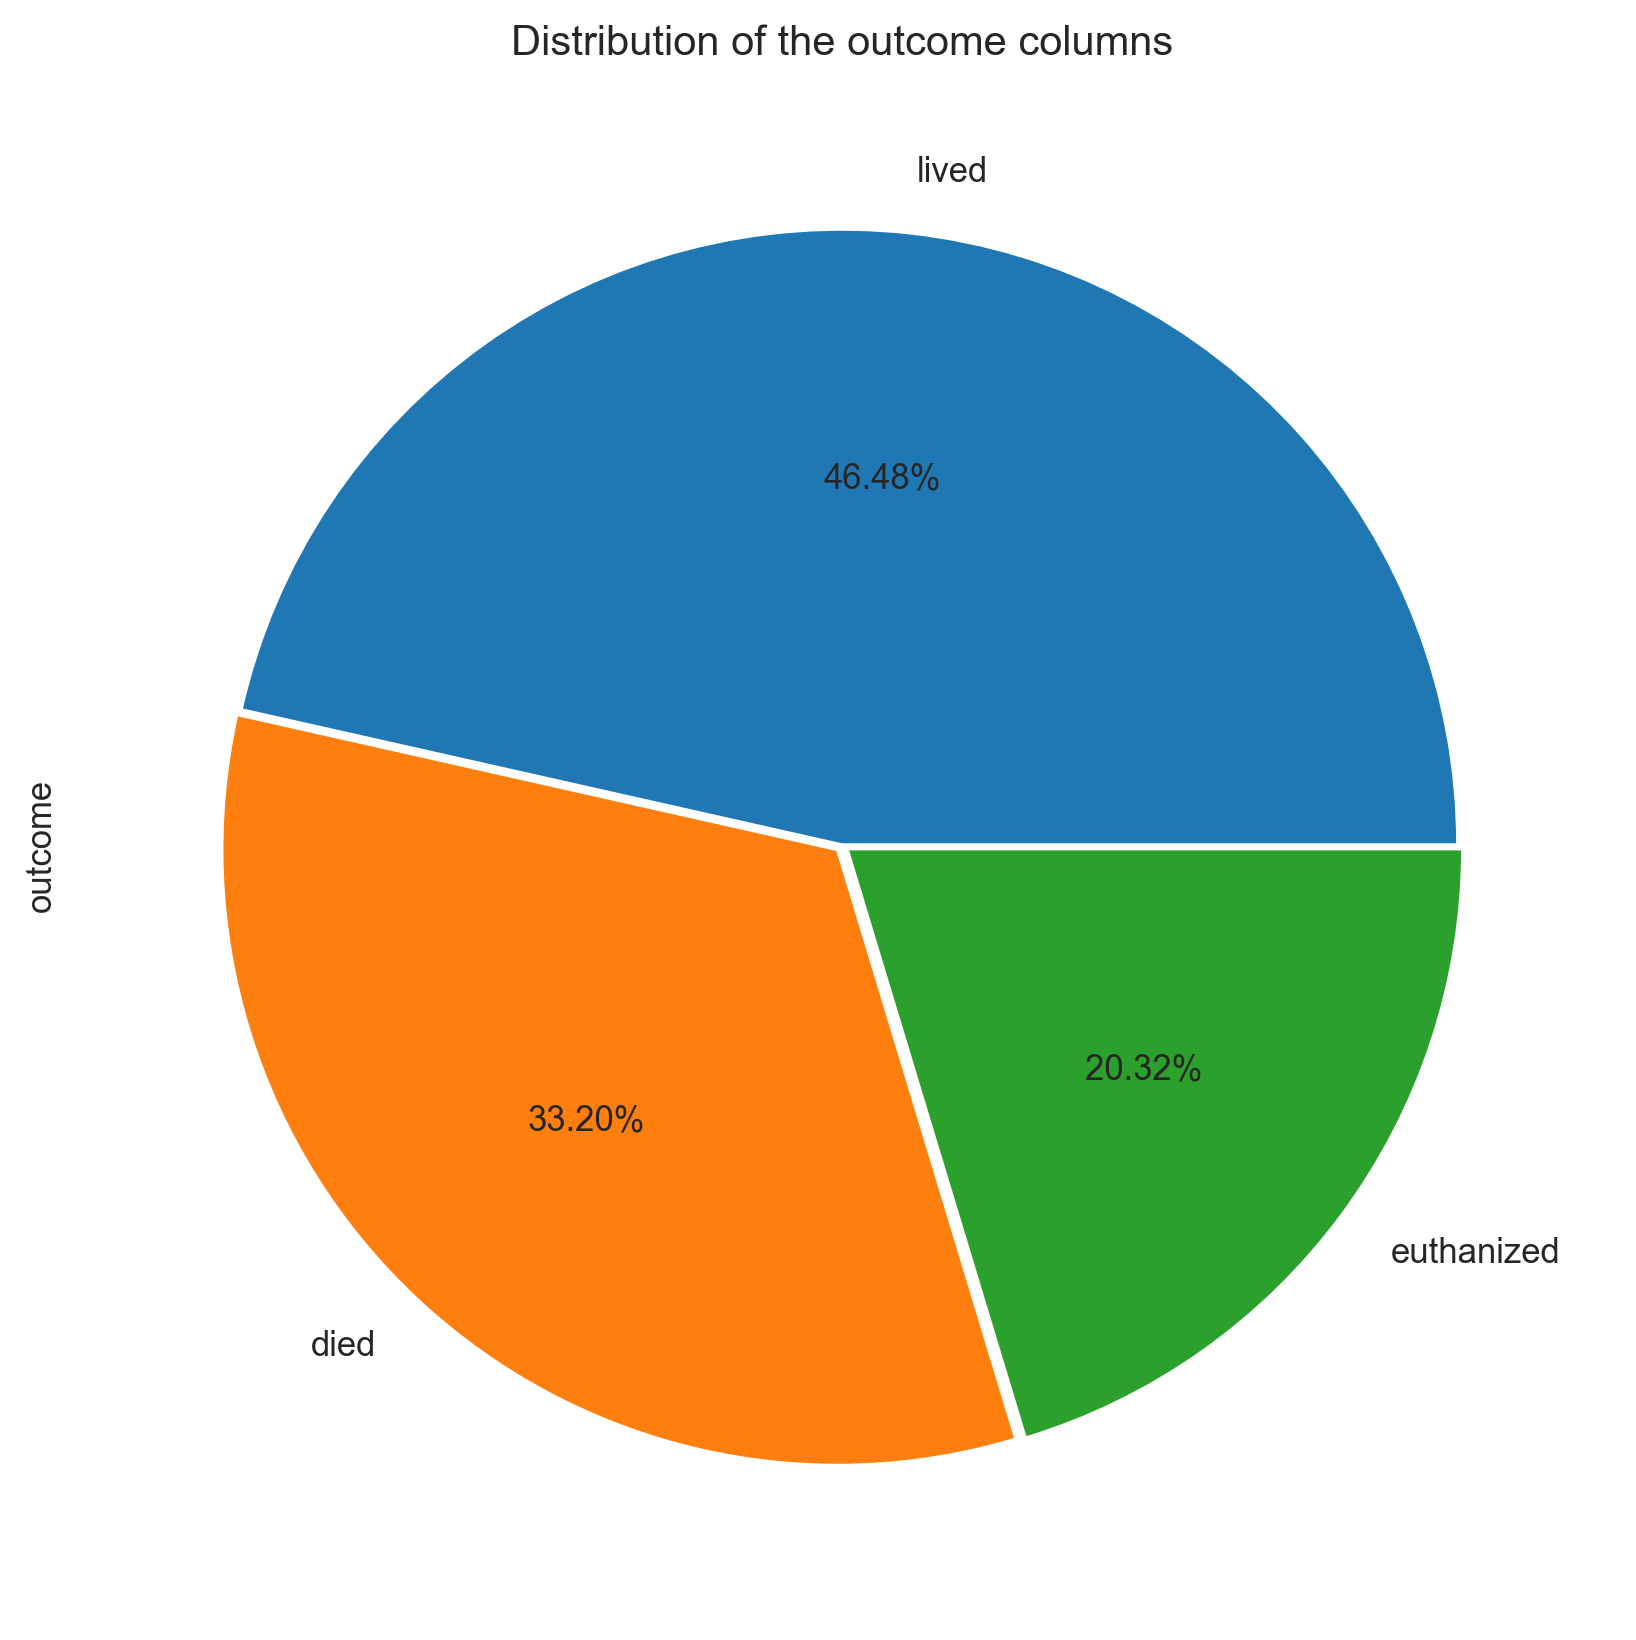

In [28]:
plt.title('Distribution of the outcome columns')
explode = (0, 0.01, 0.01)
train['outcome'].value_counts().plot(kind='pie', autopct = '%.2f%%',
            explode = explode)

#, colors=['#3ec300', '#ff1d15']

#### PLoting State And Area.Code

In [39]:
train['surgery'].value_counts().values

array([887, 348], dtype=int64)

<Axes: >

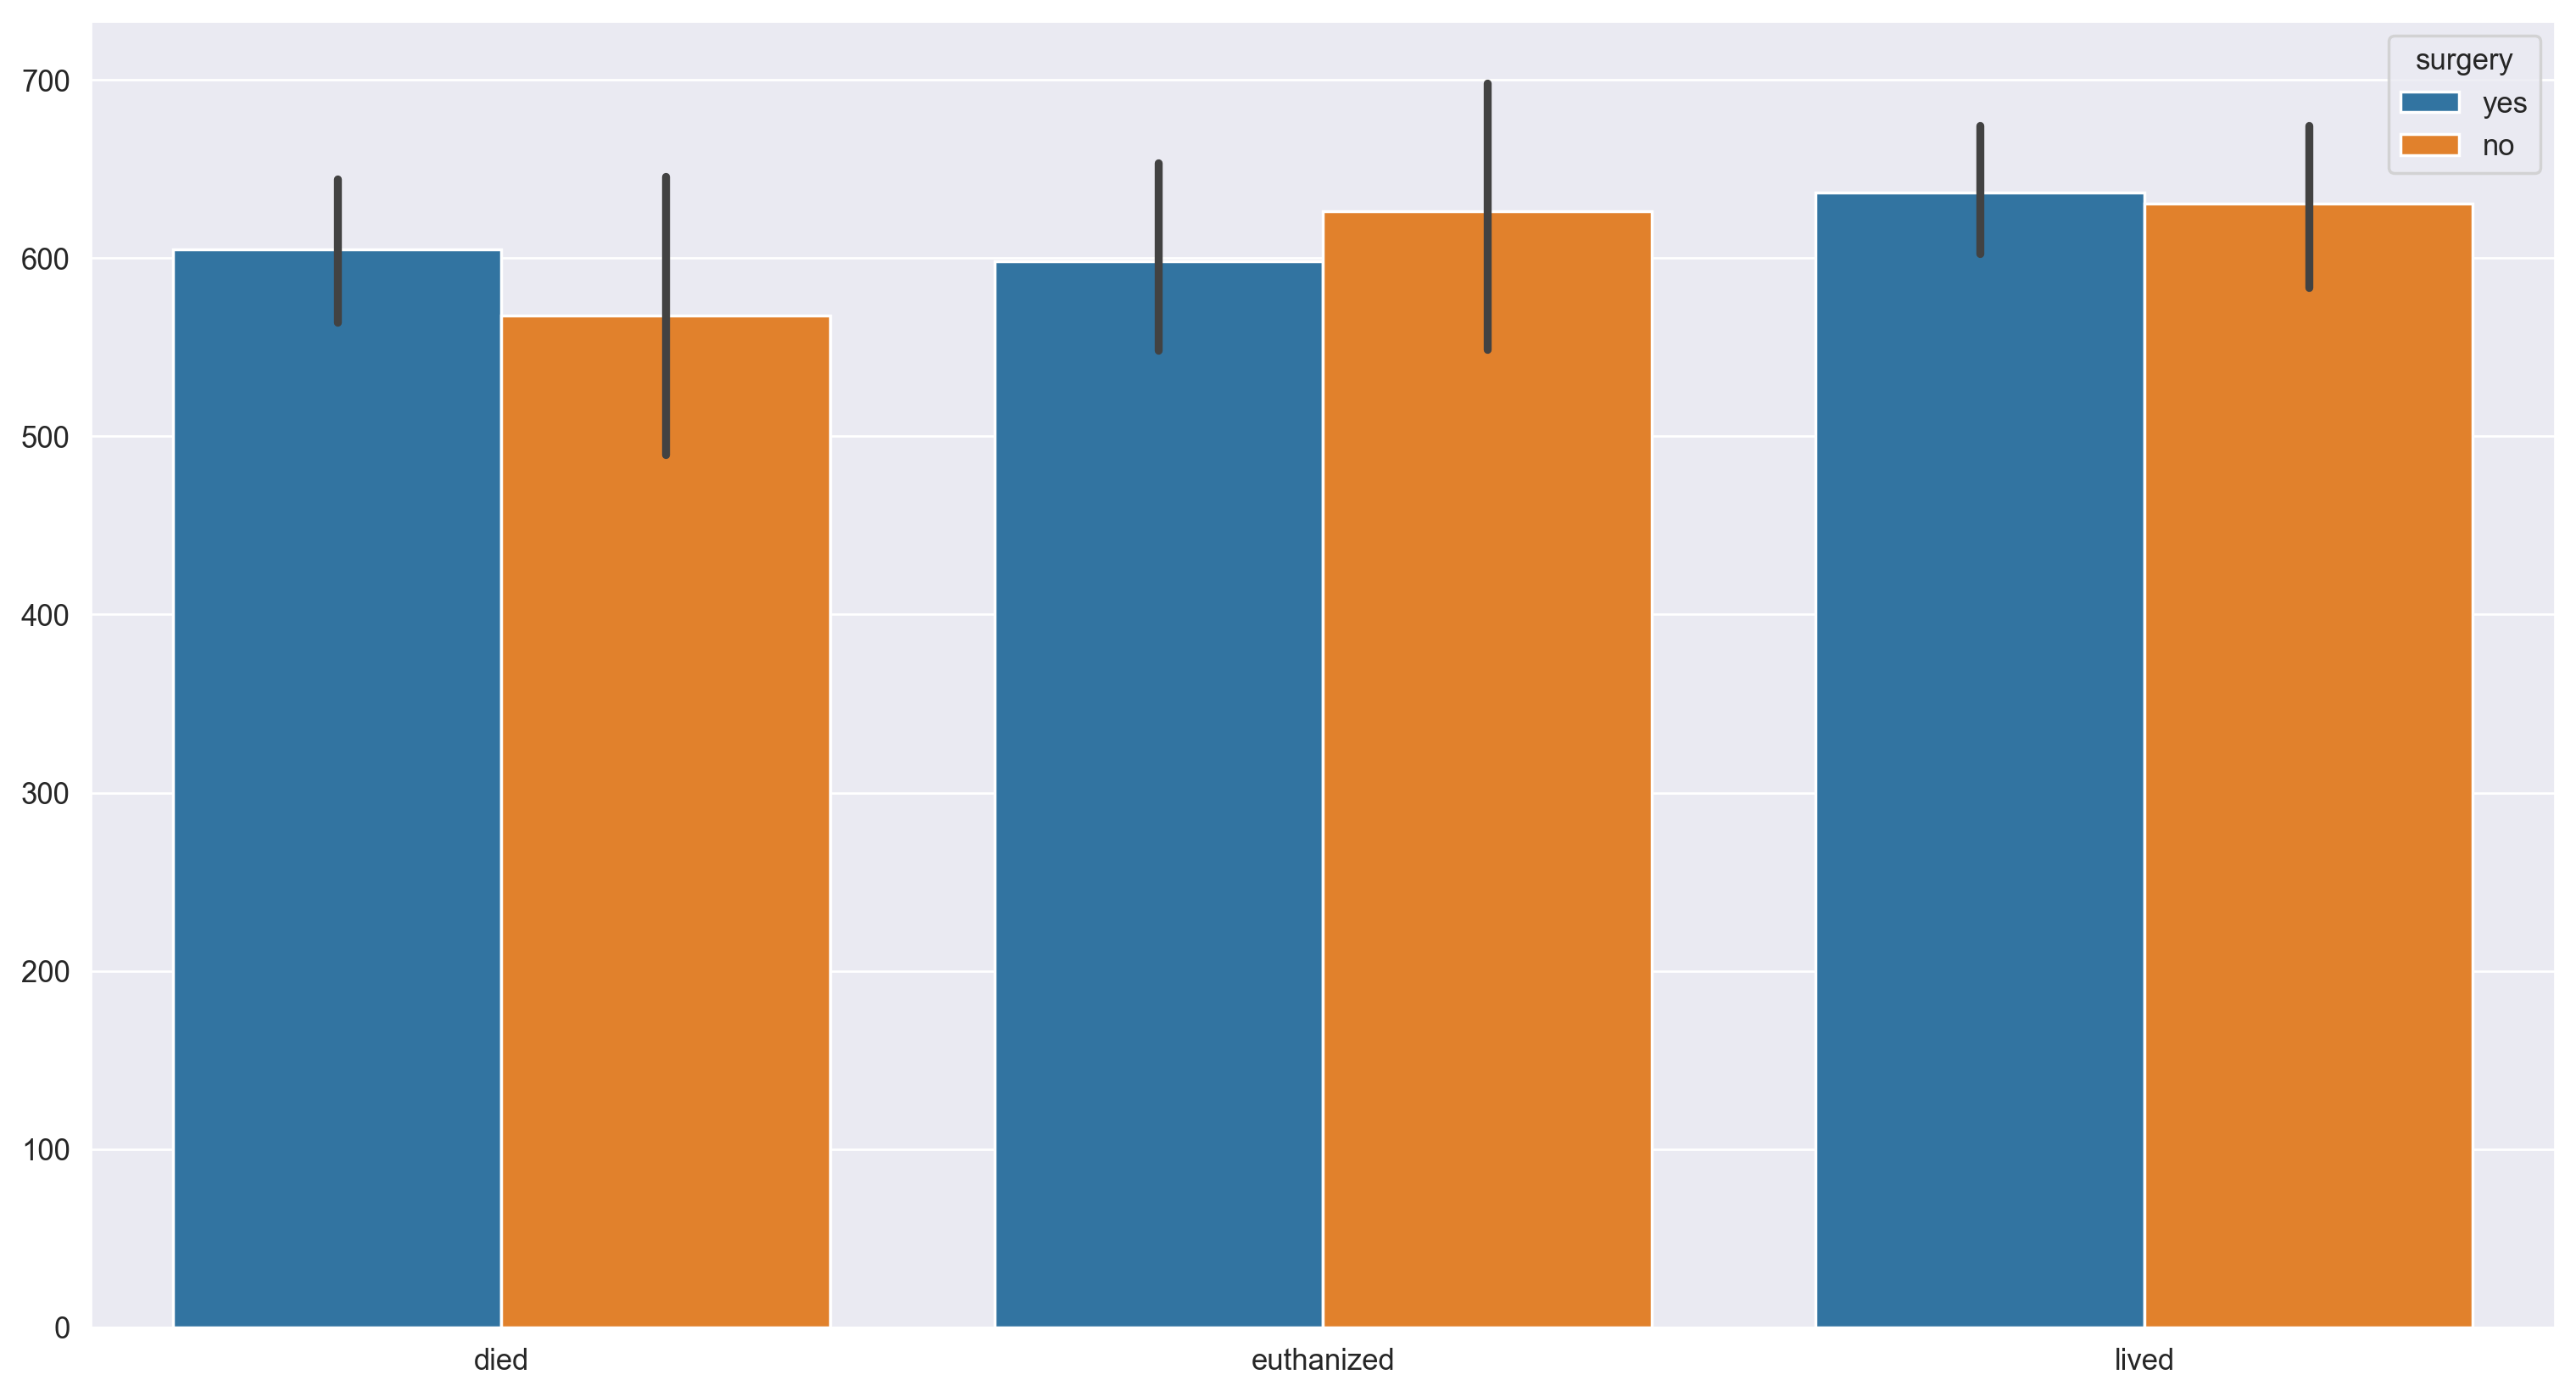

In [43]:

sns.barplot(y = train['outcome'].index,
            x = train['outcome'].values,
            hue = train['surgery'])

<AxesSubplot:title={'center':'Top 5 state'}, ylabel='area.code'>

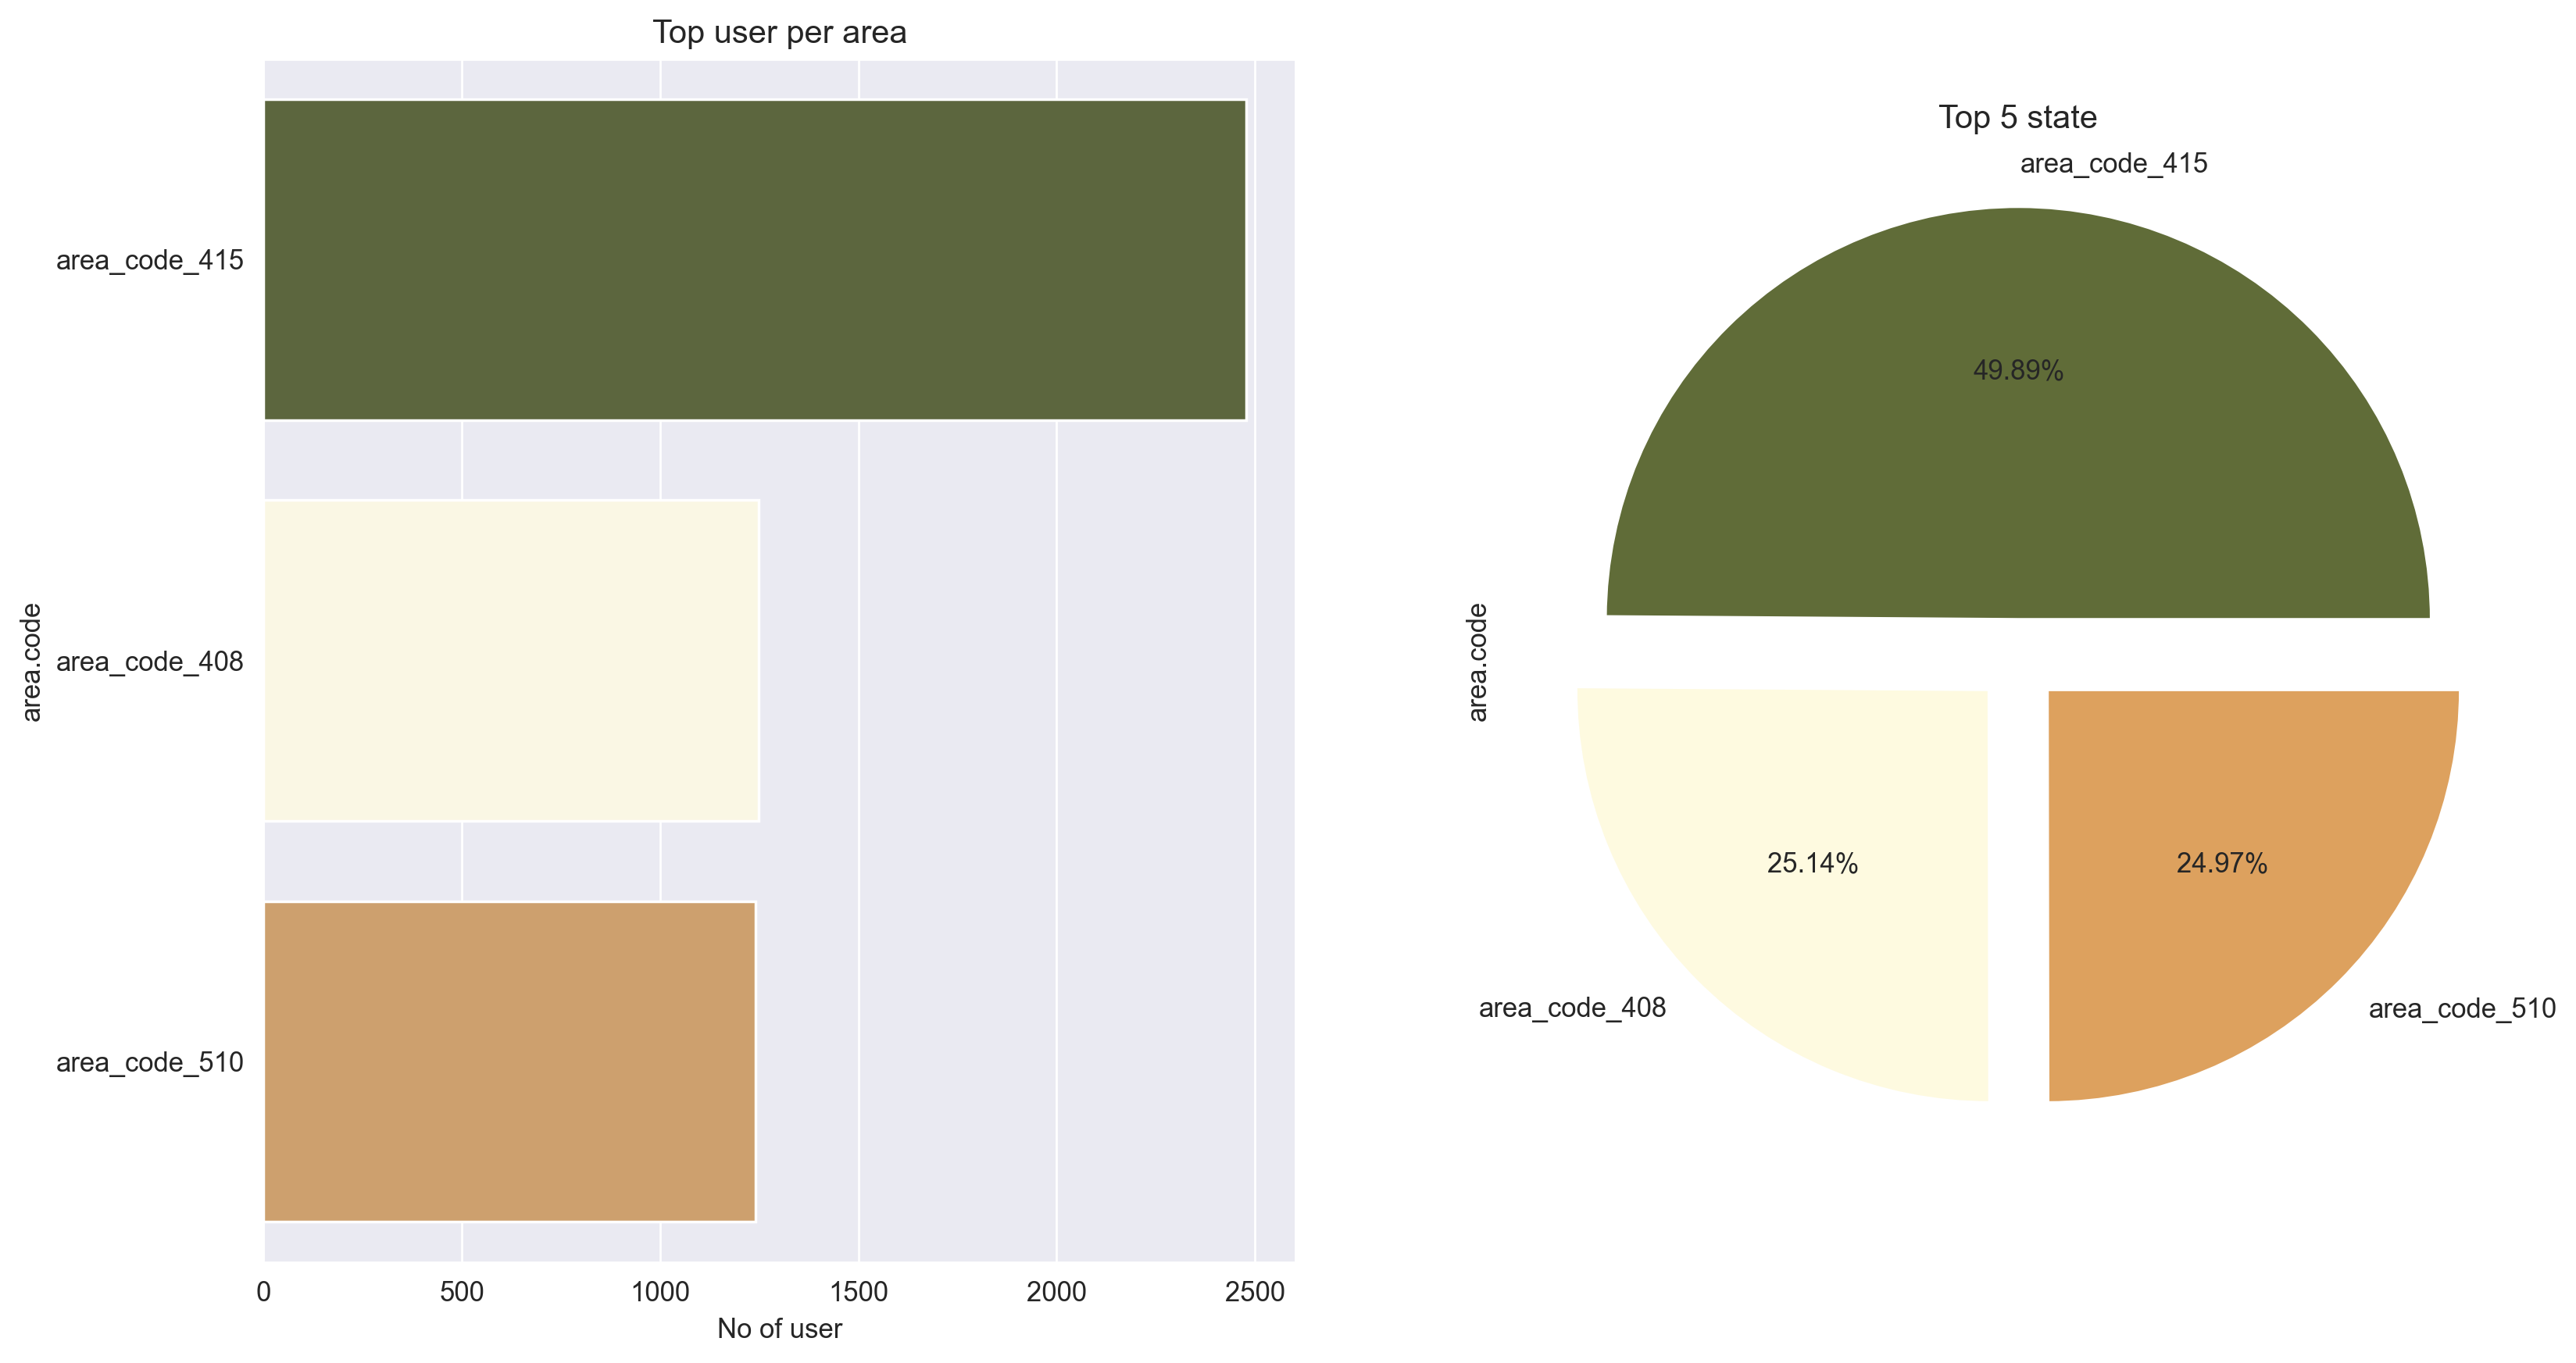

In [26]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], title = 'Top user per area')
plt.setp(ax[0], xlabel = 'No of user')
plt.setp(ax[0], ylabel = 'area.code')
sns.barplot(y = train['area.code'].value_counts().index, 
            x = train['area.code'].value_counts().values, 
            ax = ax[0],
            palette=['#606c38','#fefae0','#dda15e'])

explode = (0.1, 0.1, 0.1)

plt.setp(ax[1], title = "Top 5 state")
train['area.code'].value_counts().plot(kind='pie', autopct = '%.2f%%', ax = ax[1],
            explode = explode, colors=['#606c38','#fefae0','#dda15e'])

#### Ploting boxplot of 4 categories

<AxesSubplot:>

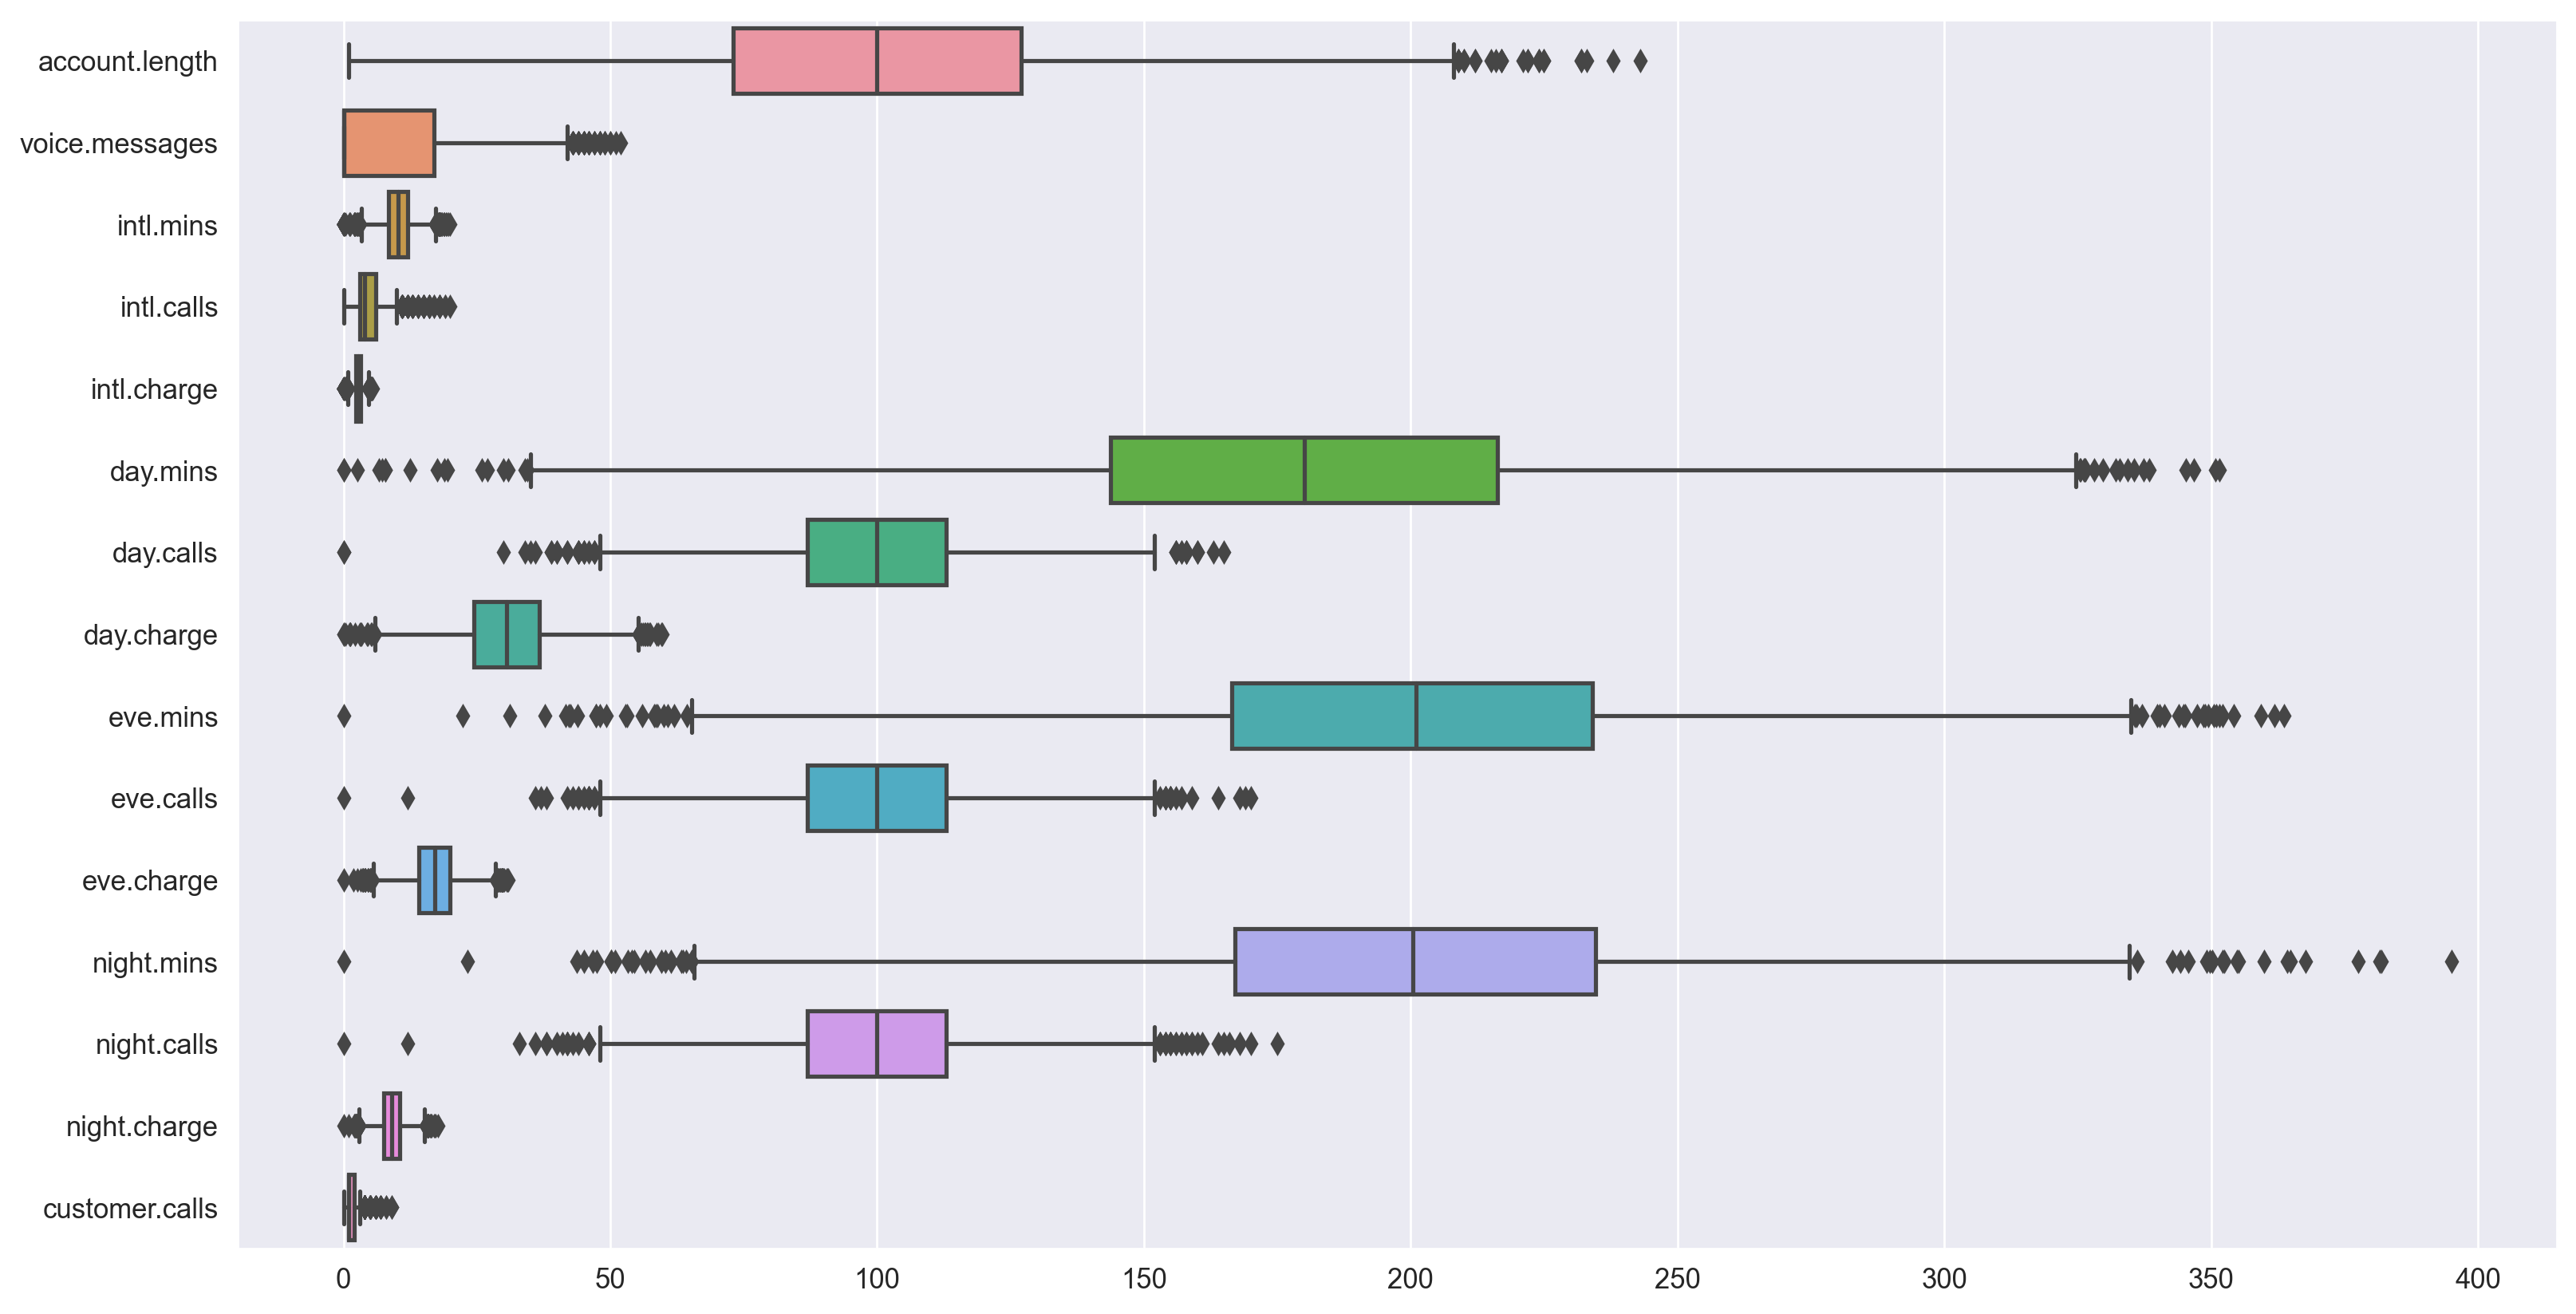

In [27]:
sns.boxplot(data=train, orient='h')

##### Ploting International Data

In [28]:
intl = train.iloc[:,5:9]
intl['trainurn'] = train['trainurn']

intl.head()

intl.plan  intl.mins  intl.calls  intl.charge churn
0        no       10.0           3         2.70    no
1        no       13.7           3         3.70    no
2        no       12.2           5         3.29    no
3       yes        6.6           7         1.78    no
4       yes       10.1           3         2.73    no

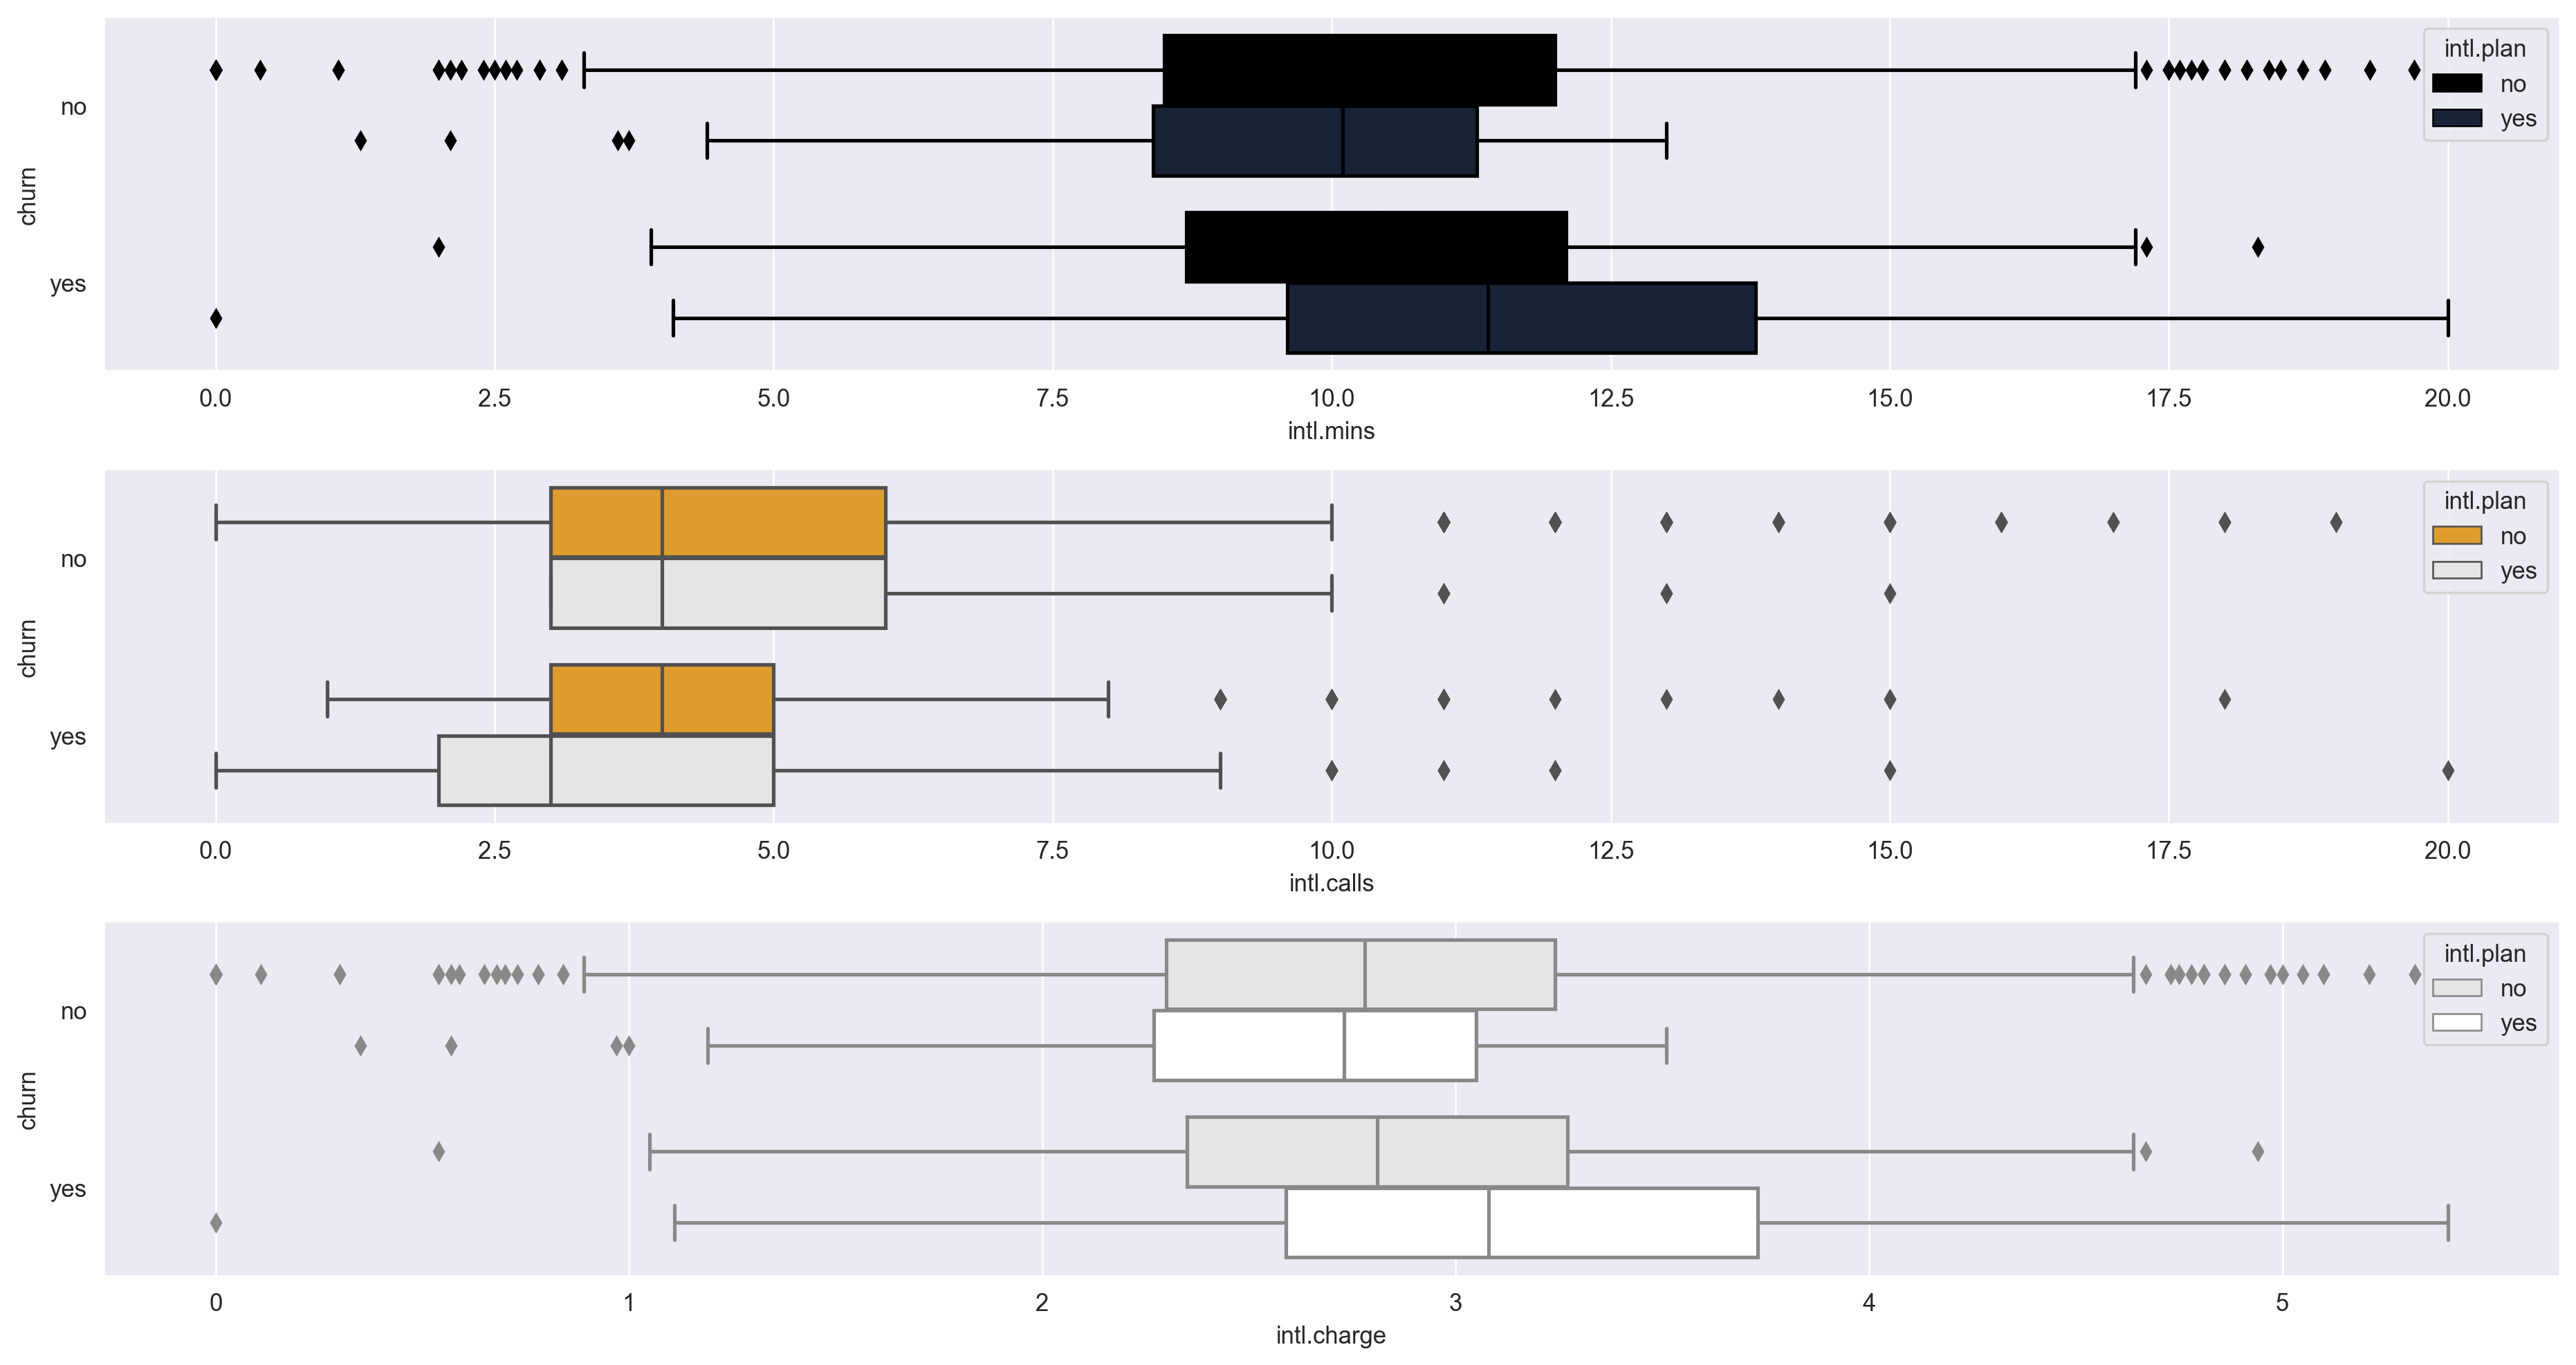

In [29]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'intl.mins', data = intl, 
            hue = 'intl.plan', ax=ax[0],
            palette=['#000000', '#14213d'])

sns.boxplot(y ='trainurn', x = 'intl.calls', data = intl, 
            hue = 'intl.plan', ax=ax[1],
            palette=['#fca311', '#e5e5e5'])

sns.boxplot(y ='trainurn', x = 'intl.trainarge', data = intl, 
            hue = 'intl.plan', ax=ax[2],
            palette=['#e5e5e5', '#ffffff'])

plt.tight_layout()

##### Ploting Day Data

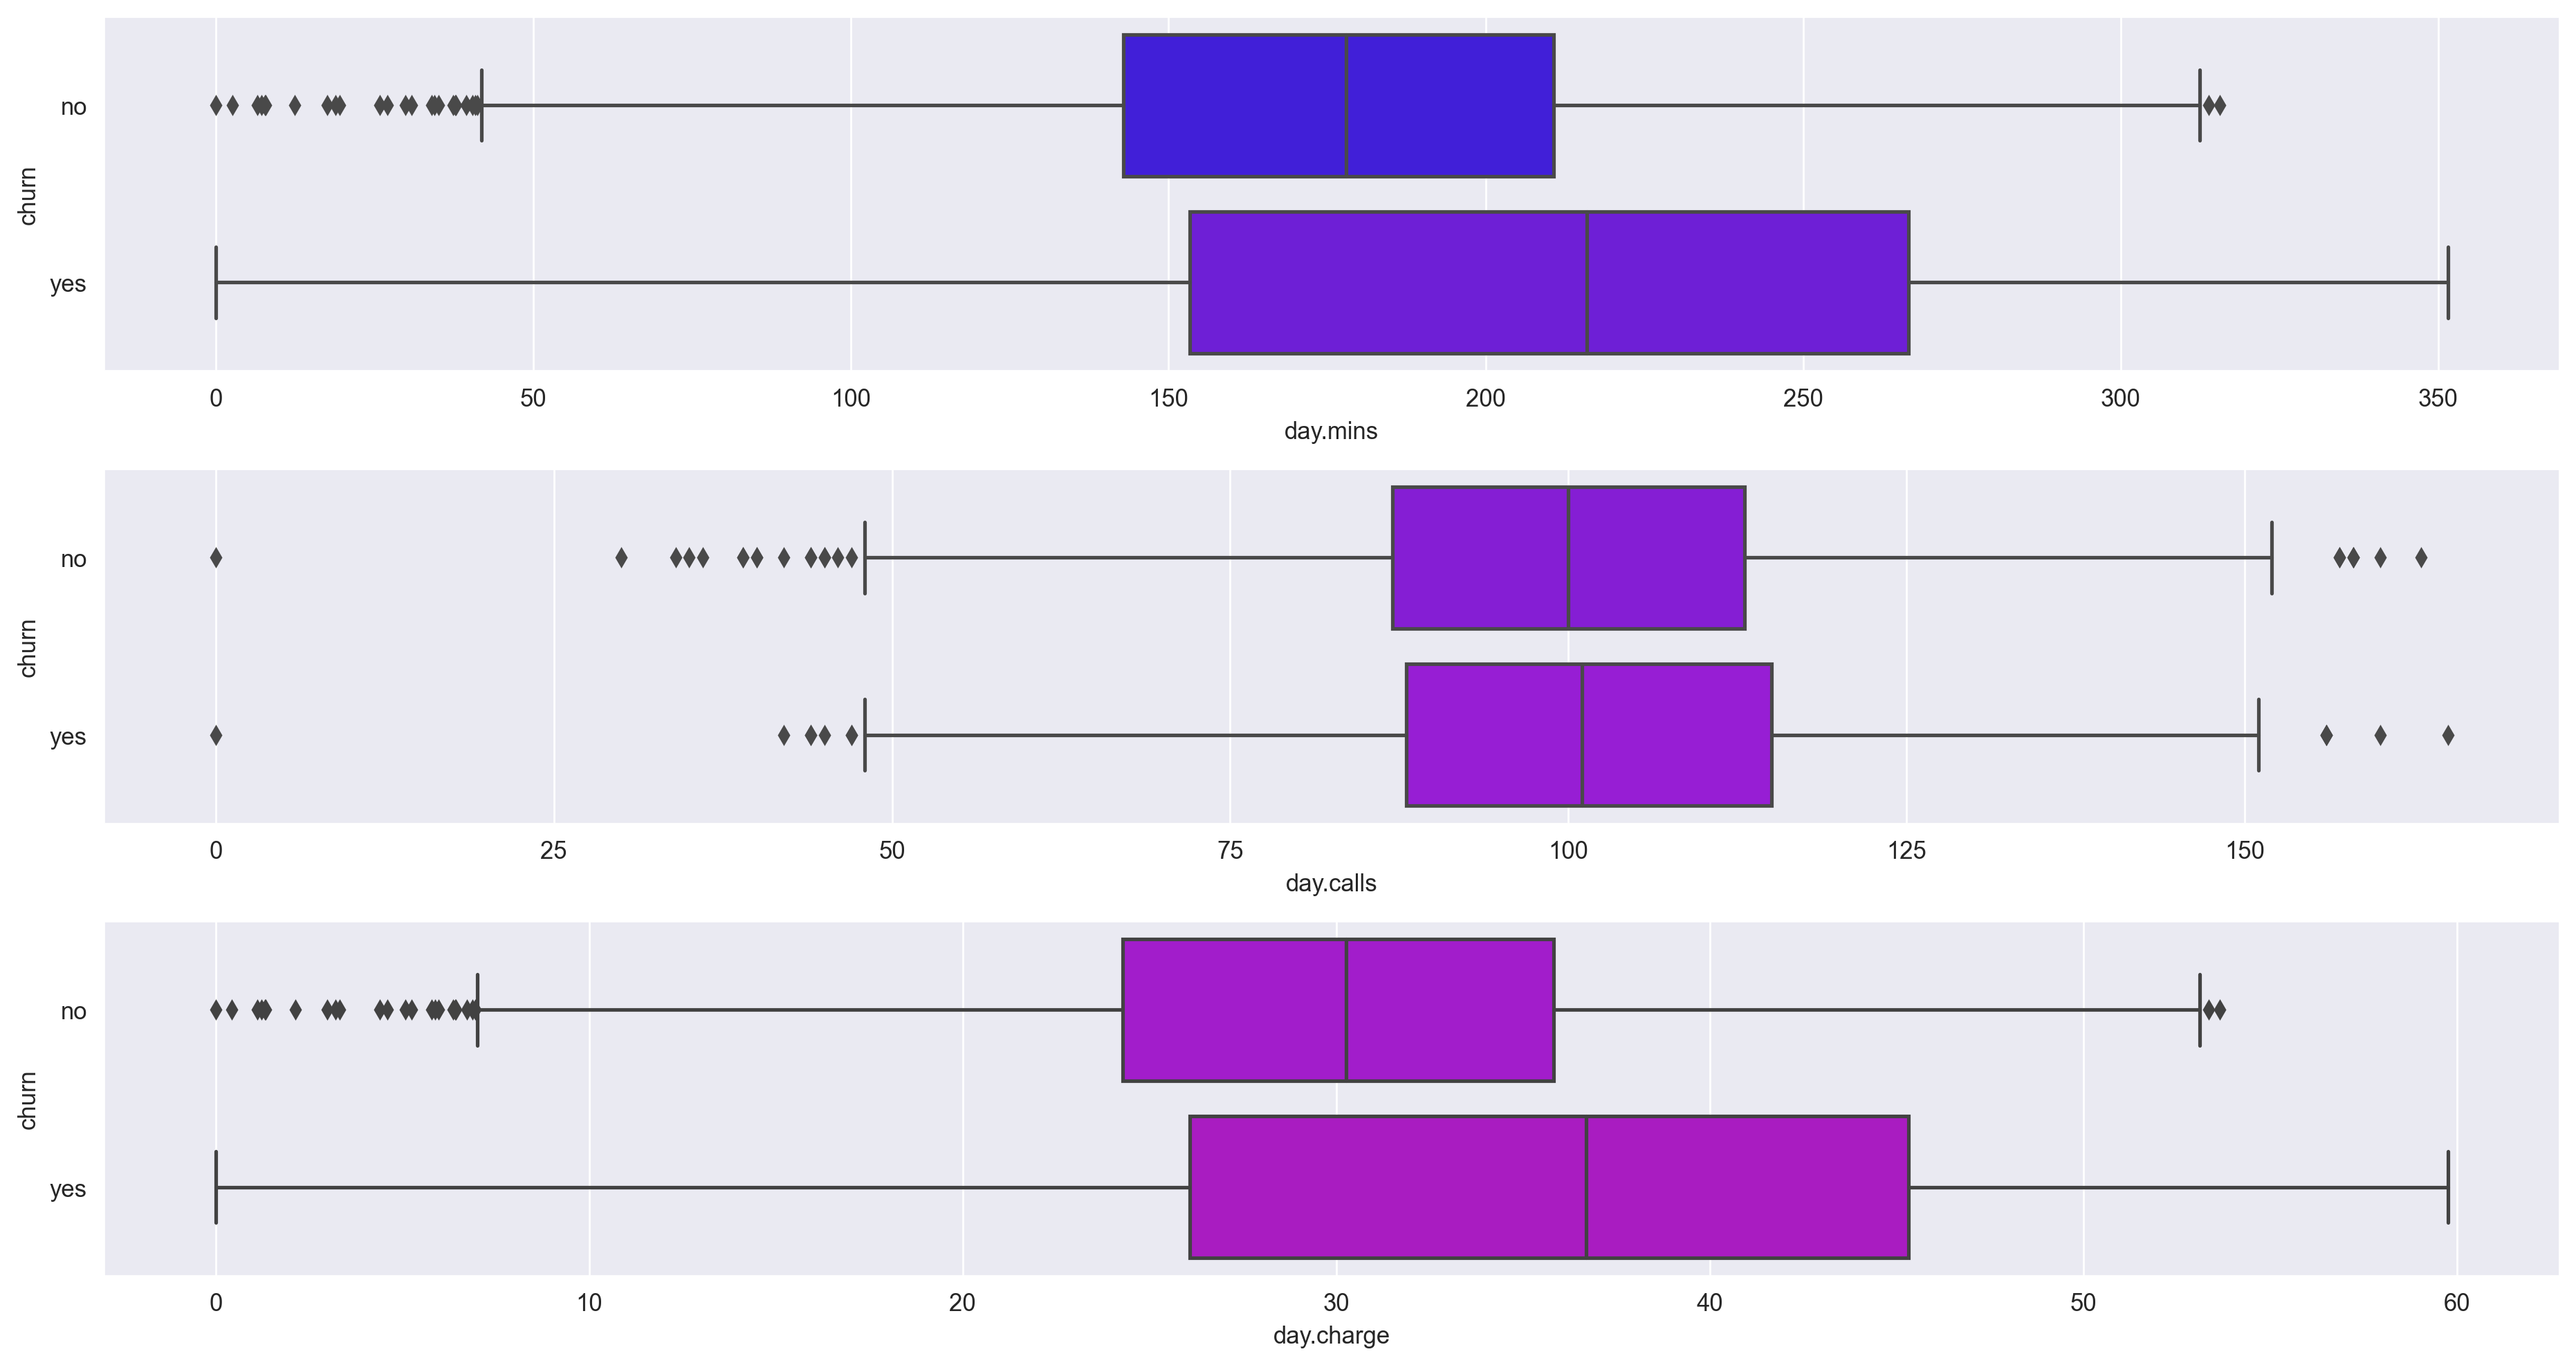

In [30]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'day.mins', data = train, 
            ax=ax[0], palette=['#2d00f7', '#6a00f4'])

sns.boxplot(y ='trainurn', x = 'day.calls', data = train, 
            ax=ax[1], palette=['#8900f2', '#a100f2'])

sns.boxplot(y ='trainurn', x = 'day.trainarge', data = train, 
            ax=ax[2], palette=['#b100e8', '#bc00dd'])

plt.tight_layout()

##### Ploting Evening Data

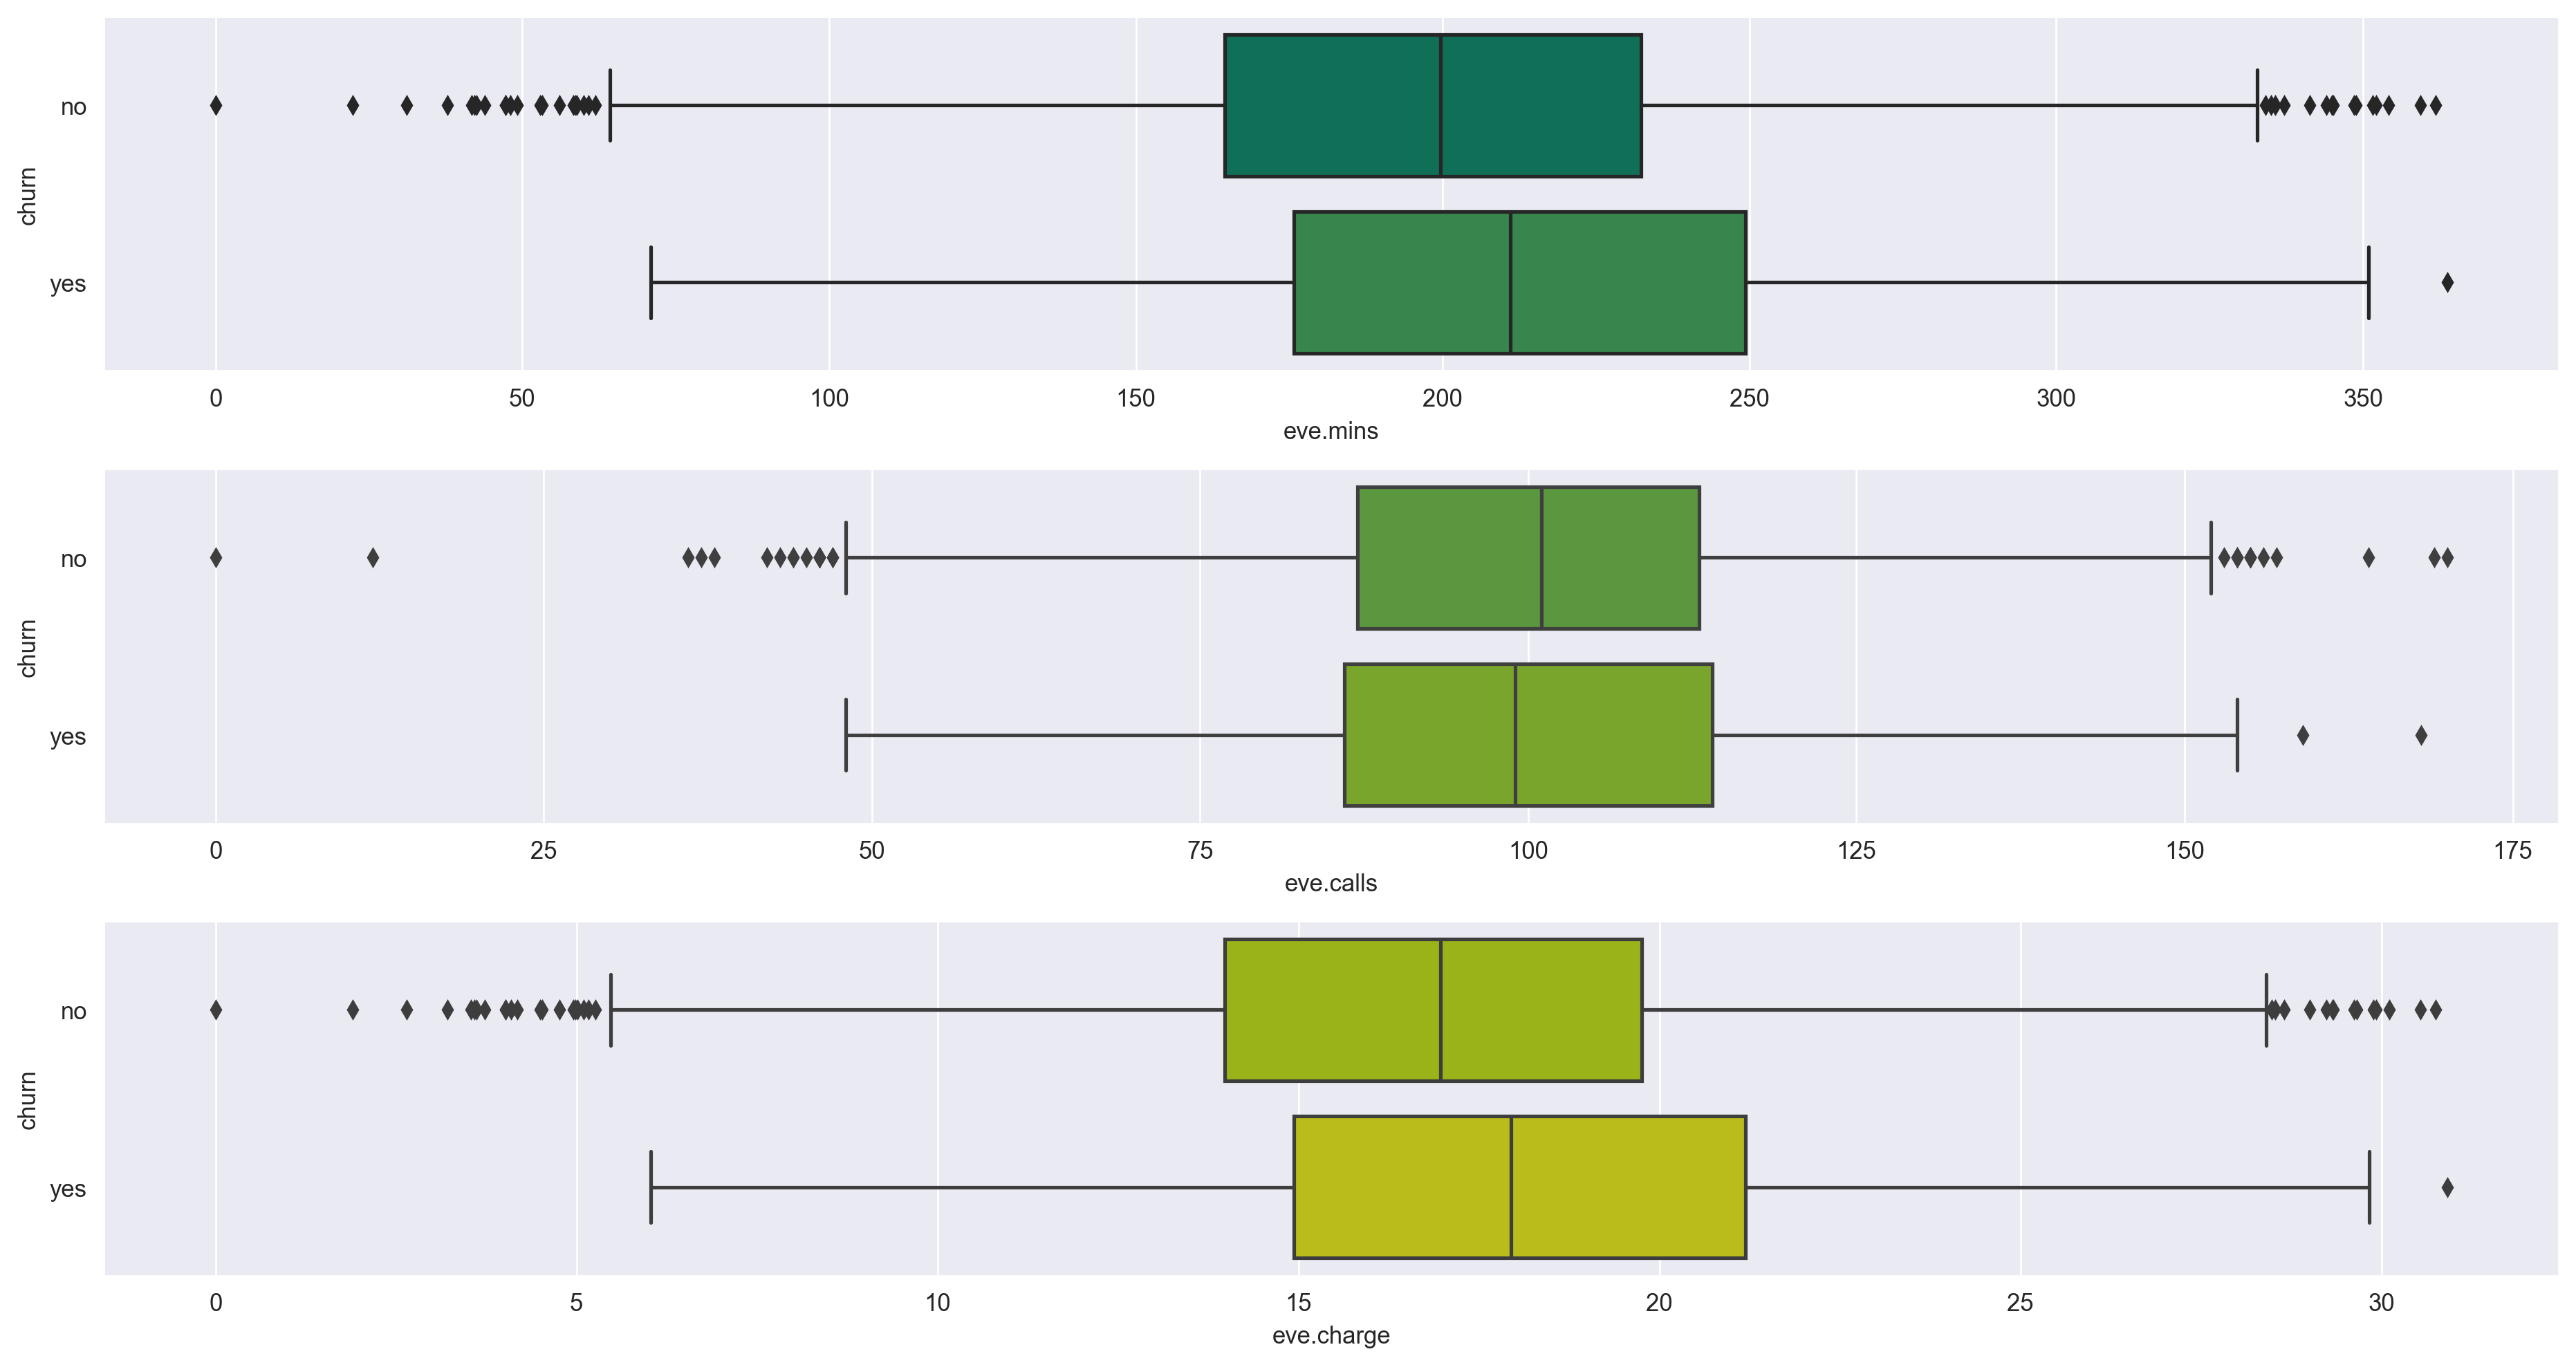

In [31]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'eve.mins', data = train, 
            ax=ax[0], palette=['#007f5f', '#2b9348'])

sns.boxplot(y ='trainurn', x = 'eve.calls', data = train, 
            ax=ax[1], palette=['#55a630', '#80b918'])

sns.boxplot(y ='trainurn', x = 'eve.trainarge', data = train, 
            ax=ax[2], palette=['#aacc00', '#d4d700'])

plt.tight_layout()

##### Ploting Night Data

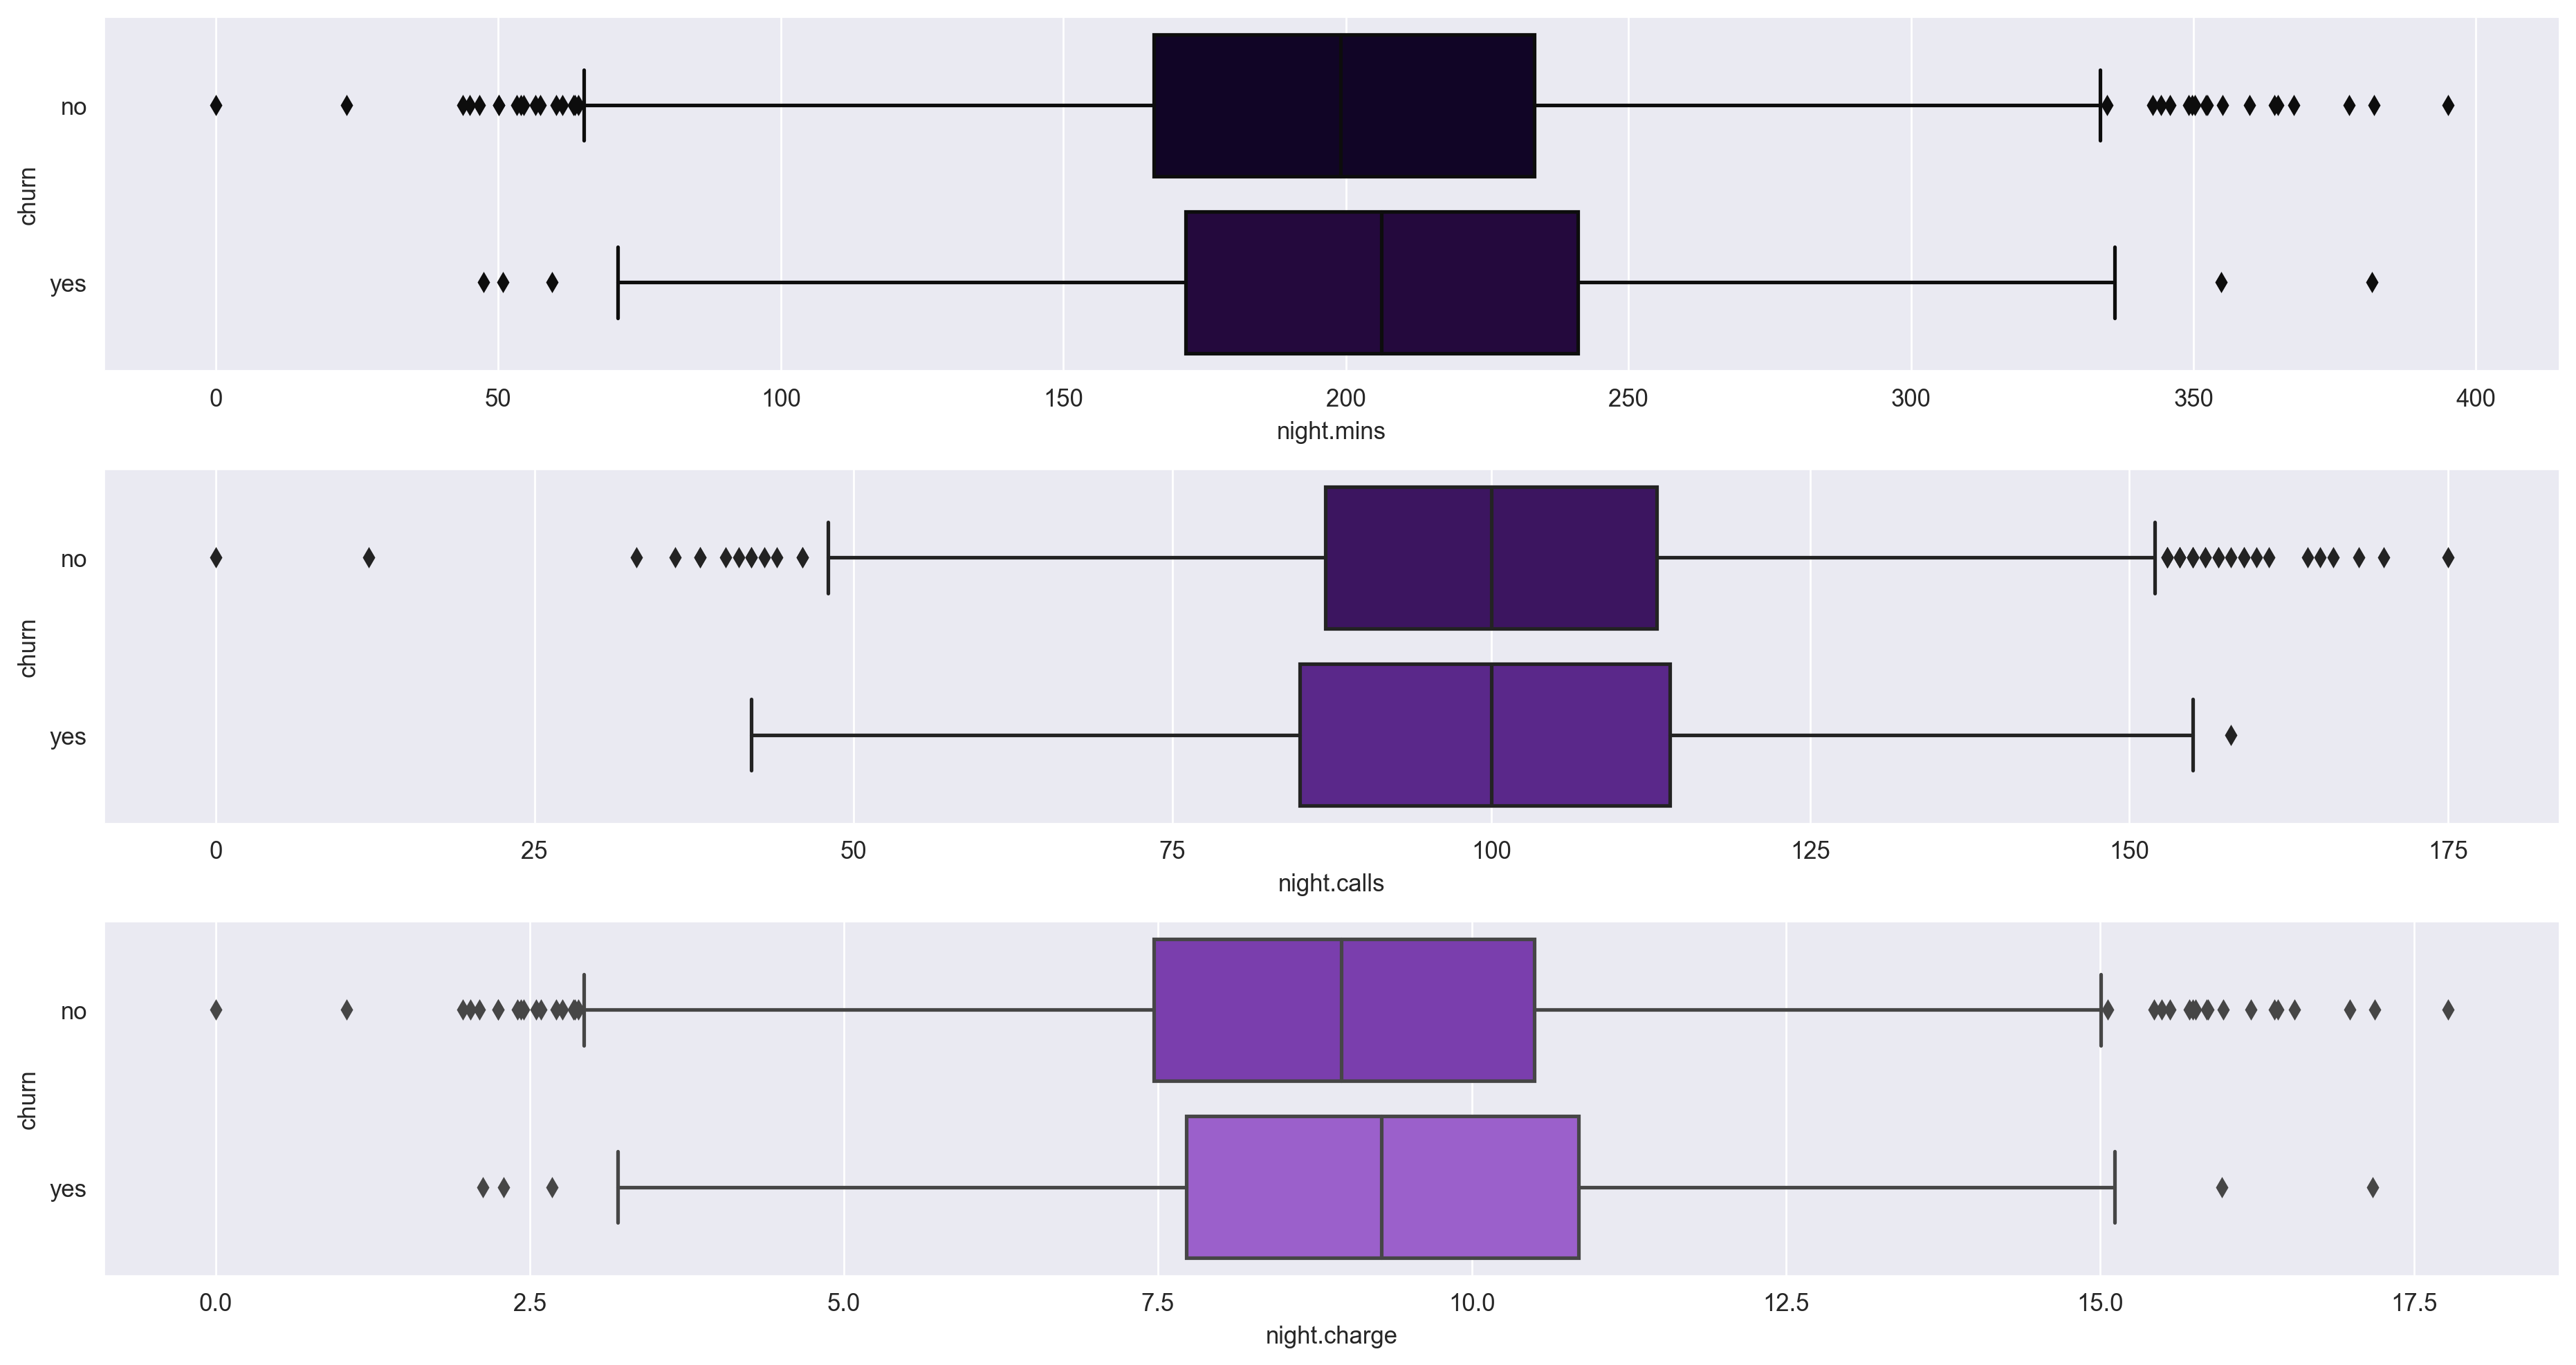

In [32]:
fig, ax = plt.subplots(nrows=3, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'night.mins', data = train, 
            ax=ax[0], palette=['#10002b', '#240046'])

sns.boxplot(y ='trainurn', x = 'night.calls', data = train, 
            ax=ax[1], palette=['#3c096c', '#5a189a'])

sns.boxplot(y ='trainurn', x = 'night.trainarge', data = train, 
            ax=ax[2], palette=['#7b2cbf', '#9d4edd'])

plt.tight_layout()

##### Ploting Voice And Customer Calls Data

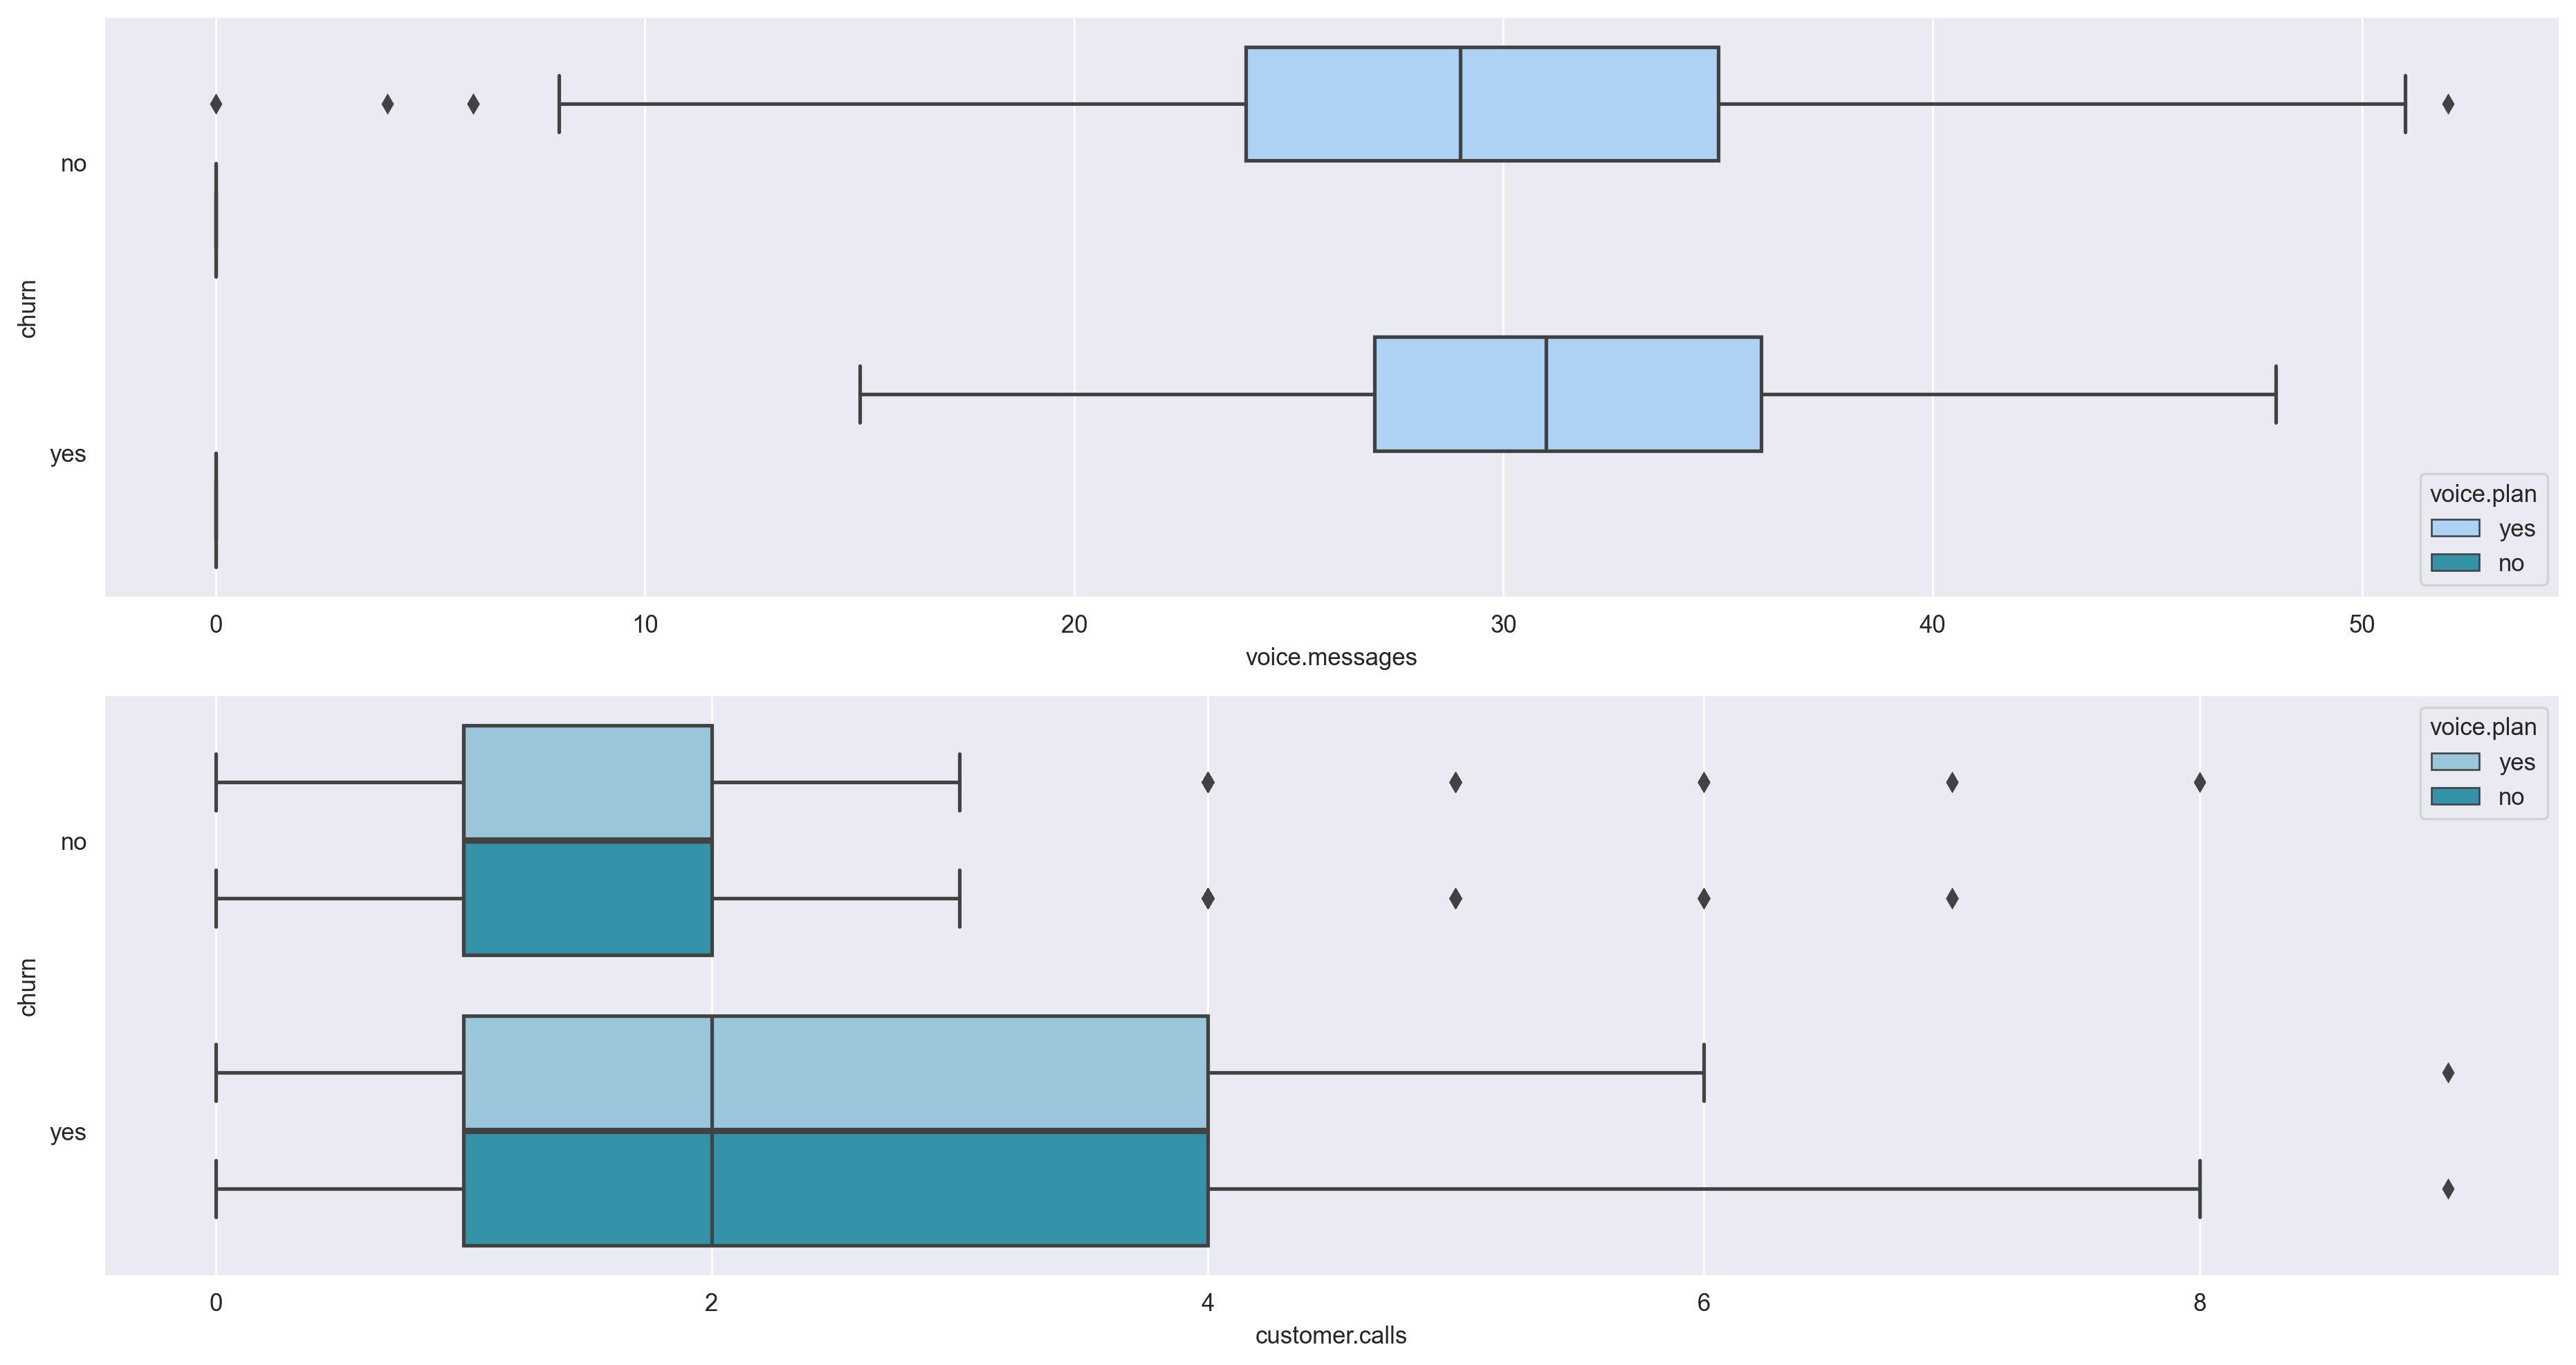

In [33]:
fig, ax = plt.subplots(nrows=2, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'voice.messages', data = train, 
            ax=ax[0], hue = 'voice.plan',
            palette=['#a2d2ff', '#219ebc'])

sns.boxplot(y ='trainurn', x = 'customer.calls', data = train, 
            ax=ax[1], hue = 'voice.plan',
            palette=['#8ecae6', '#219ebc'])
plt.tight_layout()

#### Ploting 3D Scatter of Dataset

##### Ploting 3D Scatter of International

In [34]:
pe.scatter_3d(x = 'intl.mins', y = 'intl.calls', z = 'intl.trainarge', data_frame = train, color = 'trainurn')

##### Ploting 3D Scatter of Day

In [35]:
pe.scatter_3d(x = 'day.mins', y = 'day.calls', z = 'day.trainarge', data_frame = train, color = 'trainurn')

##### Ploting 3D Scatter of Evening

In [36]:
pe.scatter_3d(x = 'eve.mins', y = 'eve.calls', z = 'eve.trainarge', data_frame = train, color = 'trainurn')

##### Ploting 3D Scatter of Night

In [37]:
pe.scatter_3d(x = 'night.mins', y = 'night.calls', z = 'night.trainarge', data_frame = train, color = 'trainurn')

#### Ploting Distplot of Dataset

##### Ploting Distplot of Mins

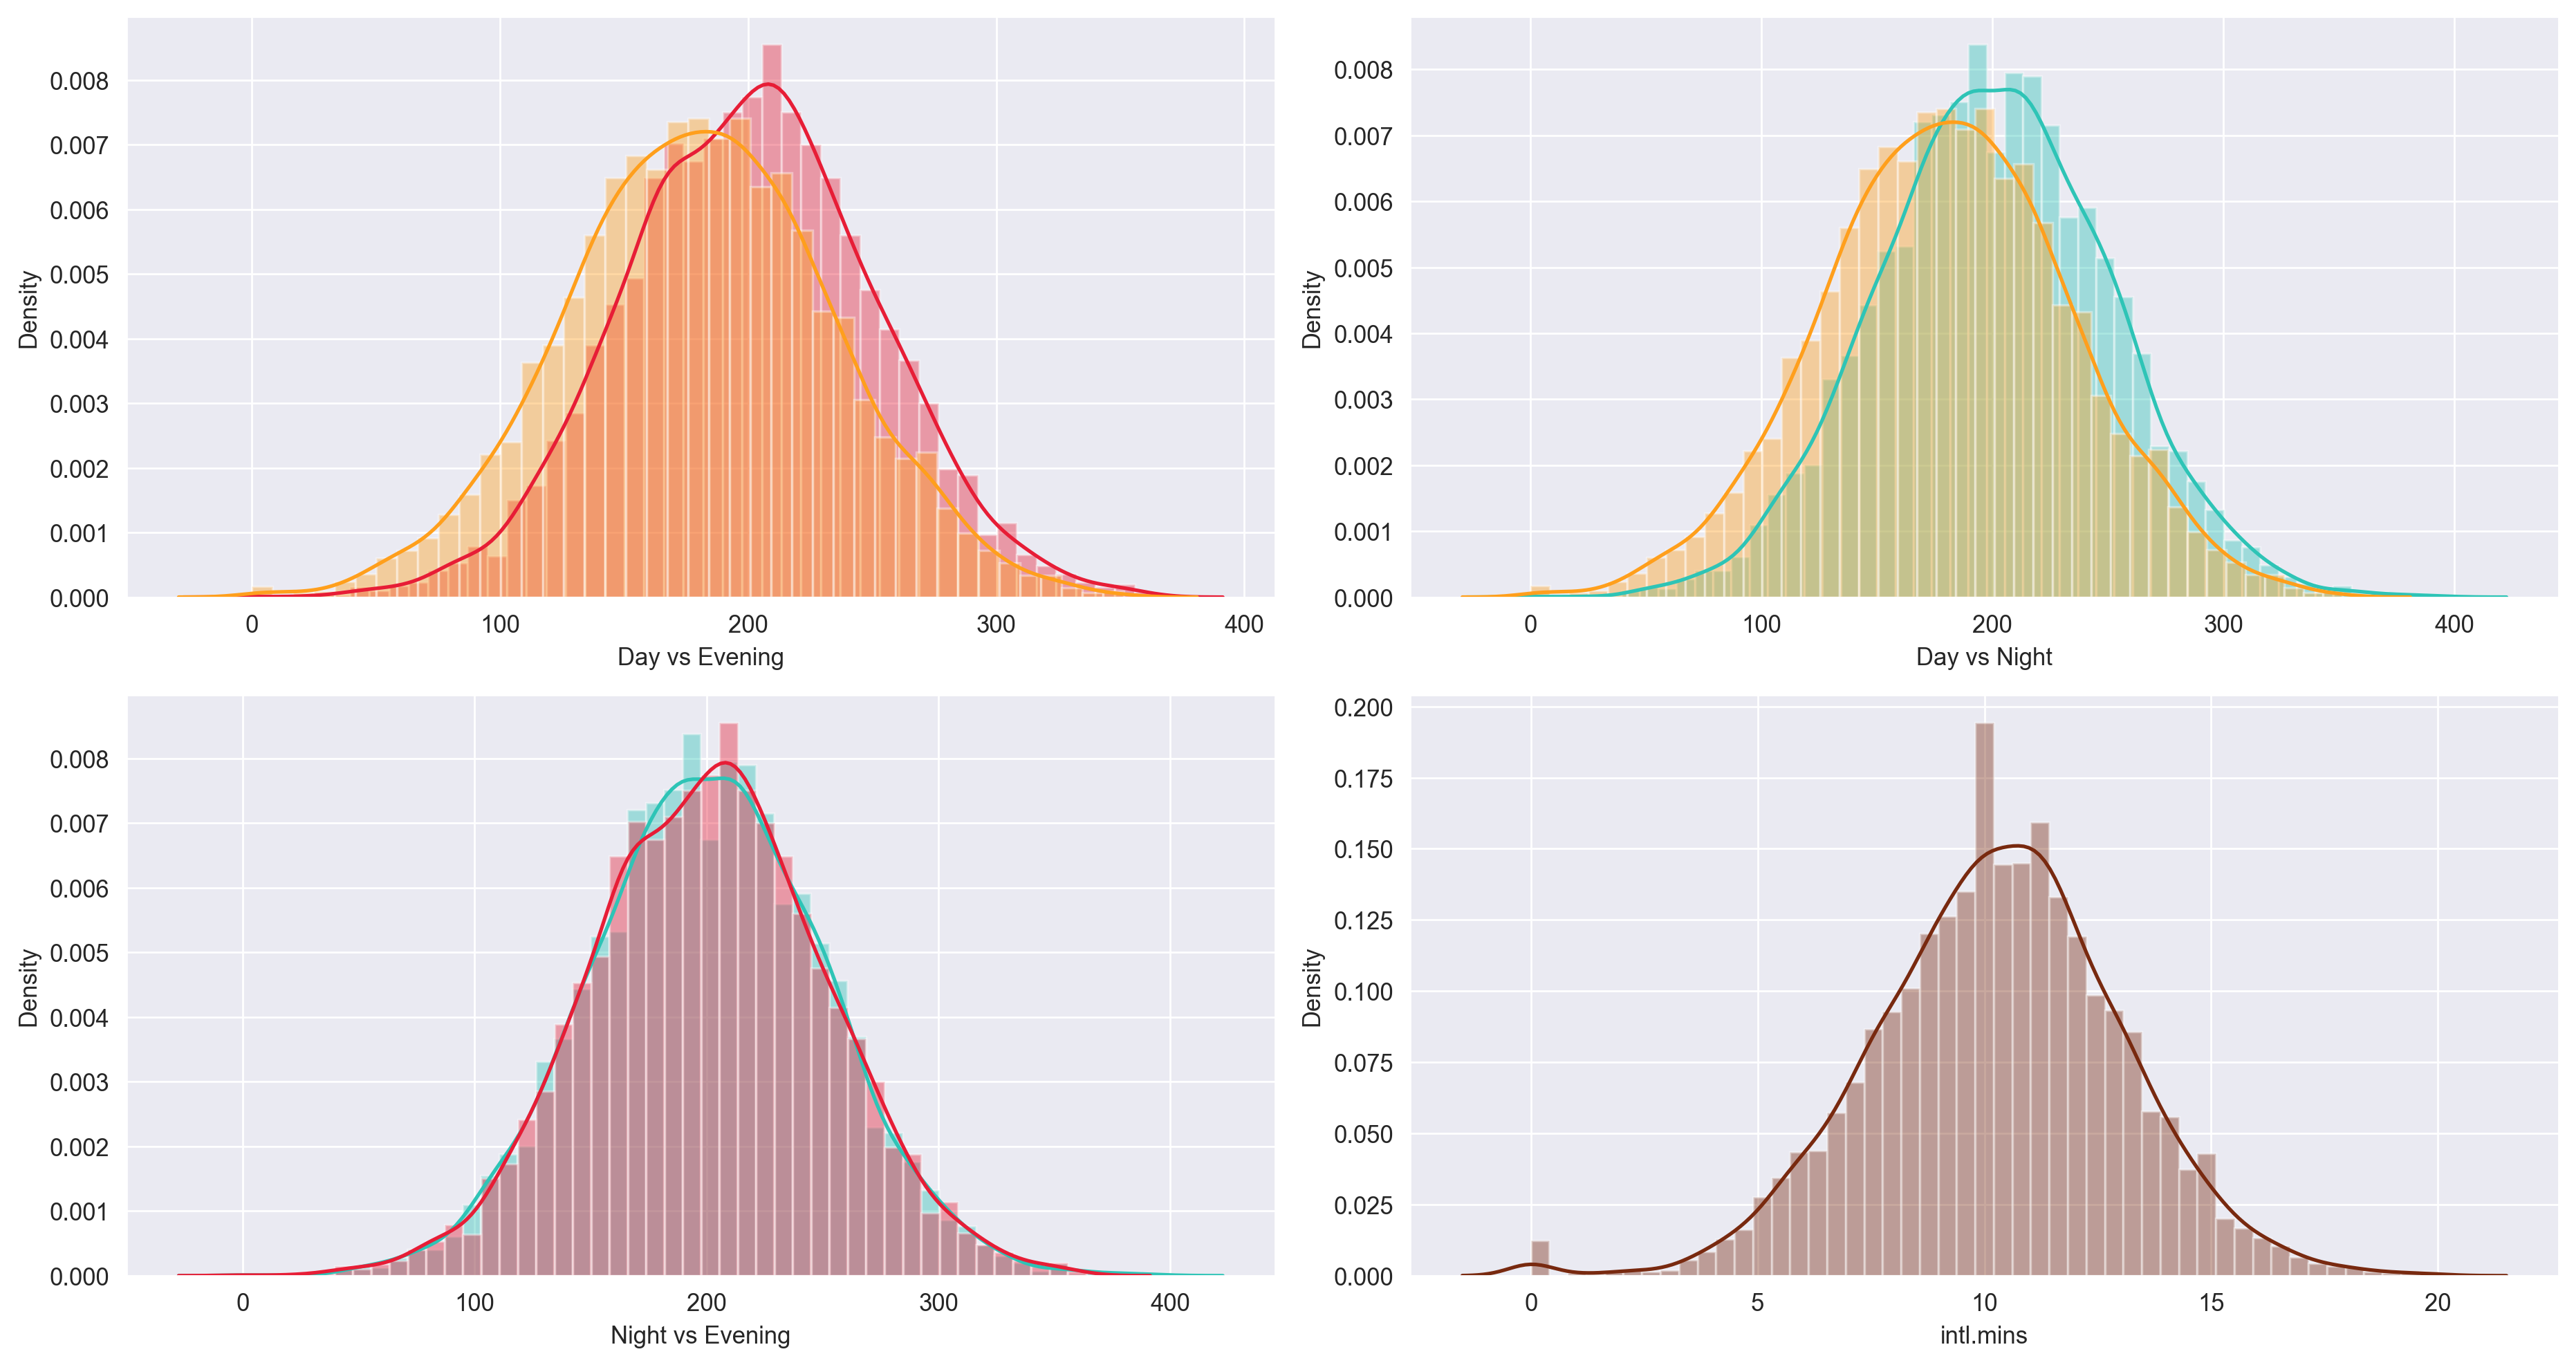

In [38]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0],xlabel = 'Day vs Evening')
sns.distplot(x = train['eve.mins'], ax=ax[0,0], color = '#e71d36')
sns.distplot(x = train['day.mins'], ax=ax[0,0], color = '#ff9f1c')

plt.setp(ax[0,1],xlabel = 'Day vs Night')
sns.distplot(x = train['night.mins'], ax=ax[0,1], color = '#2ec4b6')
sns.distplot(x = train['day.mins'], ax=ax[0,1], color = '#ff9f1c')

plt.setp(ax[1,0],xlabel = 'Night vs Evening')
sns.distplot(x = train['night.mins'], ax=ax[1,0], color = '#2ec4b6')
sns.distplot(x = train['eve.mins'], ax=ax[1,0], color = '#e71d36')

sns.distplot(train['intl.mins'], ax=ax[1,1], color = '#78290f')

plt.tight_layout()

##### Ploting Distplot of Calls

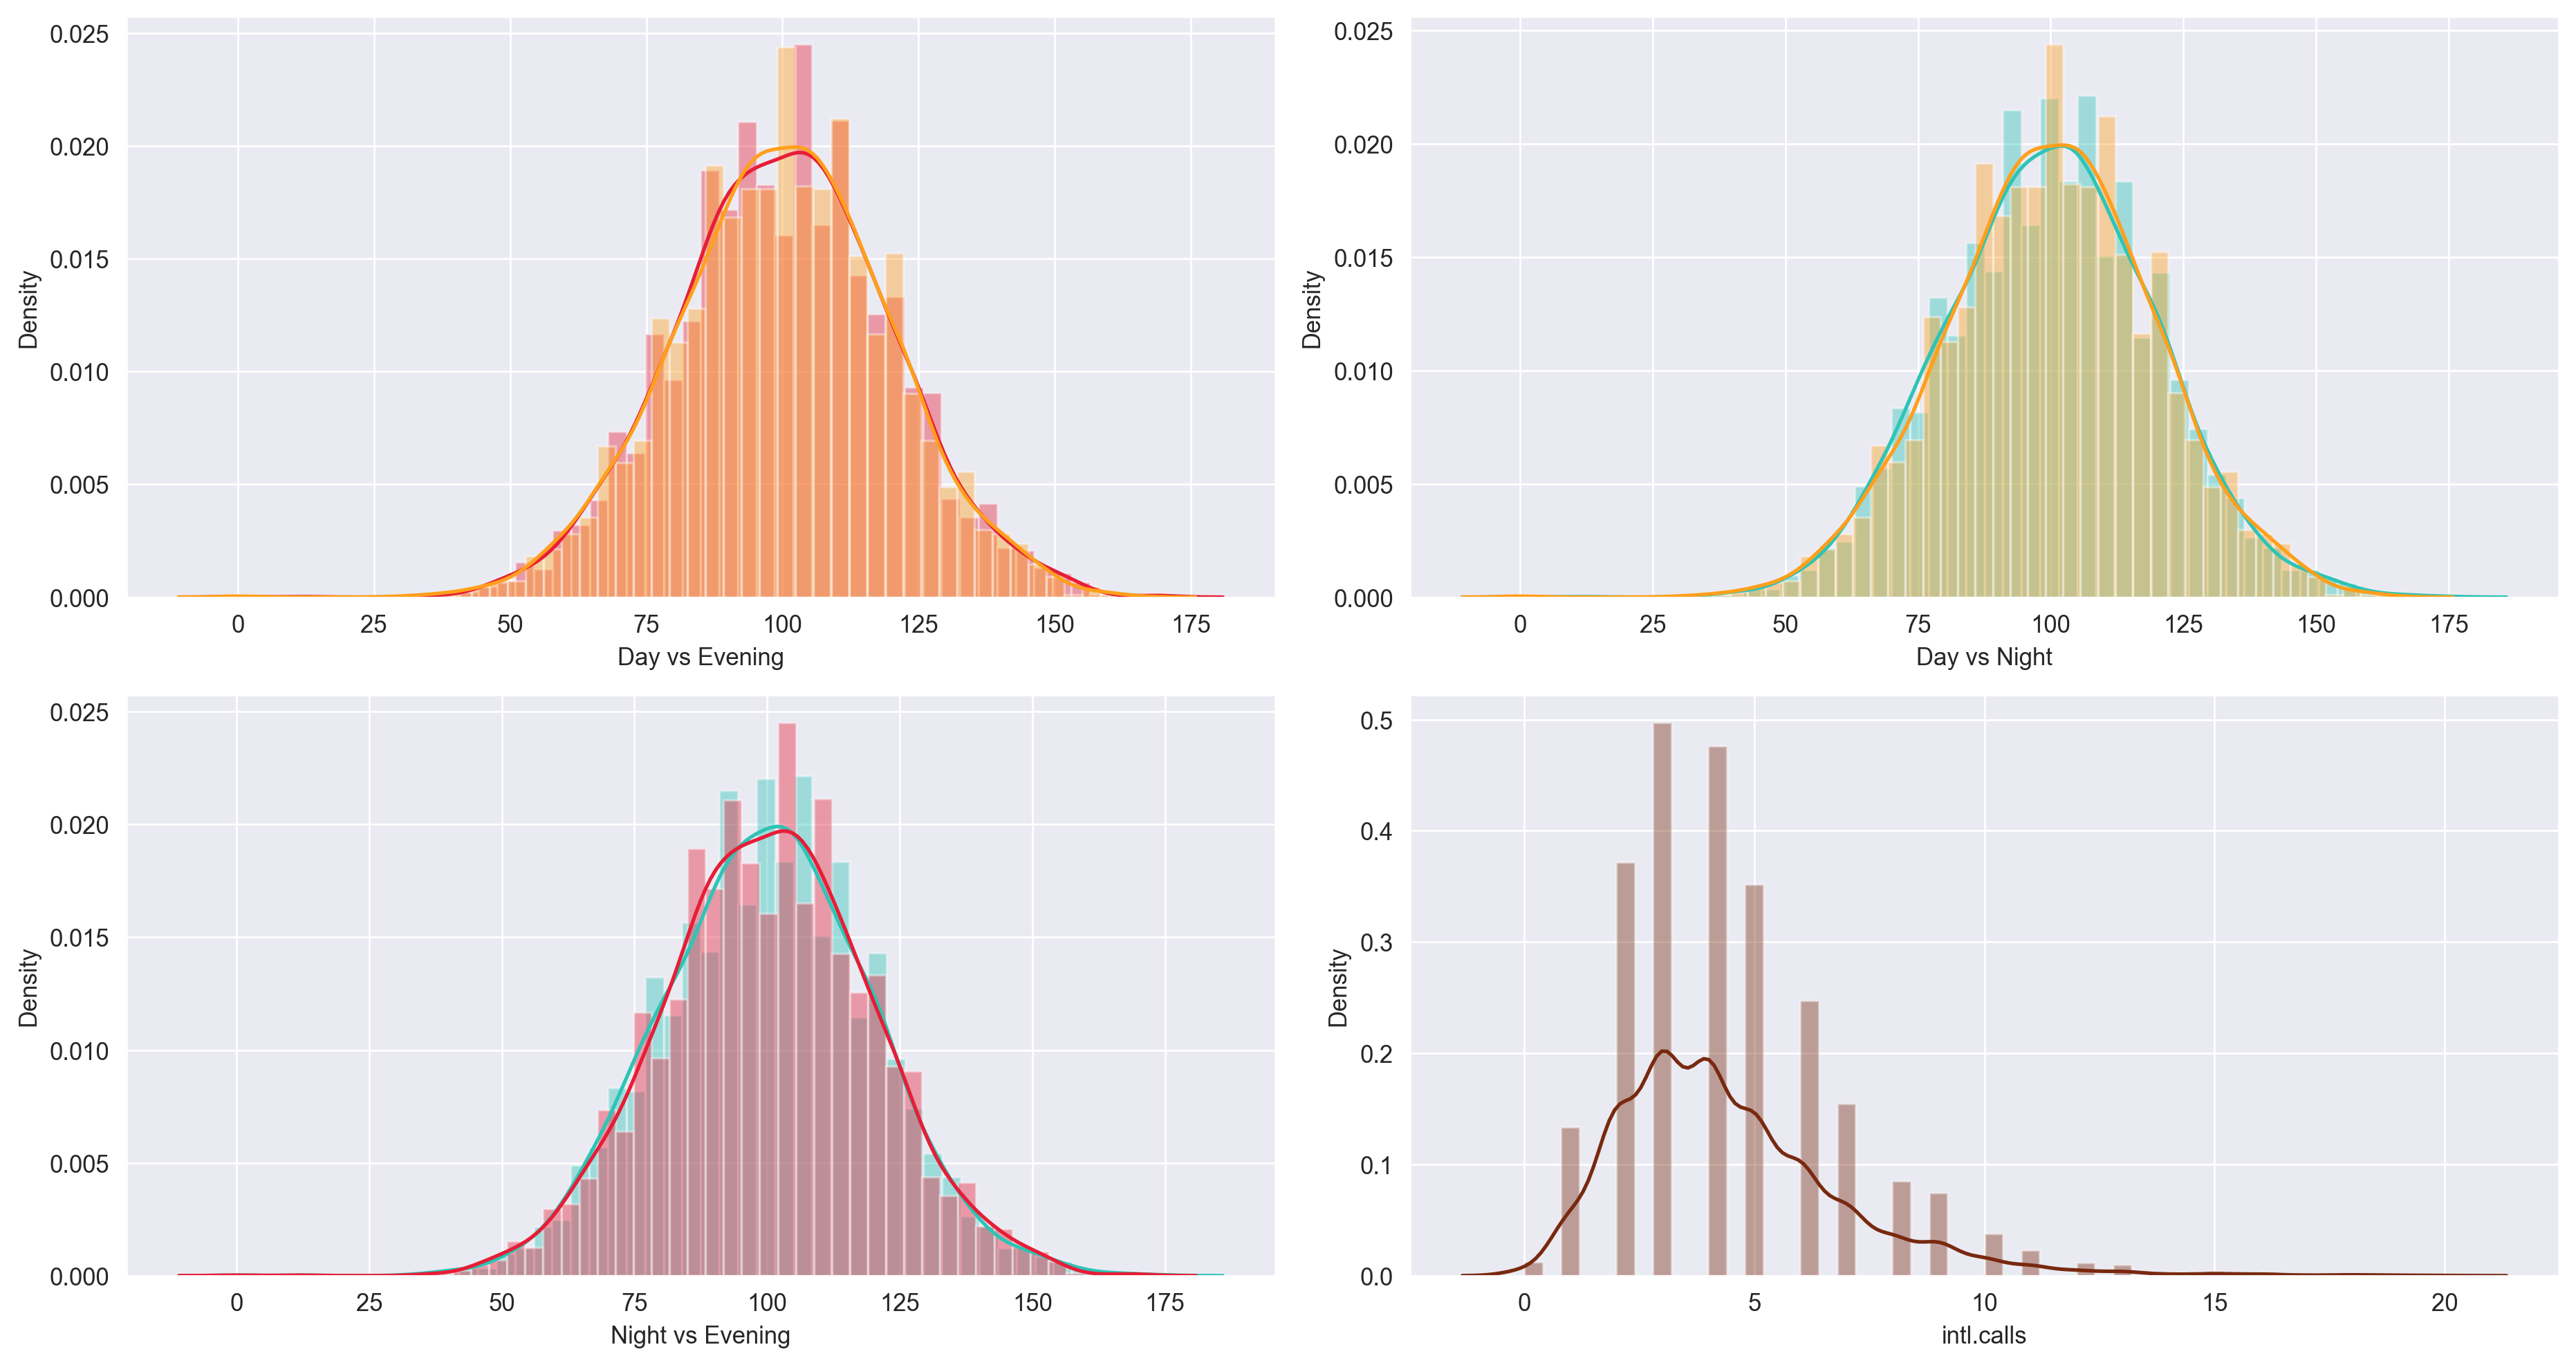

In [39]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0],xlabel = 'Day vs Evening')
sns.distplot(x = train['eve.calls'], ax=ax[0,0], color = '#e71d36')
sns.distplot(x = train['day.calls'], ax=ax[0,0], color = '#ff9f1c')

plt.setp(ax[0,1],xlabel = 'Day vs Night')
sns.distplot(x = train['night.calls'], ax=ax[0,1], color = '#2ec4b6')
sns.distplot(x = train['day.calls'], ax=ax[0,1], color = '#ff9f1c')

plt.setp(ax[1,0],xlabel = 'Night vs Evening')
sns.distplot(x = train['night.calls'], ax=ax[1,0], color = '#2ec4b6')
sns.distplot(x = train['eve.calls'], ax=ax[1,0], color = '#e71d36')

sns.distplot(train['intl.calls'], ax=ax[1,1], color = '#78290f')

plt.tight_layout()

##### Ploting Distplot of trainarge

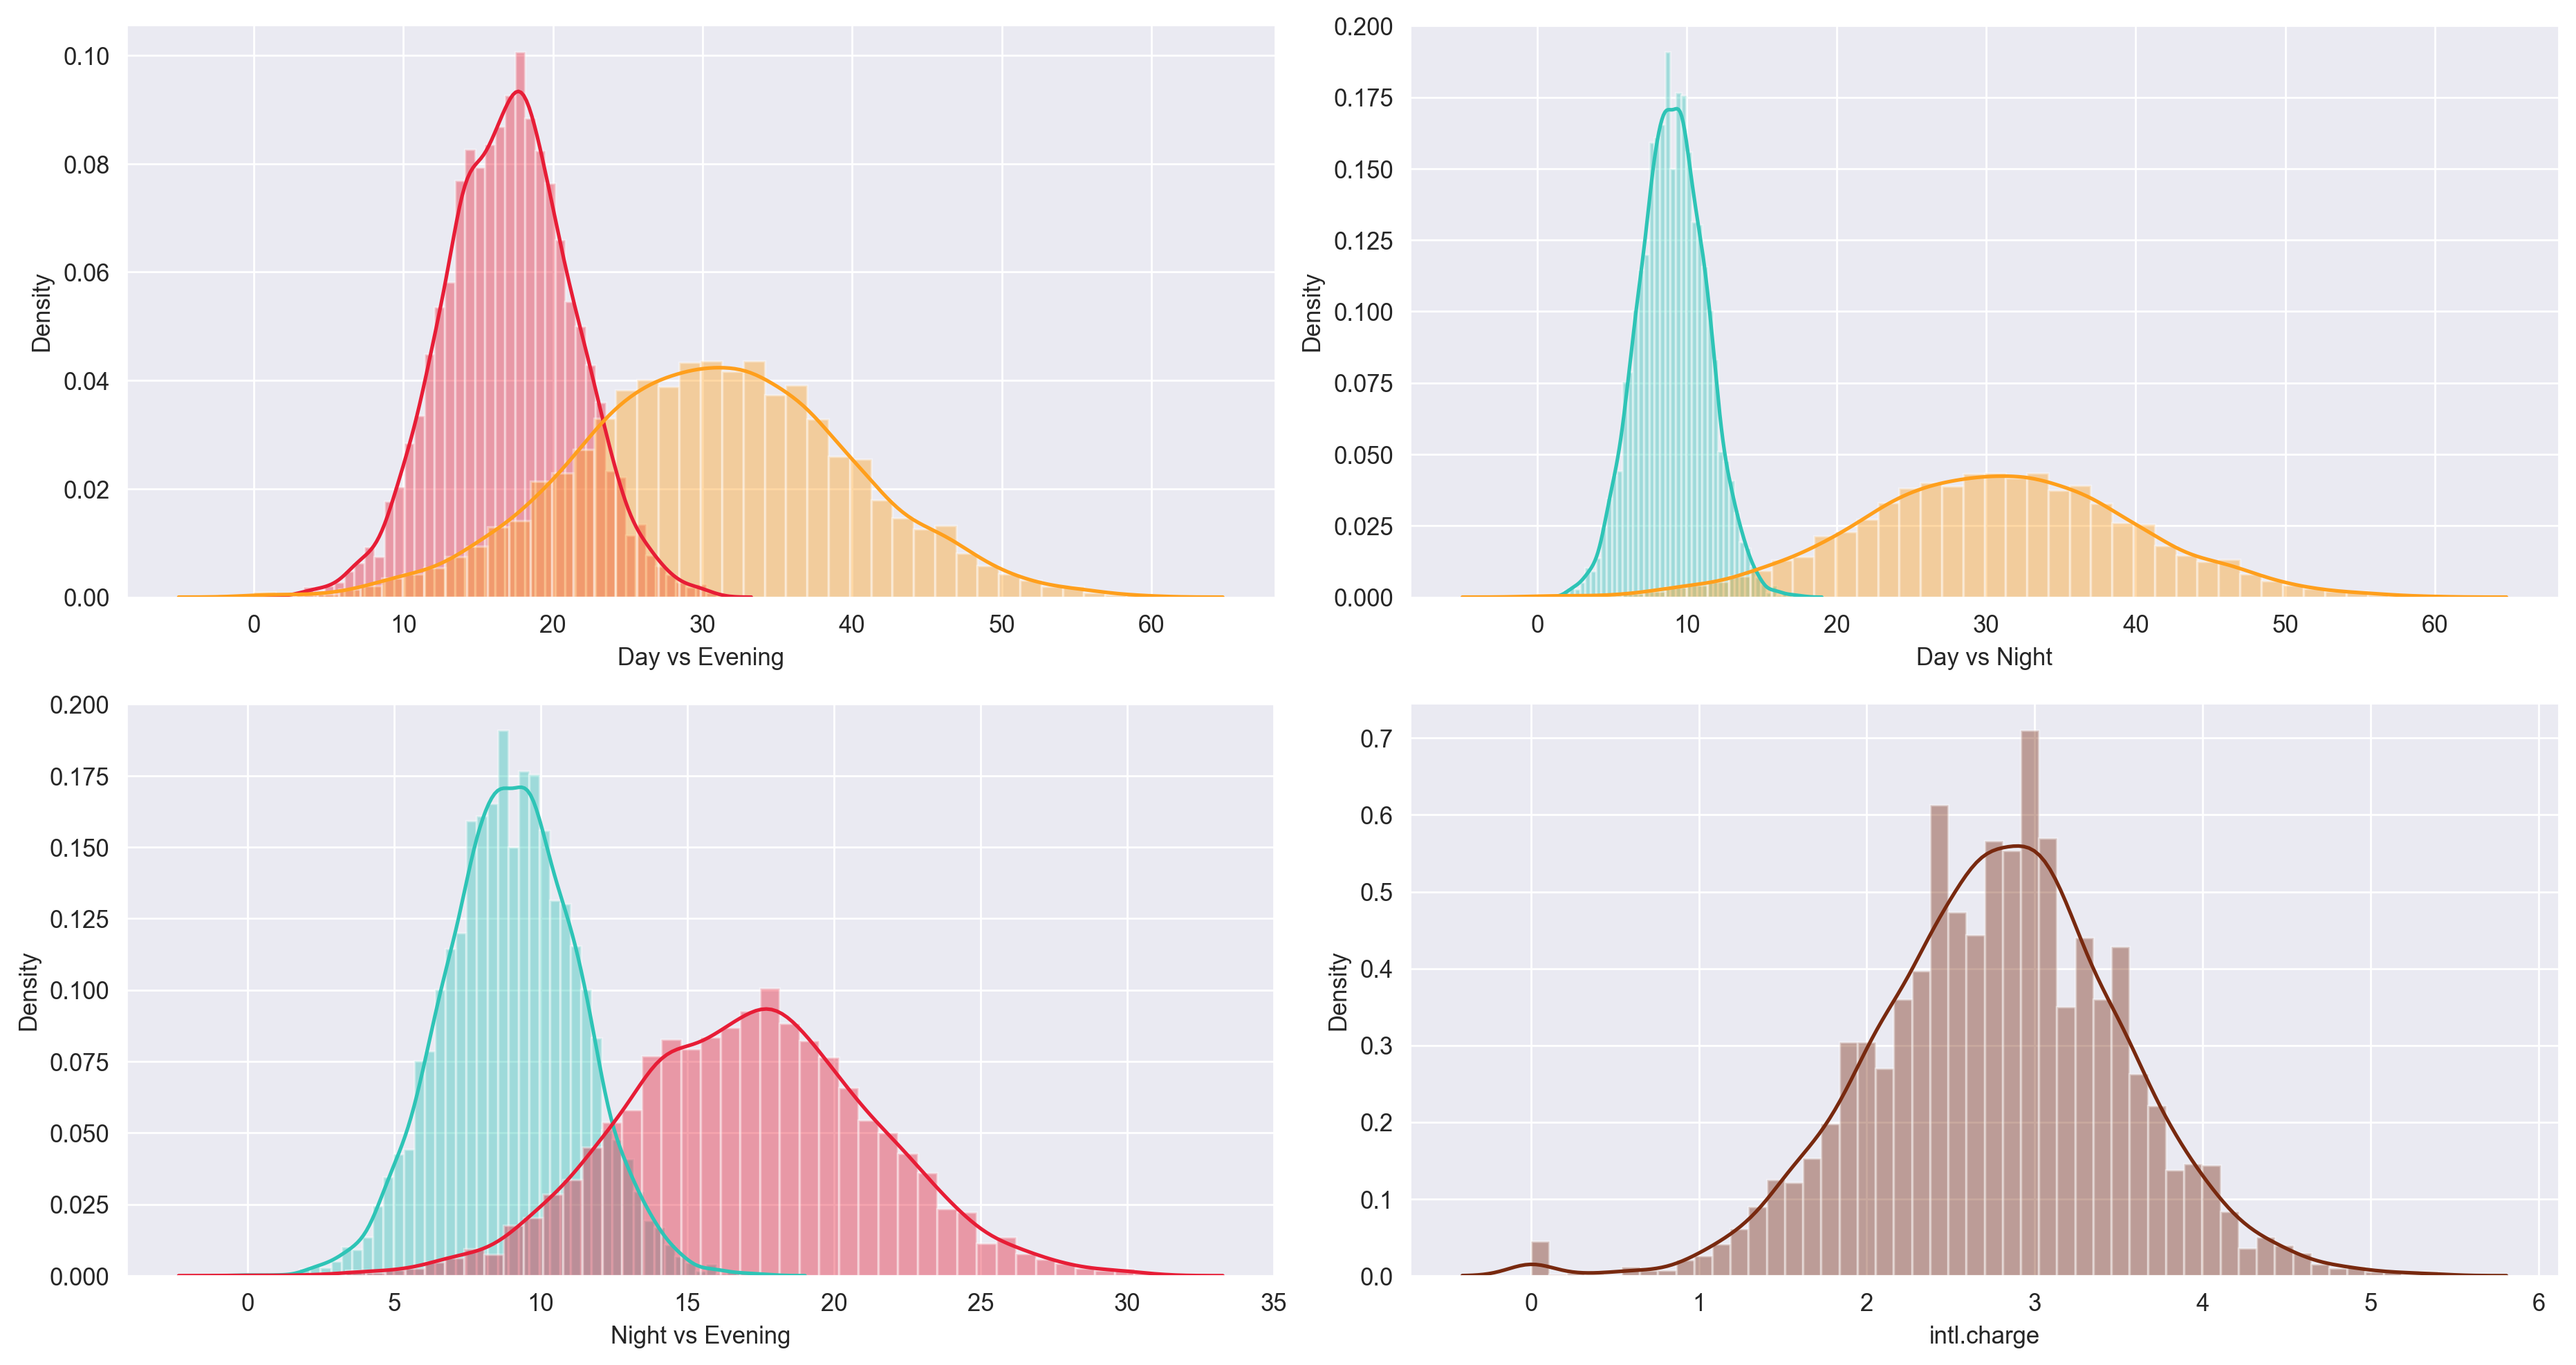

In [40]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0],xlabel = 'Day vs Evening')
sns.distplot(x = train['eve.trainarge'], ax=ax[0,0], color = '#e71d36')
sns.distplot(x = train['day.trainarge'], ax=ax[0,0], color = '#ff9f1c')

plt.setp(ax[0,1],xlabel = 'Day vs Night')
sns.distplot(x = train['night.trainarge'], ax=ax[0,1], color = '#2ec4b6')
sns.distplot(x = train['day.trainarge'], ax=ax[0,1], color = '#ff9f1c')

plt.setp(ax[1,0],xlabel = 'Night vs Evening')
sns.distplot(x = train['night.trainarge'], ax=ax[1,0], color = '#2ec4b6')
sns.distplot(x = train['eve.trainarge'], ax=ax[1,0], color = '#e71d36')

sns.distplot(train['intl.trainarge'], ax=ax[1,1], color = '#78290f')

plt.tight_layout()

#### Ploting boxplot of 3 Sub-Categories

##### Compairing Mins in Dataset

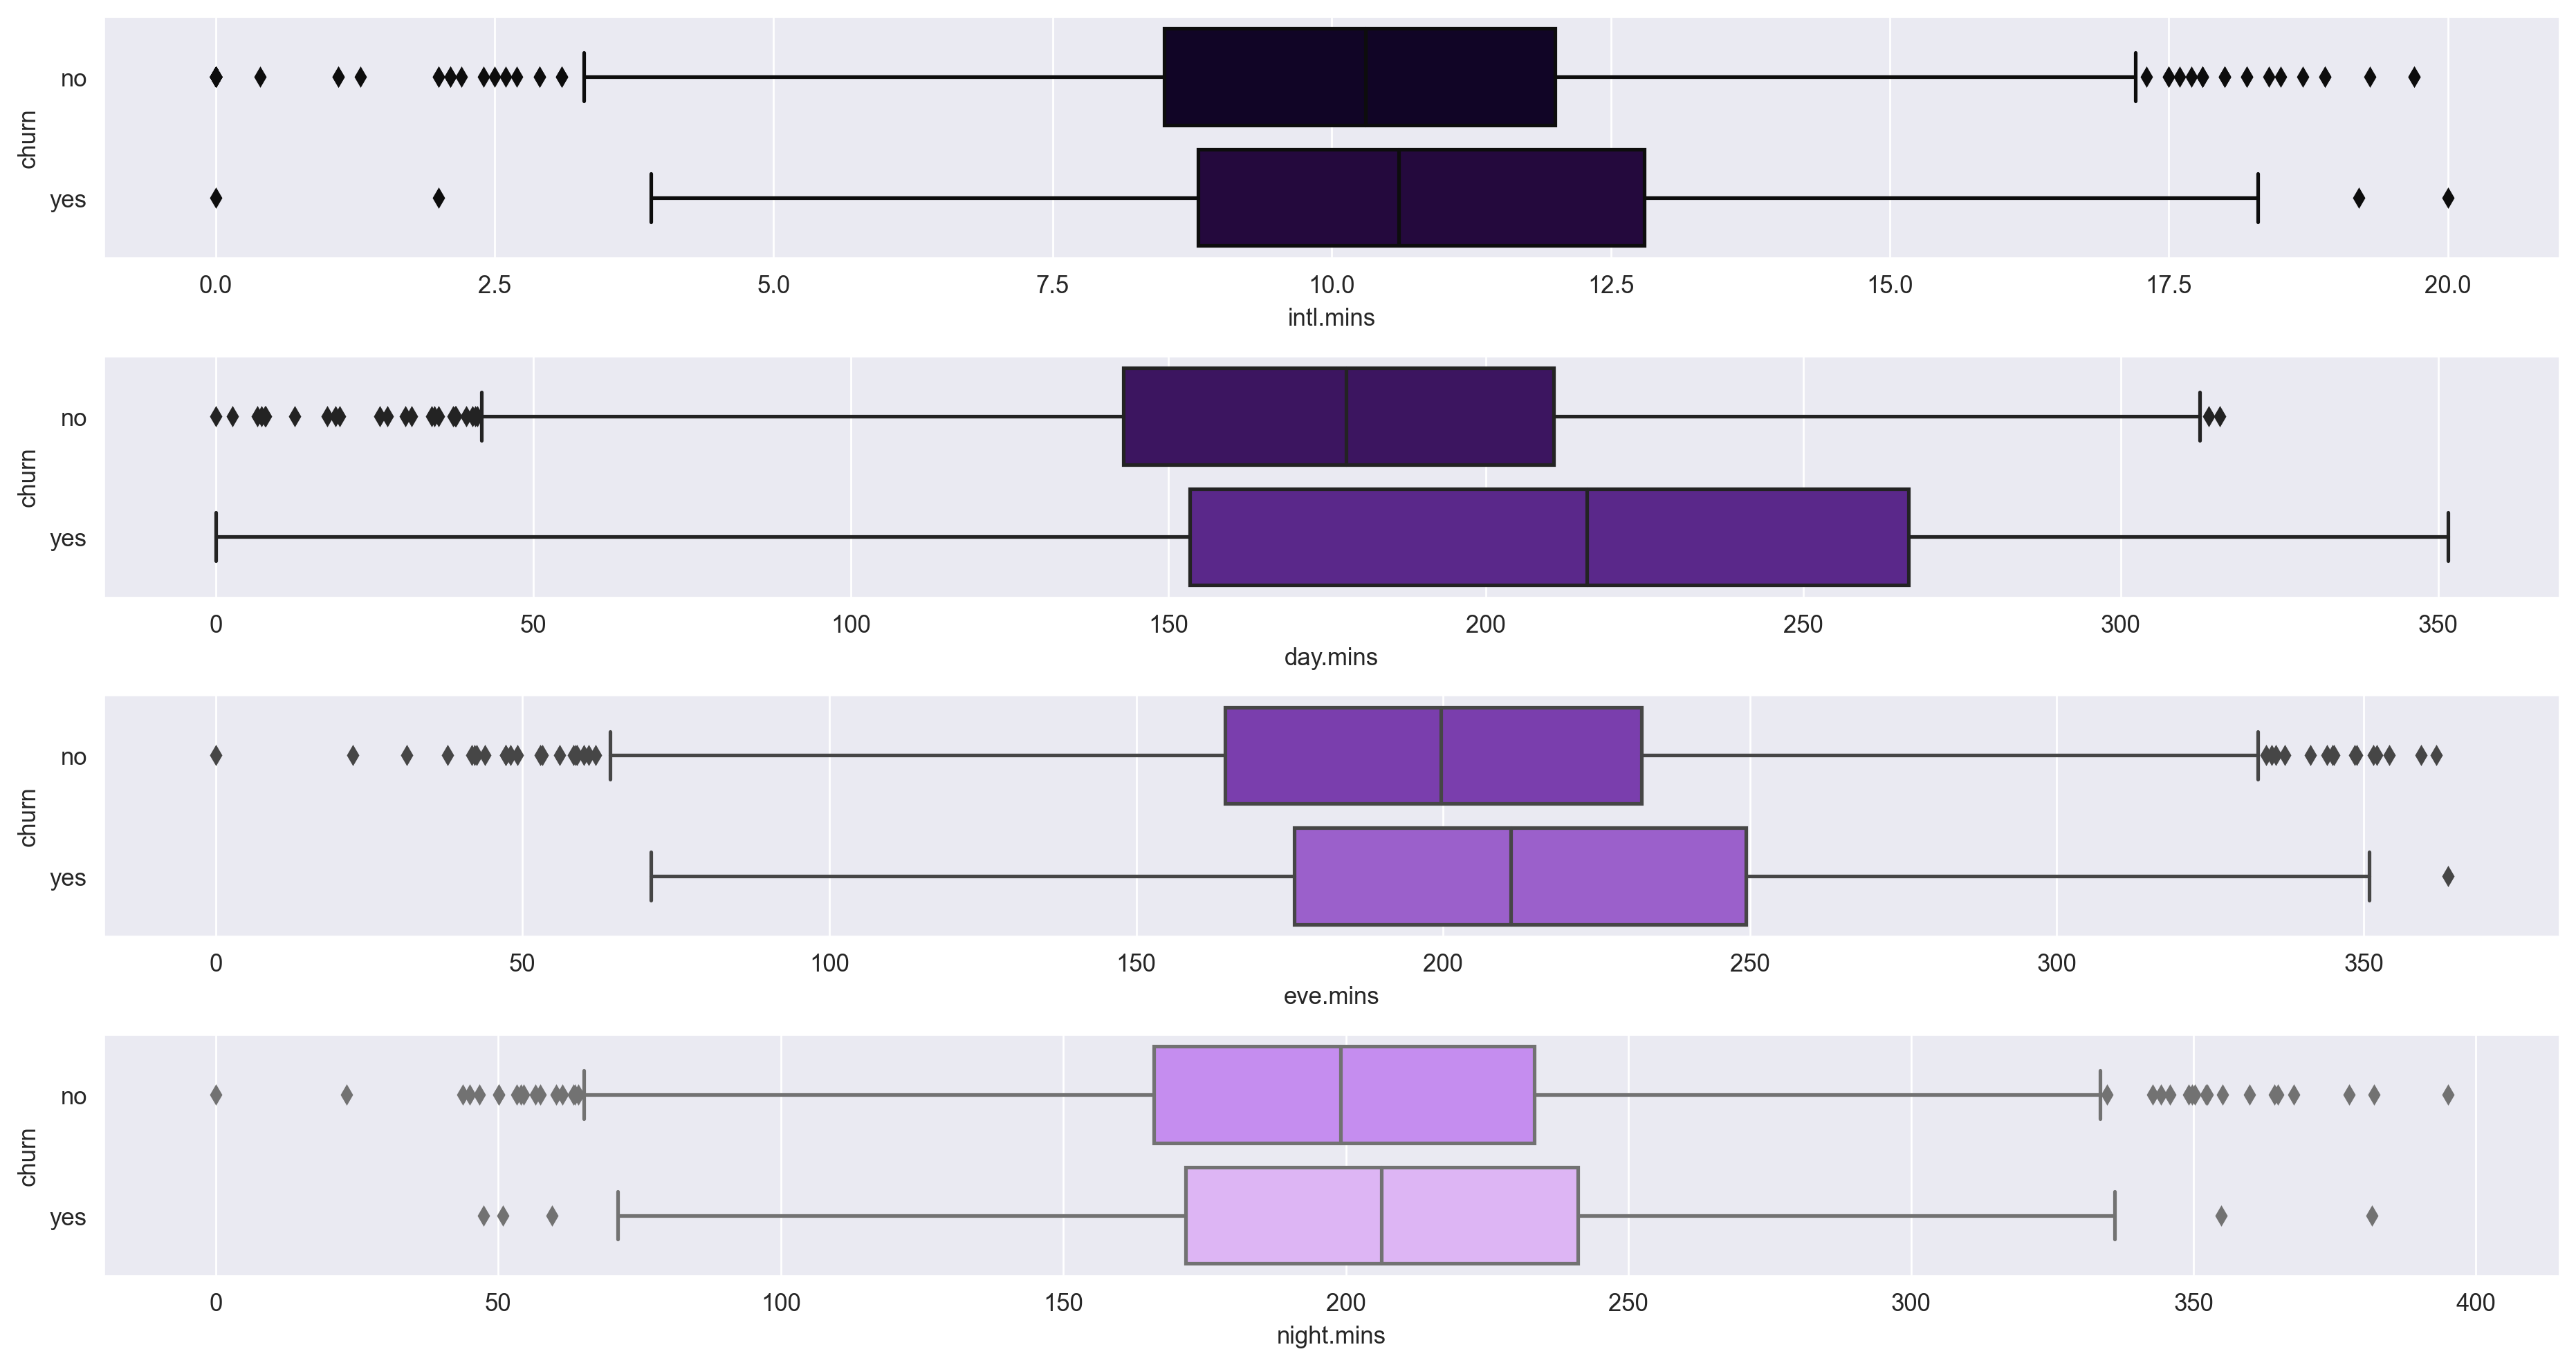

In [41]:
fig, ax = plt.subplots(nrows=4, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'intl.mins', data = train, 
            ax=ax[0], palette=['#10002b', '#240046'])

sns.boxplot(y ='trainurn', x = 'day.mins', data = train, 
            ax=ax[1], palette=['#3c096c', '#5a189a'])

sns.boxplot(y ='trainurn', x = 'eve.mins', data = train, 
            ax=ax[2], palette=['#7b2cbf', '#9d4edd'])

sns.boxplot(y ='trainurn', x = 'night.mins', data = train, 
            ax=ax[3], palette=['#c77dff', '#e0aaff'])

plt.tight_layout()

##### Compairing Calls in Dataset

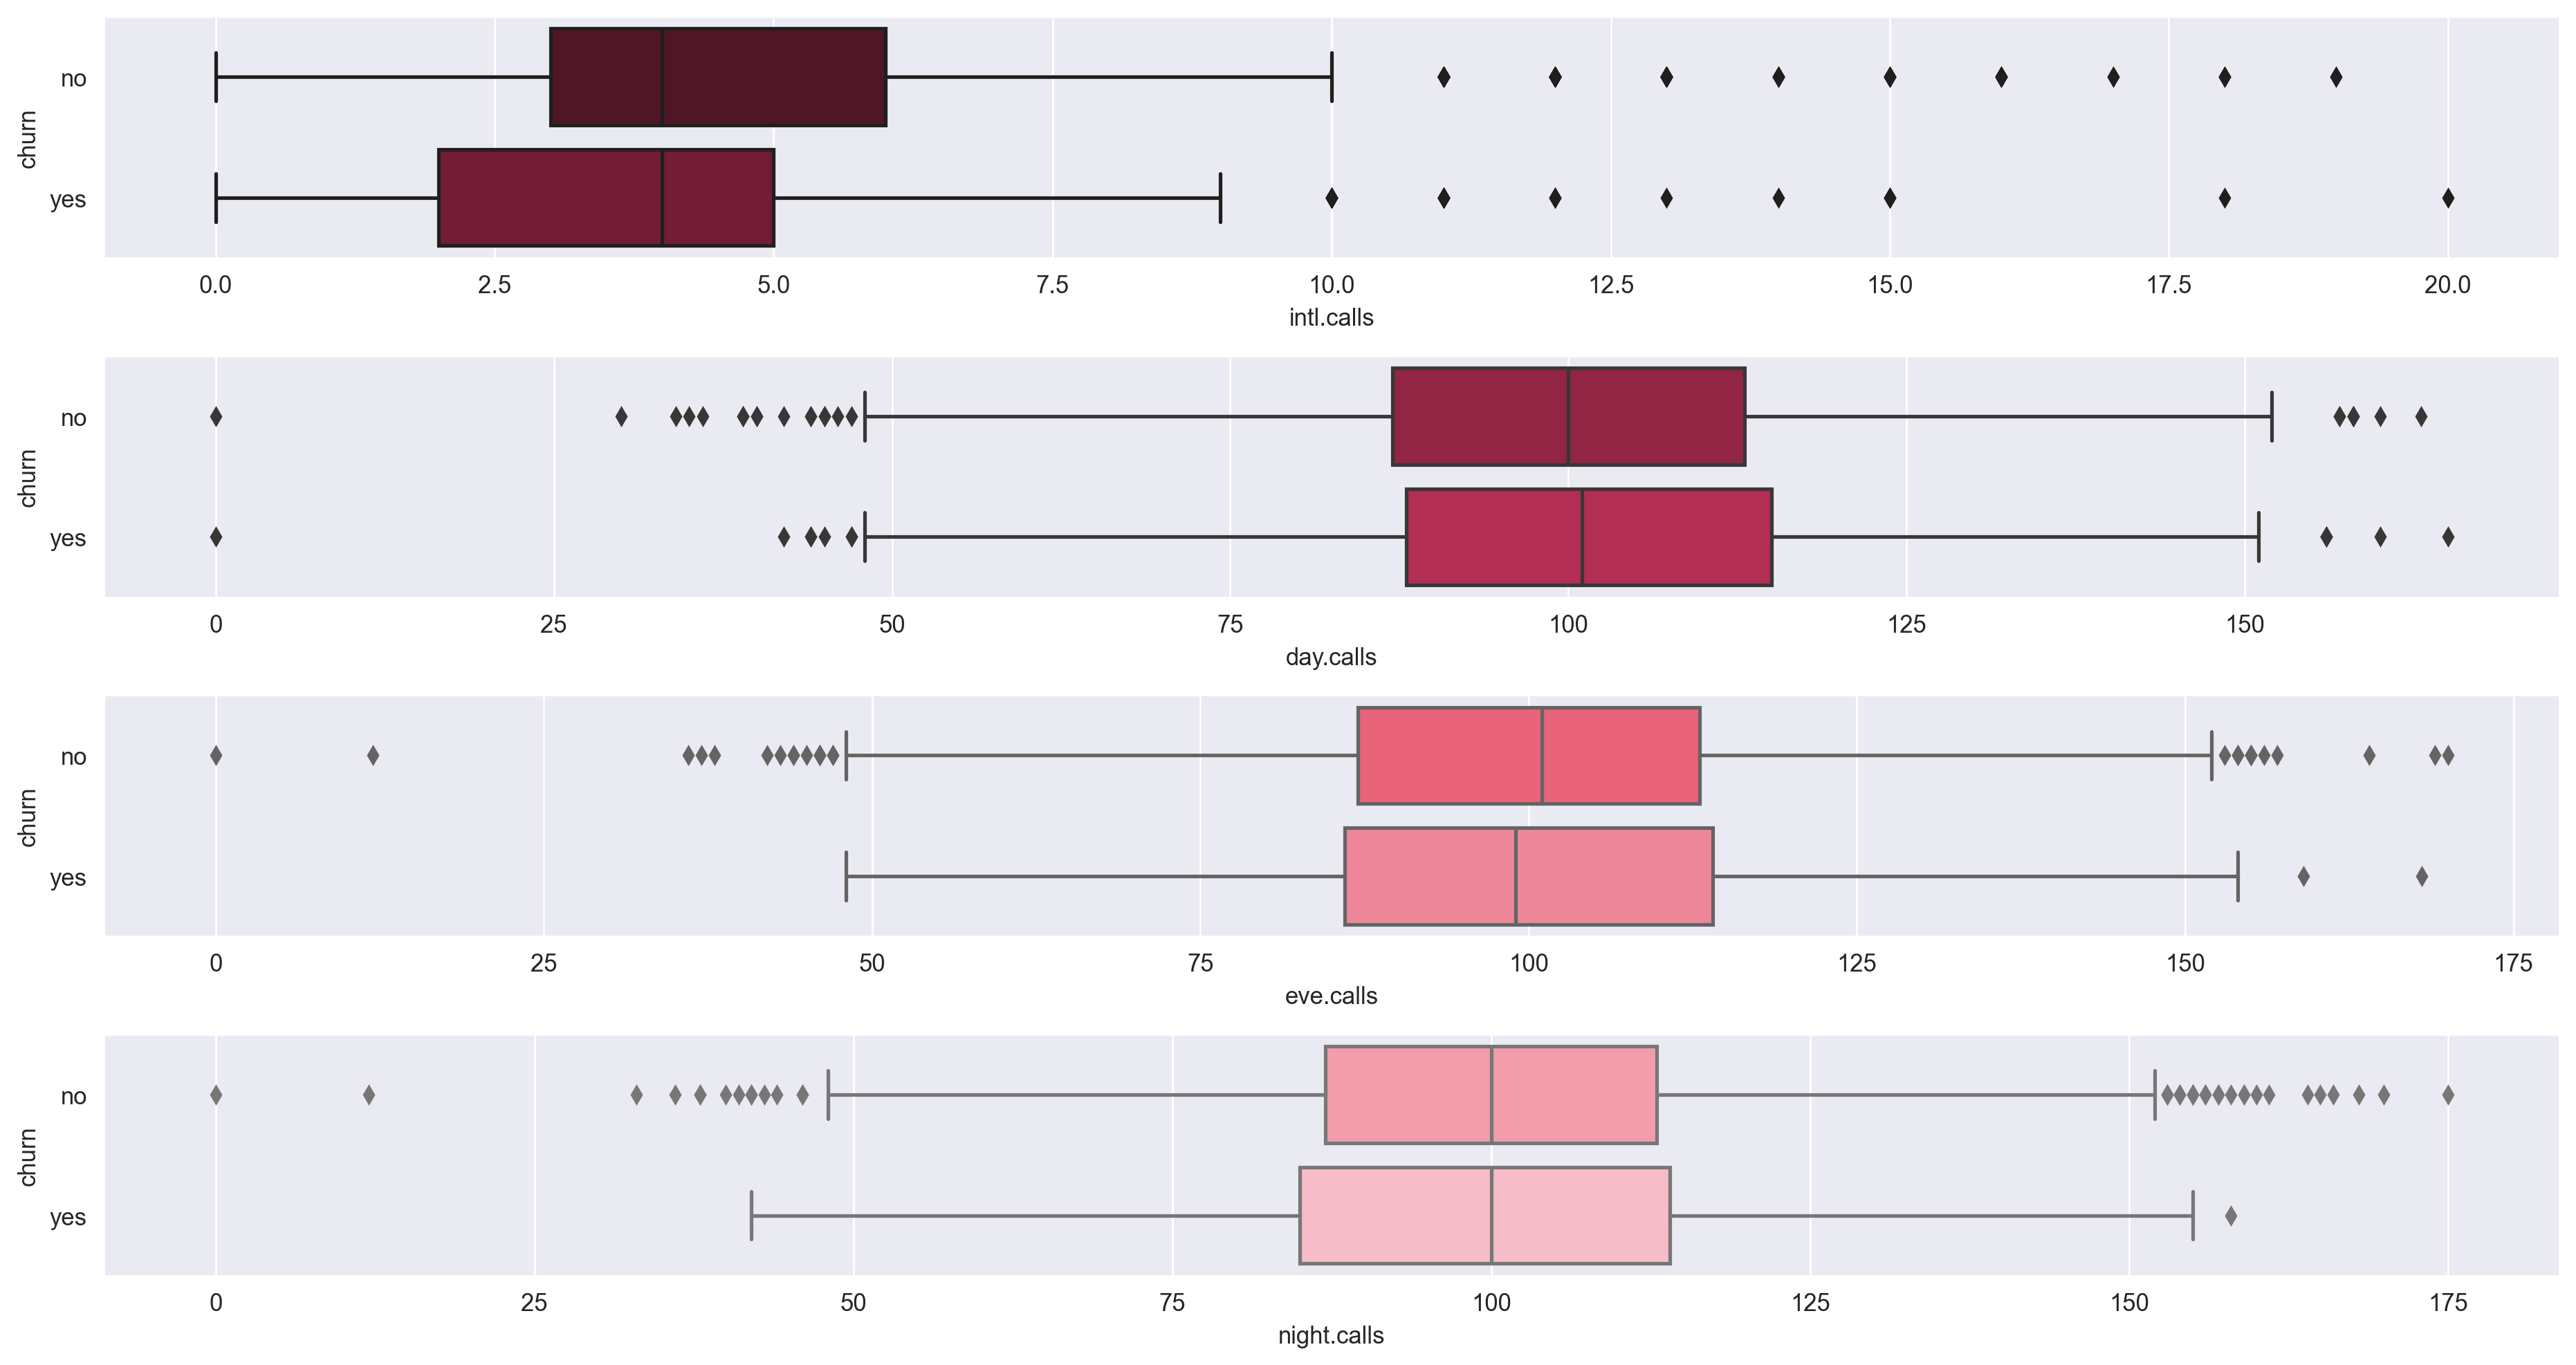

In [42]:
fig, ax = plt.subplots(nrows=4, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'intl.calls', data = train, 
            ax=ax[0], palette=['#590d22', '#800f2f'])

sns.boxplot(y ='trainurn', x = 'day.calls', data = train, 
            ax=ax[1], palette=['#a4133c', '#c9184a'])

sns.boxplot(y ='trainurn', x = 'eve.calls', data = train, 
            ax=ax[2], palette=['#ff4d6d', '#ff758f'])

sns.boxplot(y ='trainurn', x = 'night.calls', data = train, 
            ax=ax[3], palette=['#ff8fa3', '#ffb3c1'])

plt.tight_layout()

##### Compairing trainarge in Dataset

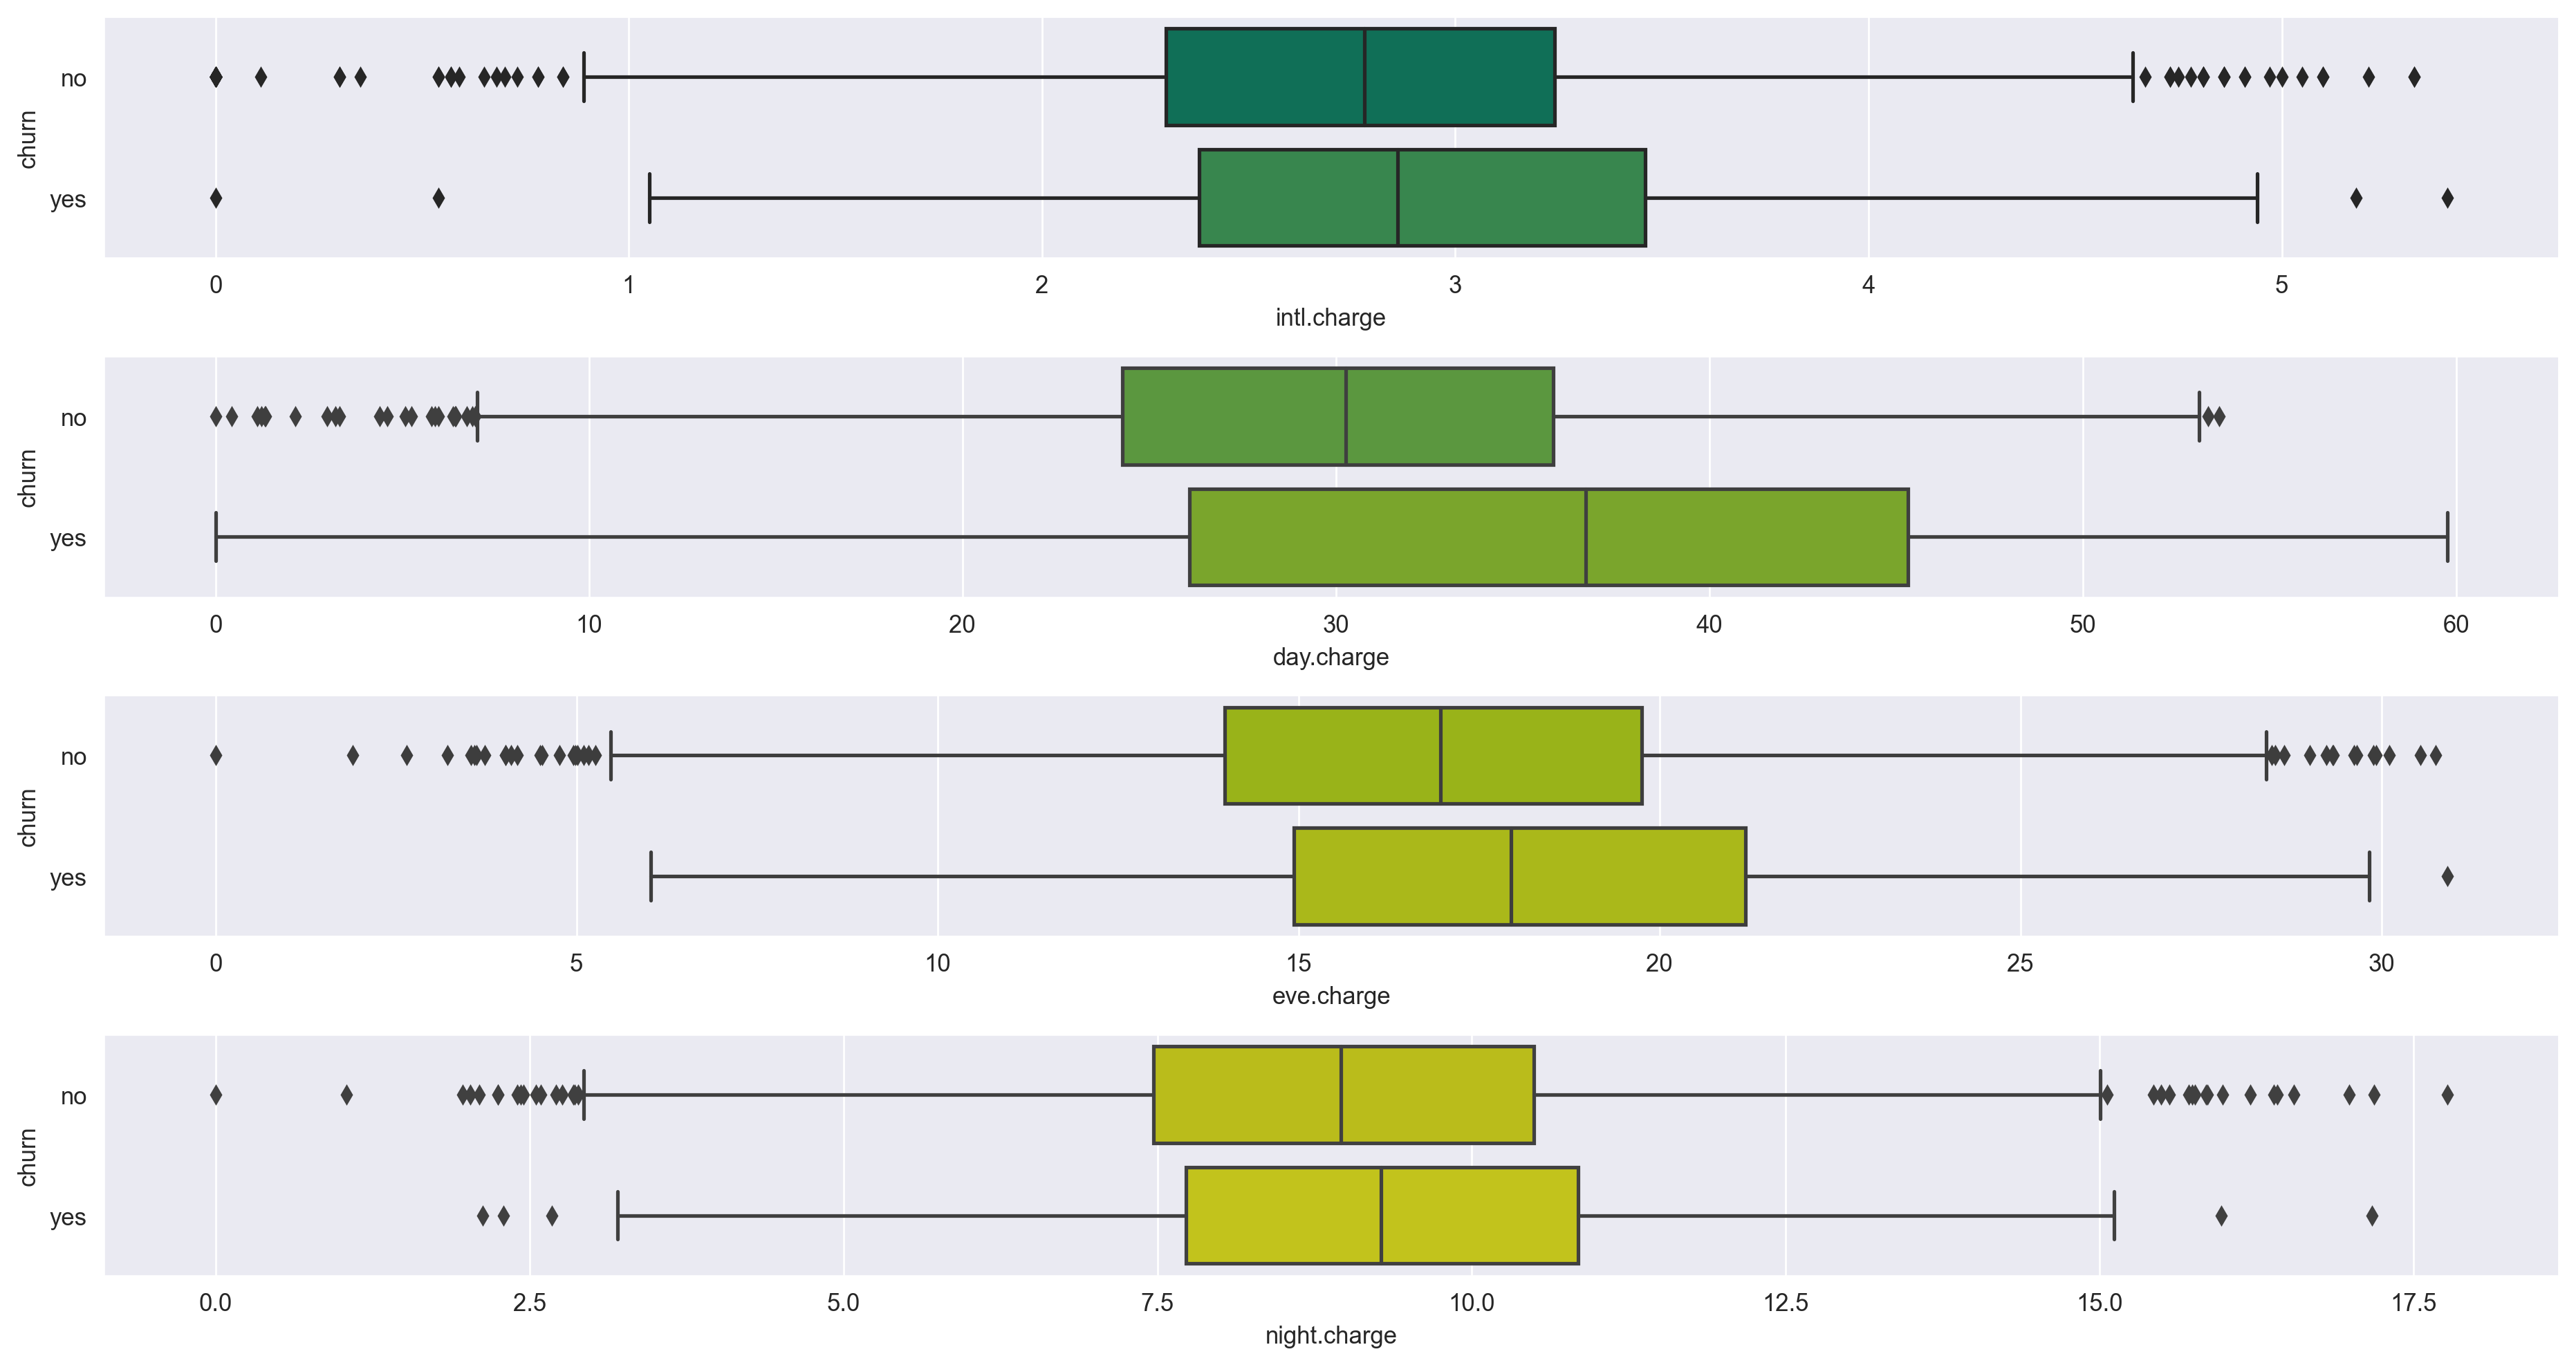

In [43]:
fig, ax = plt.subplots(nrows=4, figsize = (15,8))

sns.boxplot(y ='trainurn', x = 'intl.trainarge', data = train, 
            ax=ax[0], palette=['#007f5f', '#2b9348'])

sns.boxplot(y ='trainurn', x = 'day.trainarge', data = train, 
            ax=ax[1], palette=['#55a630', '#80b918'])

sns.boxplot(y ='trainurn', x = 'eve.trainarge', data = train, 
            ax=ax[2], palette=['#aacc00', '#bfd200'])

sns.boxplot(y ='trainurn', x = 'night.trainarge', data = train, 
            ax=ax[3], palette=['#d4d700', '#dddf00'])

plt.tight_layout()

### Outlier Detection

In [54]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(round(percentage,2)) + ' %')


In [45]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [46]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


In [105]:
train.iloc[:,2:-1]

account.length voice.plan  voice.messages intl.plan  intl.mins  \
0                128        yes              25        no       10.0   
1                107        yes              26        no       13.7   
2                137         no               0        no       12.2   
3                 84         no               0       yes        6.6   
4                 75         no               0       yes       10.1   
...              ...        ...             ...       ...        ...   
4995              50        yes              40        no        9.9   
4996             152         no               0        no       14.7   
4997              61         no               0        no       13.6   
4998             109         no               0        no        8.5   
4999              86        yes              34        no        9.3   

      intl.calls  intl.charge  day.mins  day.calls day.charge eve.mins  \
0              3         2.70     265.1        110      45.07    197.4   
1              3         3.70     161.6        123      27.47    195.5   
2              5         3.29     243.4        114      41.38    121.2   
3              7         1.78     299.4         71       50.9     61.9   
4              3         2.73     166.7        113      28.34    148.3   
...          ...          ...       ...        ...        ...      ...   
4995           5         2.67     235.7        127      40.07      223   
4996           2         3.97     184.2         90      31.31    256.8   
4997           4         3.67     140.6         89       23.9    172.8   
4998           6         2.30     188.8         67       32.1    171.7   
4999          16         2.51     129.4        102         22    267.1   

      eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer.calls  
0                  1  
1                  1  
2                  0  
3                  2  
4                  3  
...              ...  
4995               2  
4996               3  
4997               1  
4998               0  
4999               0  

[5000 rows x 17 columns]

In [775]:
train_ot = train.iloc[:,2:-1]
train_ot.drop(columns=['intl.plan', 'voice.plan'], inplace=True)

plt.rcParams['figure.figsize'] = (16,3.5)
plt.rcParams['figure.dpi'] = 250

#### Outlier Percentage (Before)

In [776]:
outlier_percentage(train_ot)

account.length : 0.48 %
voice.messages : 1.21 %
intl.mins : 1.43 %
intl.calls : 2.37 %
intl.charge : 1.43 %
day.mins : 0.68 %
day.calls : 0.7 %
day.charge : 0.68 %
eve.mins : 0.87 %
eve.calls : 0.68 %
eve.charge : 0.85 %
night.mins : 0.8 %
night.calls : 0.87 %
night.charge : 0.78 %
customer.calls : 8.01 %


#### Removing Outlier In account.length Column

<AxesSubplot:>

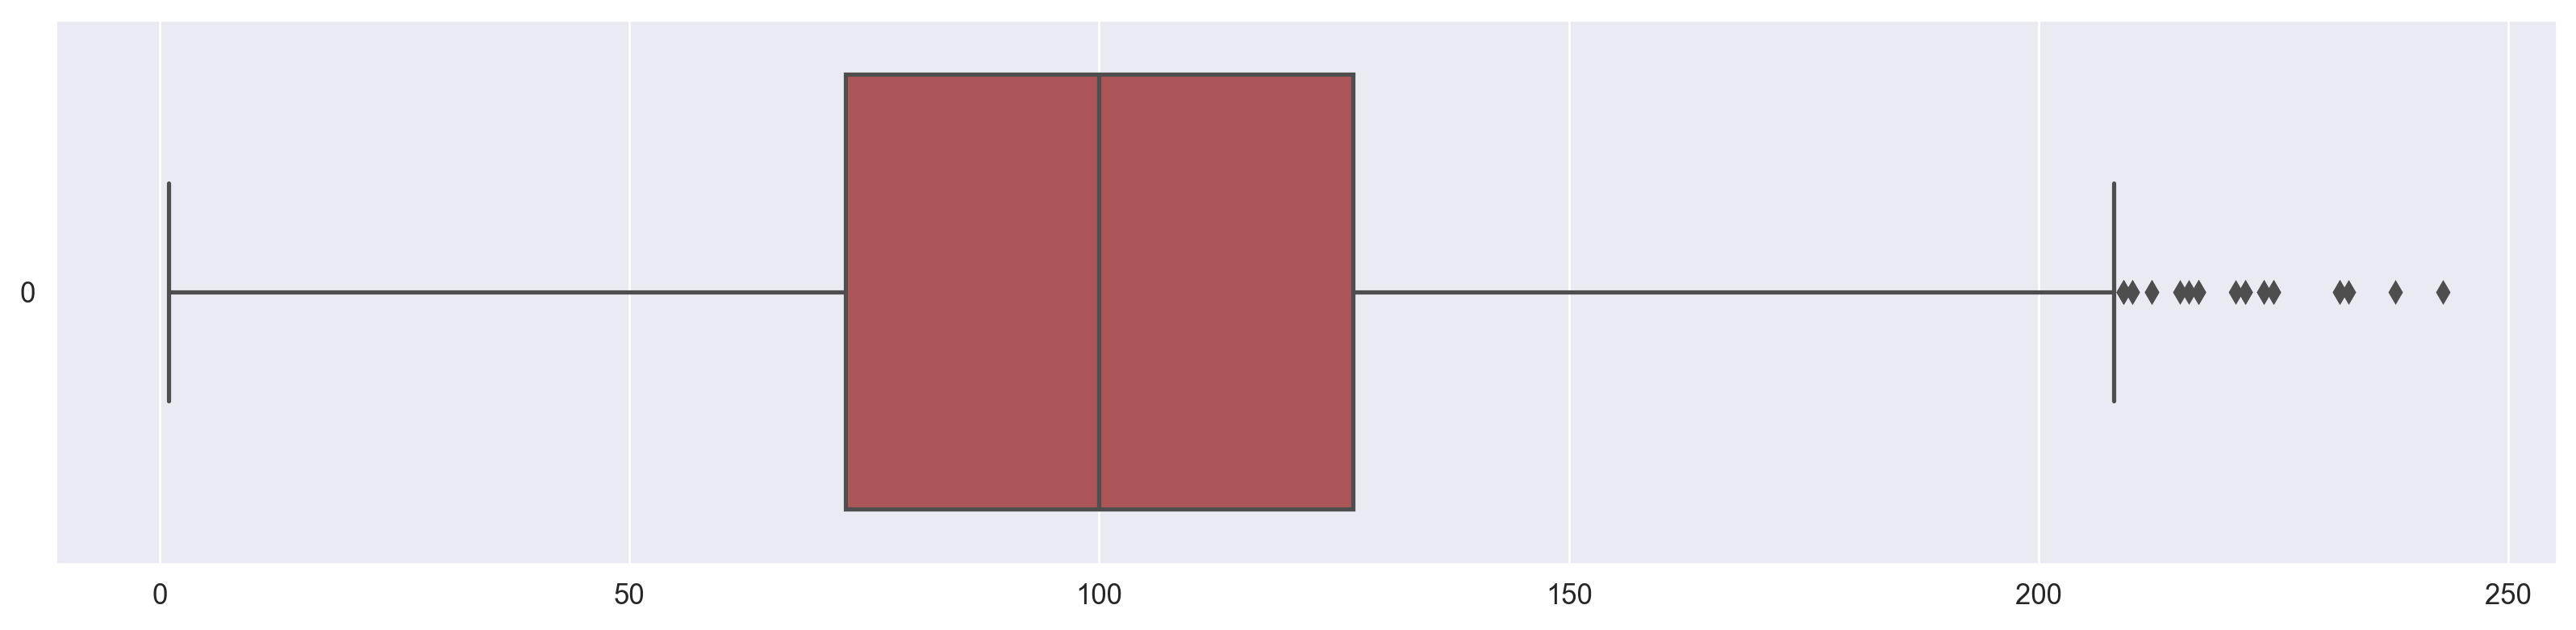

In [777]:
sns.boxplot(train_ot['account.length'], orient='h', color = '#bc4749')

In [778]:
train_ot = remove_outlier(train_ot, 'account.length')

<AxesSubplot:>

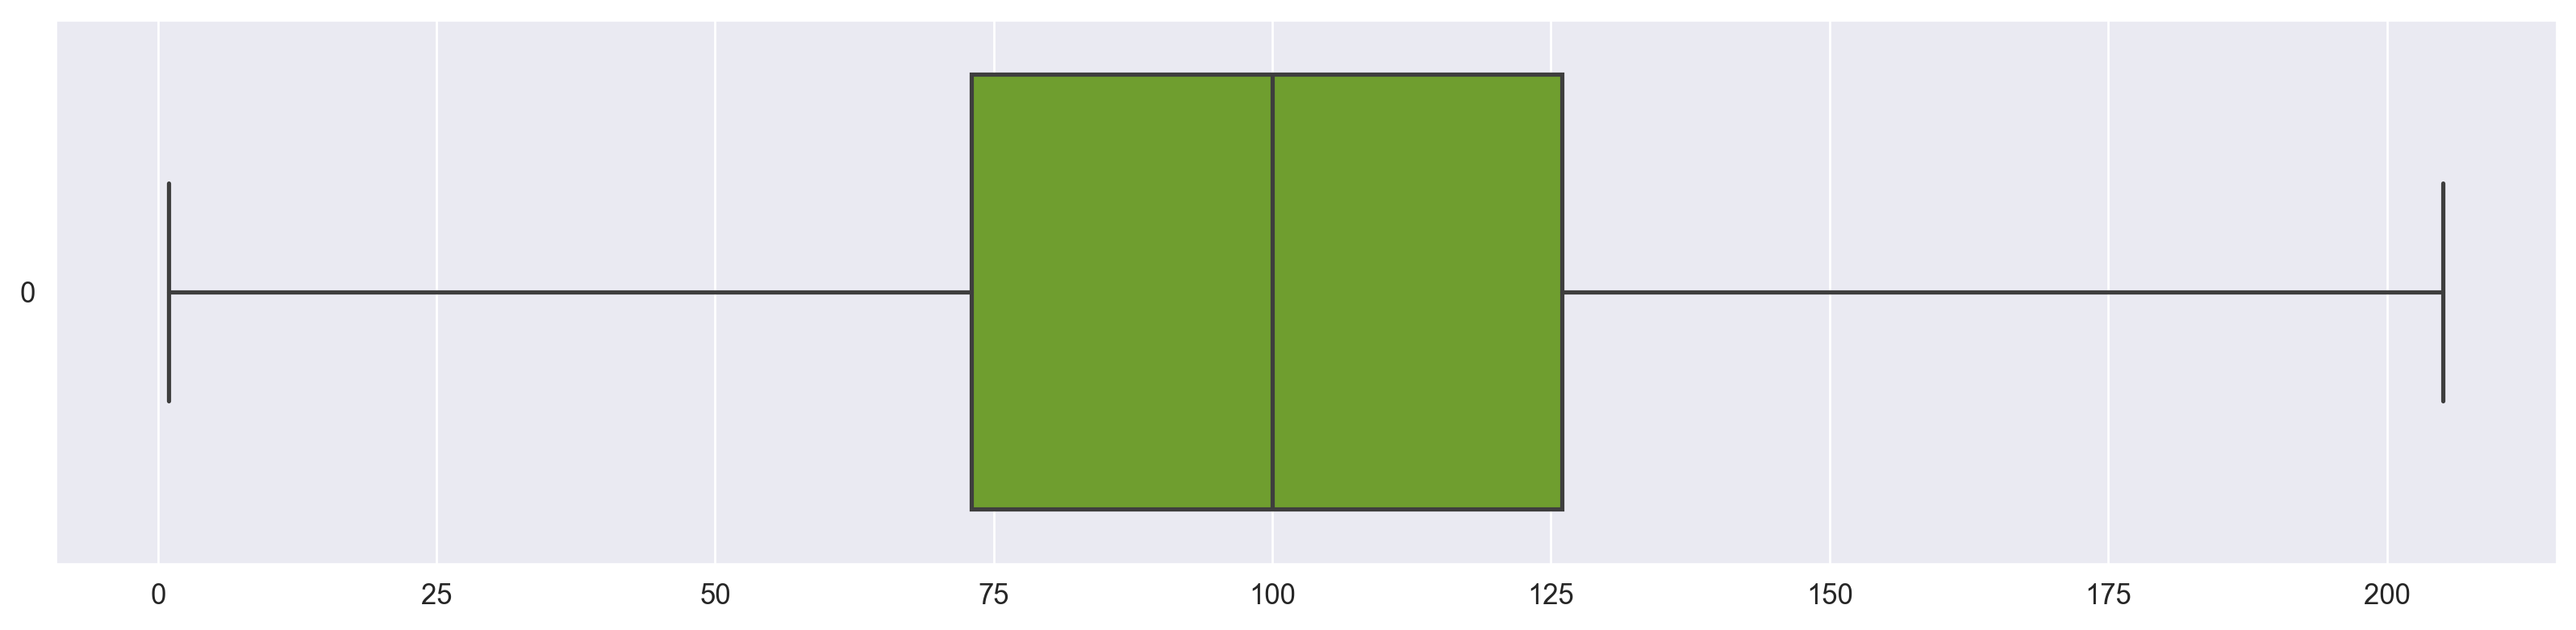

In [779]:
sns.boxplot(train_ot['account.length'], orient='h', color = '#72b01d')

#### Removing Outlier In voice.messages Column

<AxesSubplot:>

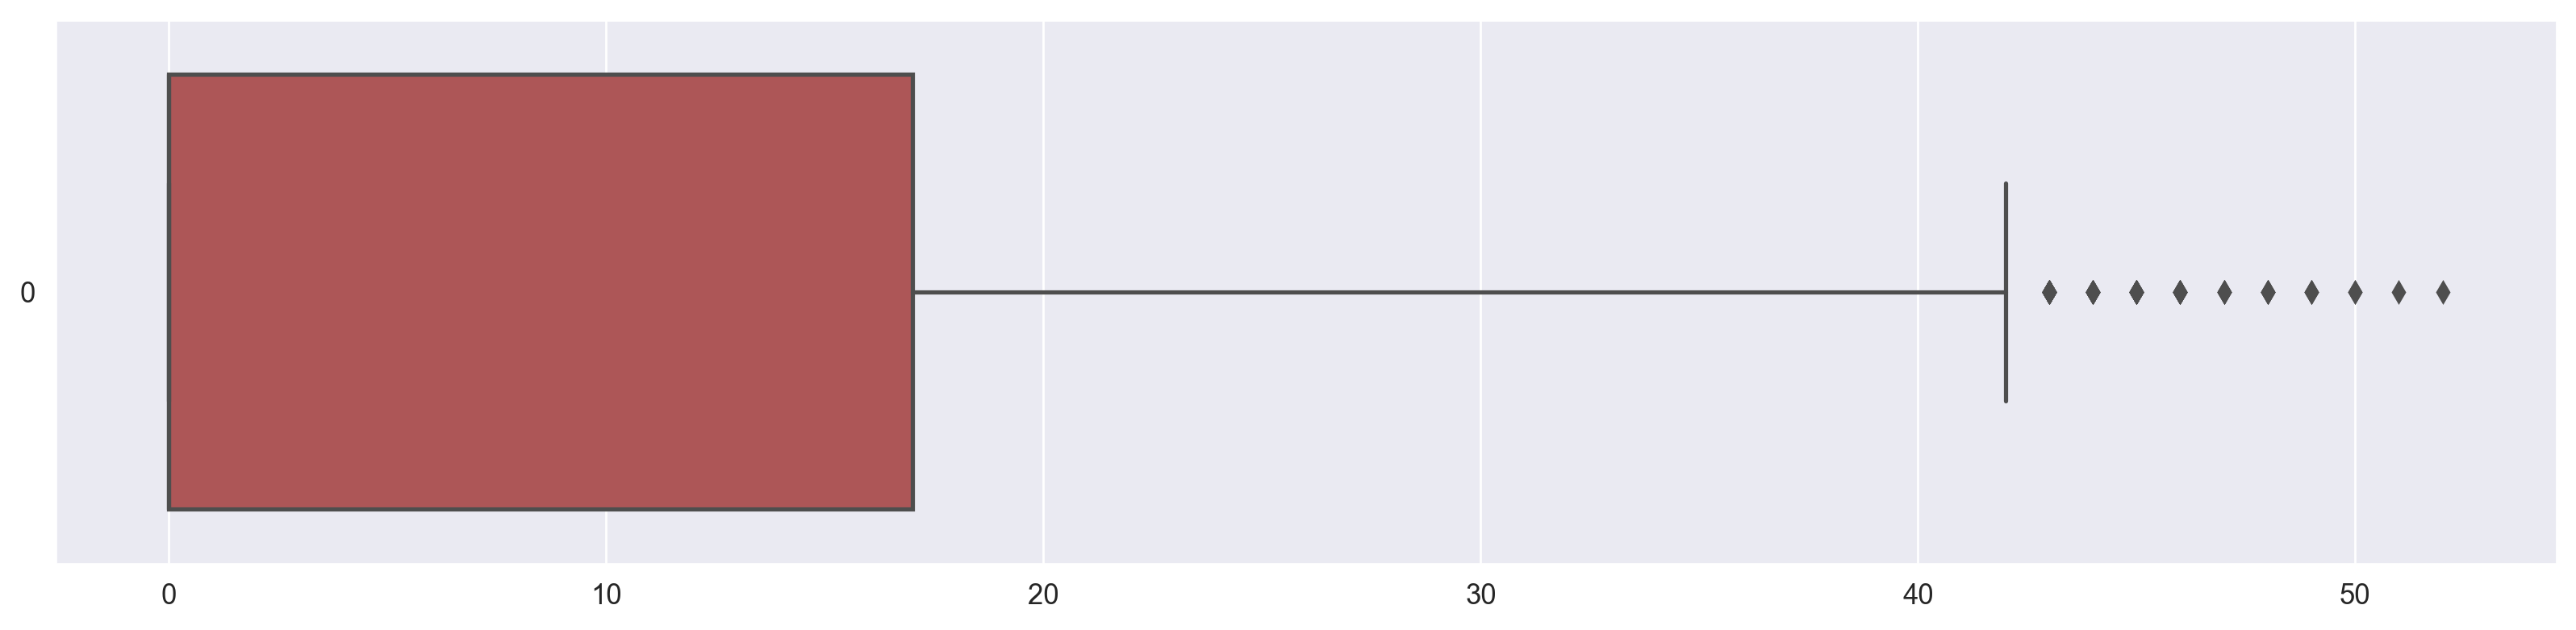

In [780]:
sns.boxplot(train_ot['voice.messages'], orient='h', color = '#bc4749')

In [781]:
replace_outlier_extream(train_ot, 'voice.messages')

<AxesSubplot:>

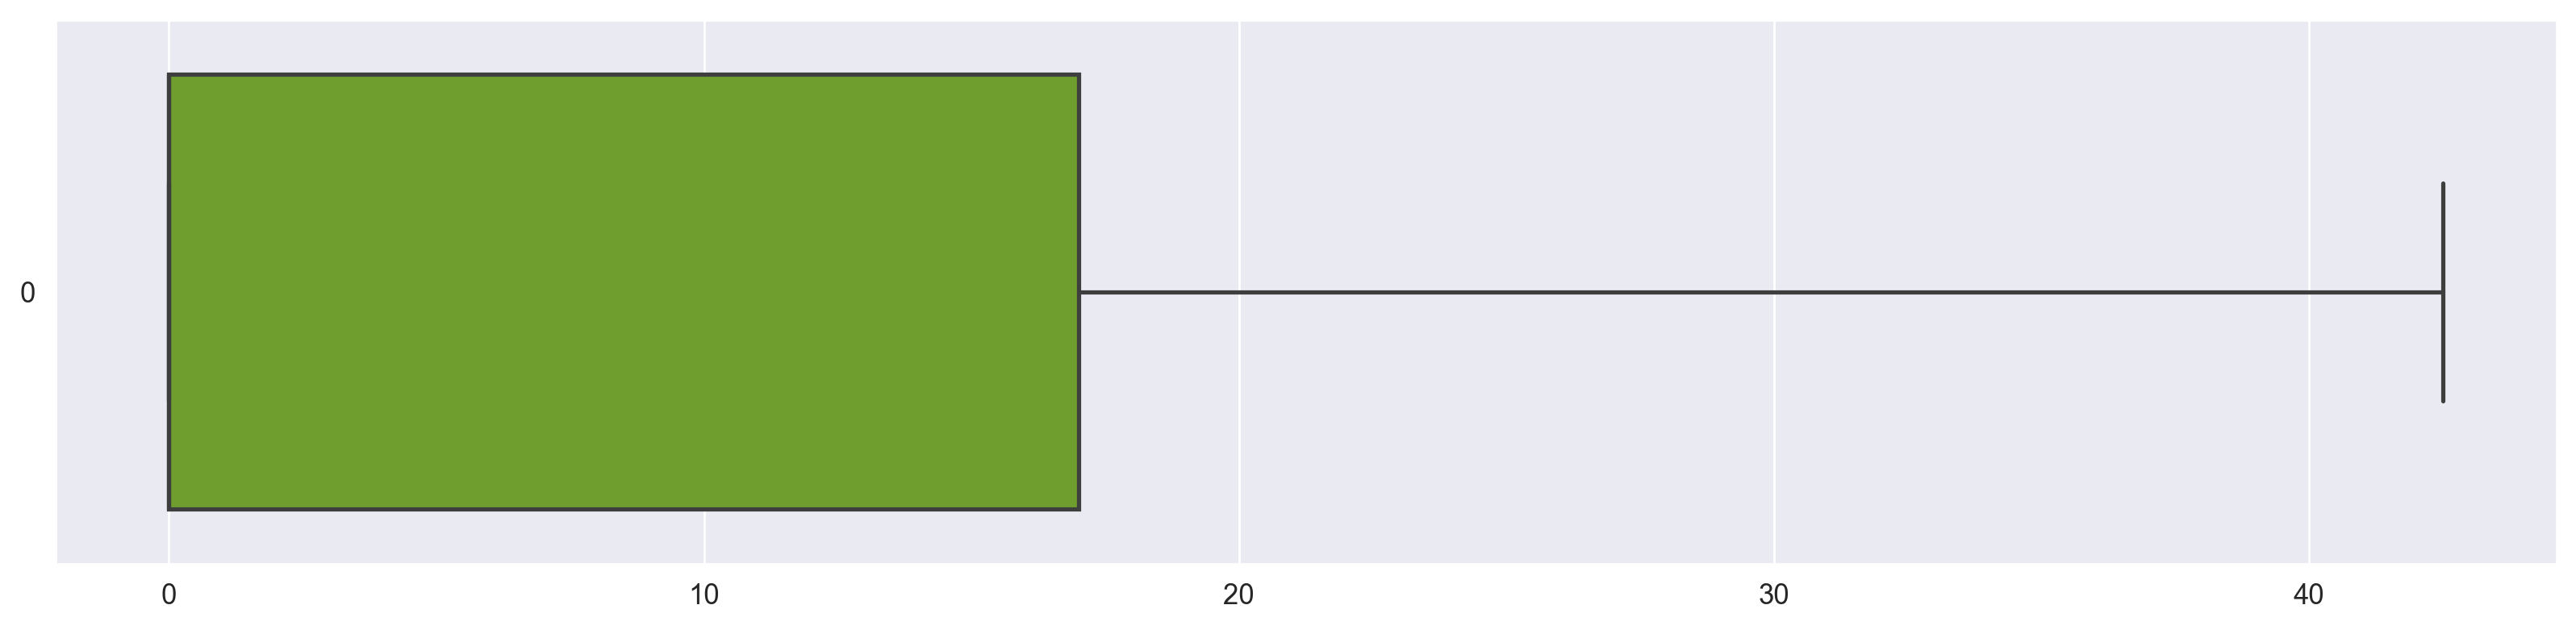

In [782]:
sns.boxplot(train_ot['voice.messages'], orient='h', color = '#72b01d')

#### Replacing Outlier In intl.mins Column

<AxesSubplot:>

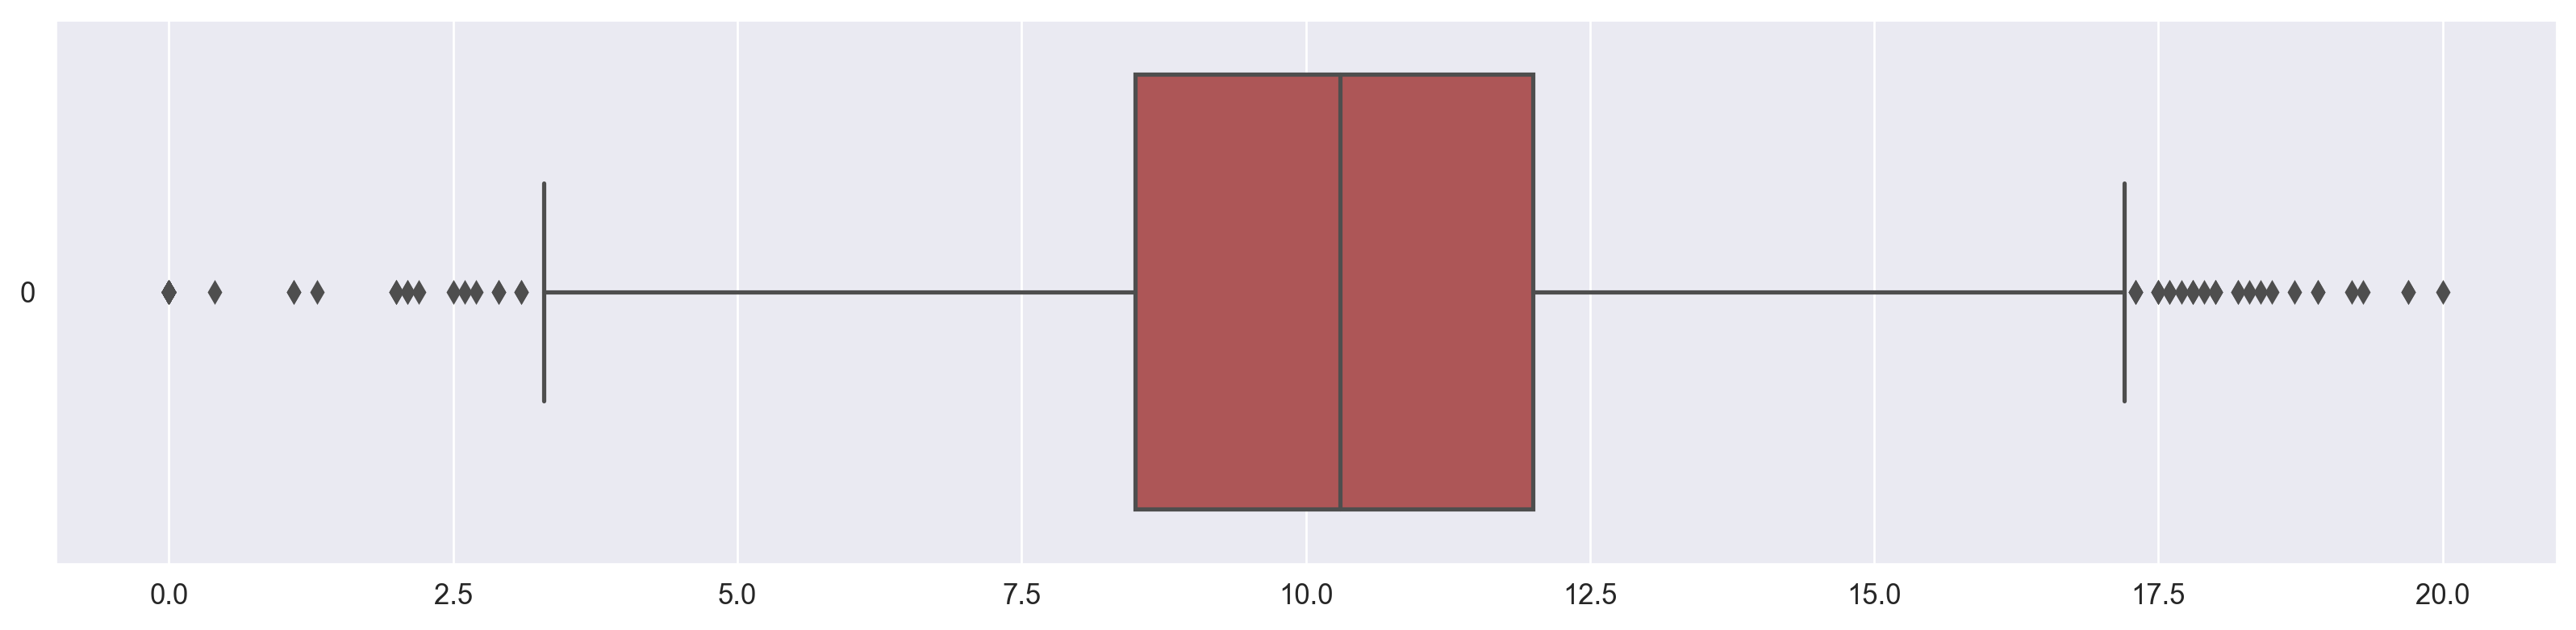

In [783]:
sns.boxplot(train_ot['intl.mins'], orient='h', color = '#bc4749')

In [784]:
replace_outlier_extream(train_ot, 'intl.mins')

<AxesSubplot:>

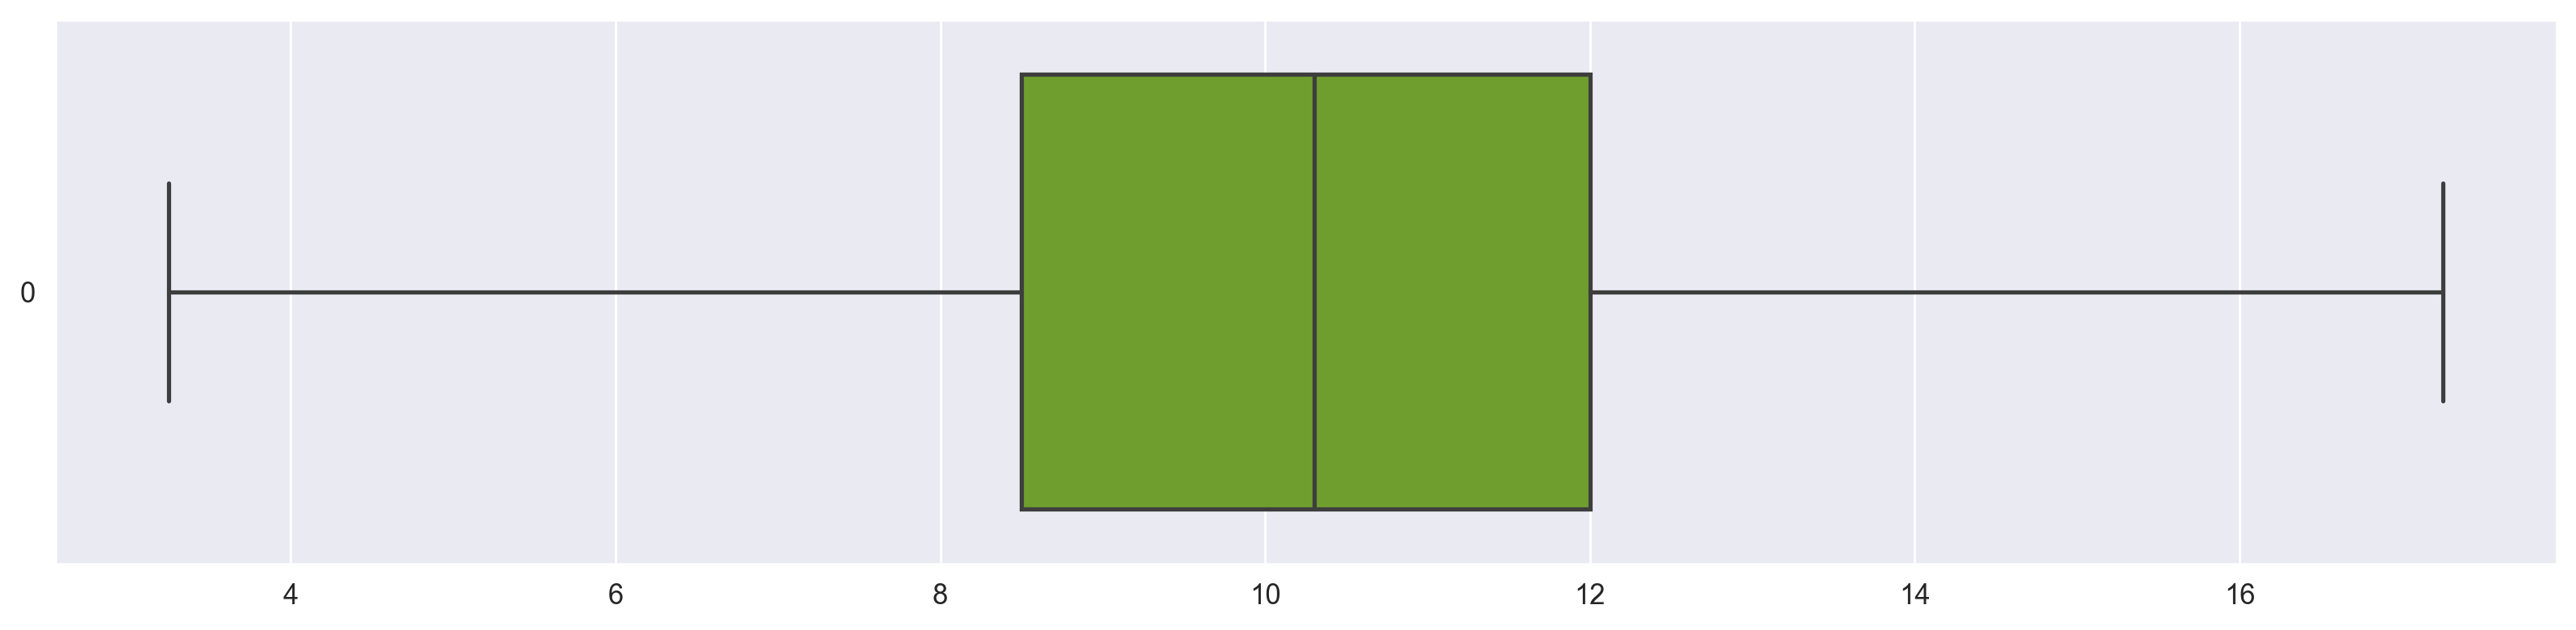

In [785]:
sns.boxplot(train_ot['intl.mins'], orient='h', color = '#72b01d')

#### Replacing Outlier In intl.calls Column

<AxesSubplot:>

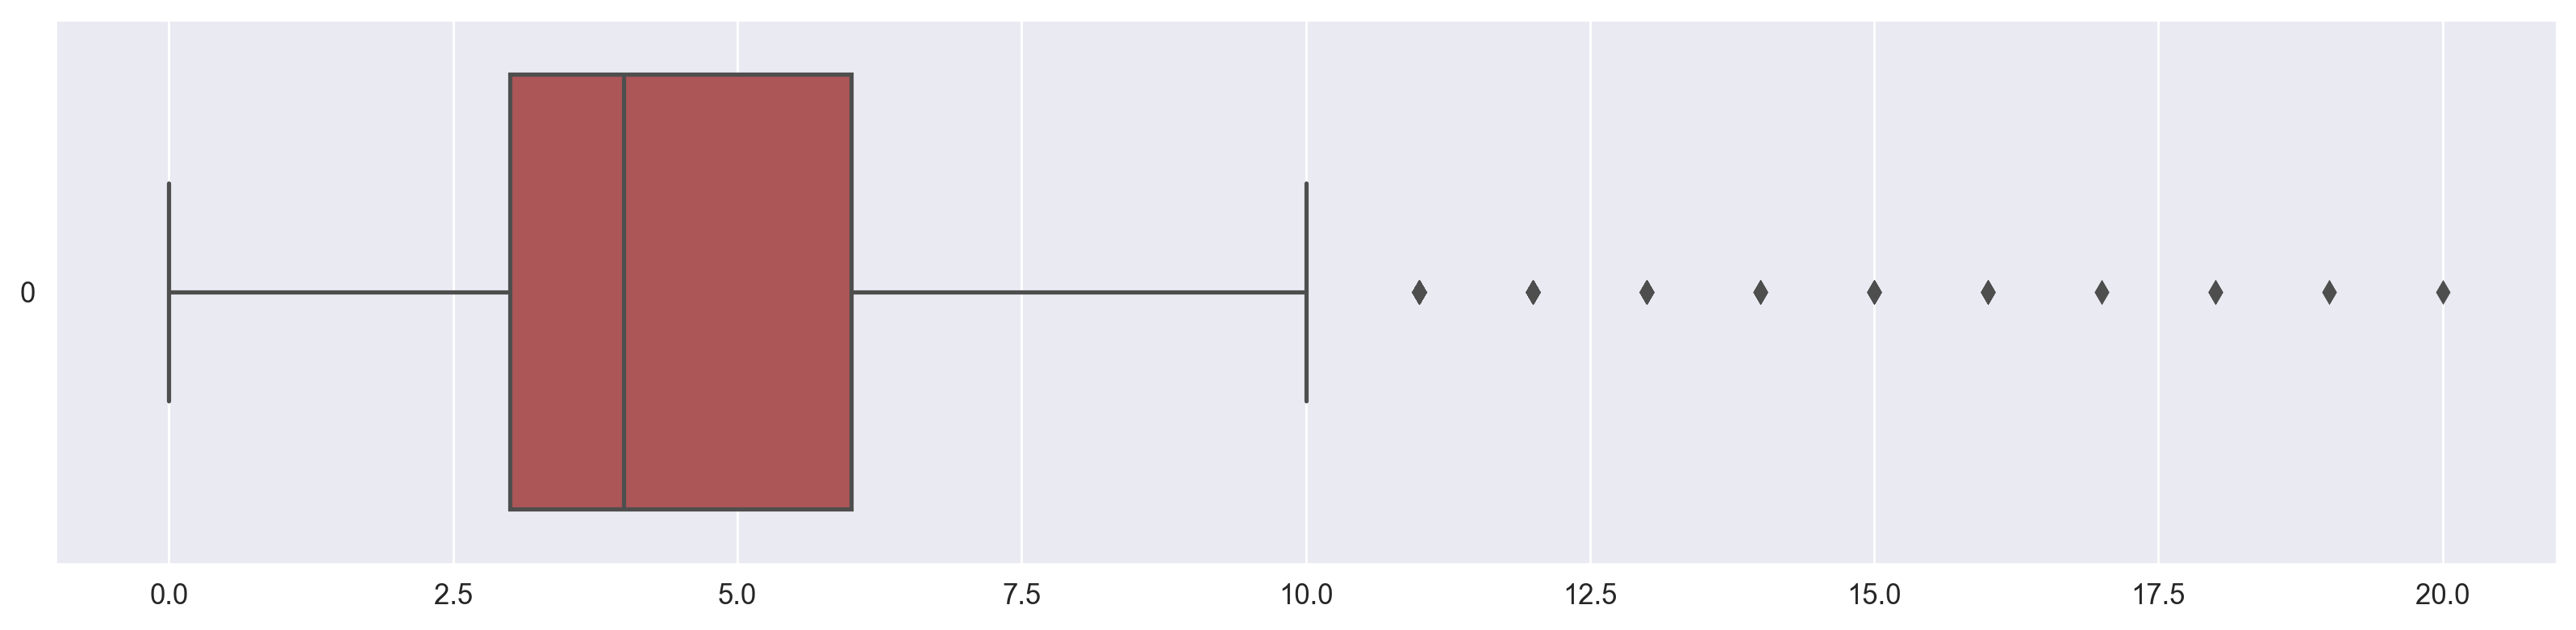

In [786]:
sns.boxplot(train_ot['intl.calls'], orient='h', color = '#bc4749')

In [787]:
replace_outlier_extream(train_ot, 'intl.calls')

<AxesSubplot:>

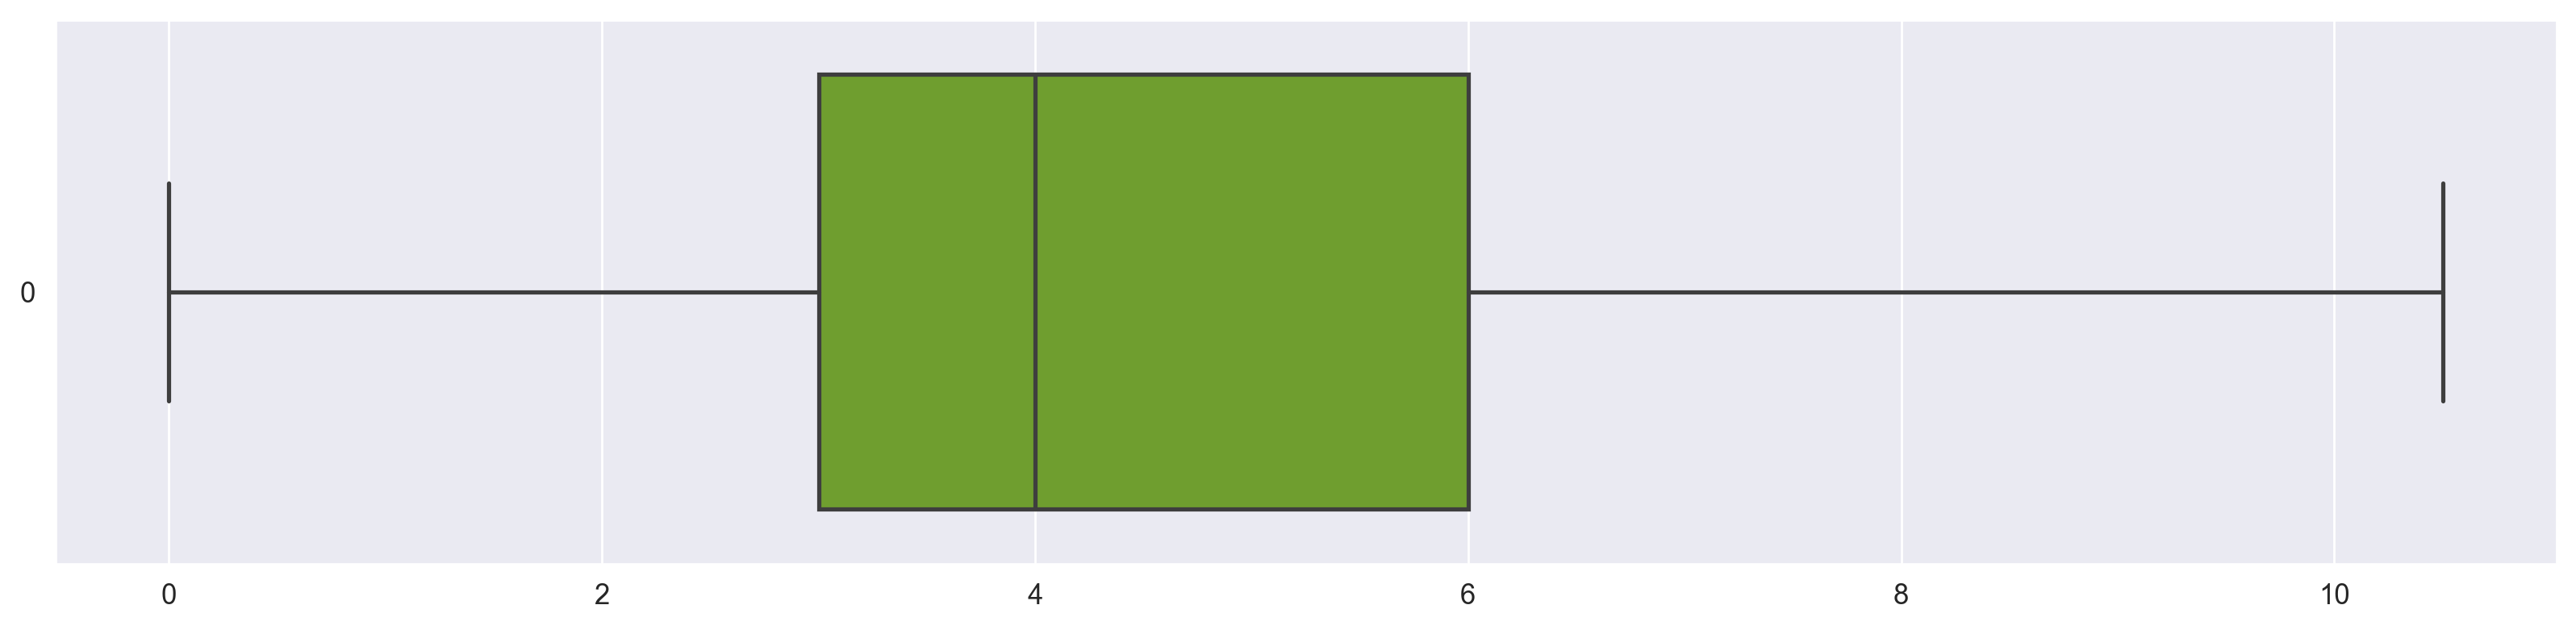

In [788]:
sns.boxplot(train_ot['intl.calls'], orient='h', color = '#72b01d')

#### Replacing Outlier In intl.trainarge Column

<AxesSubplot:>

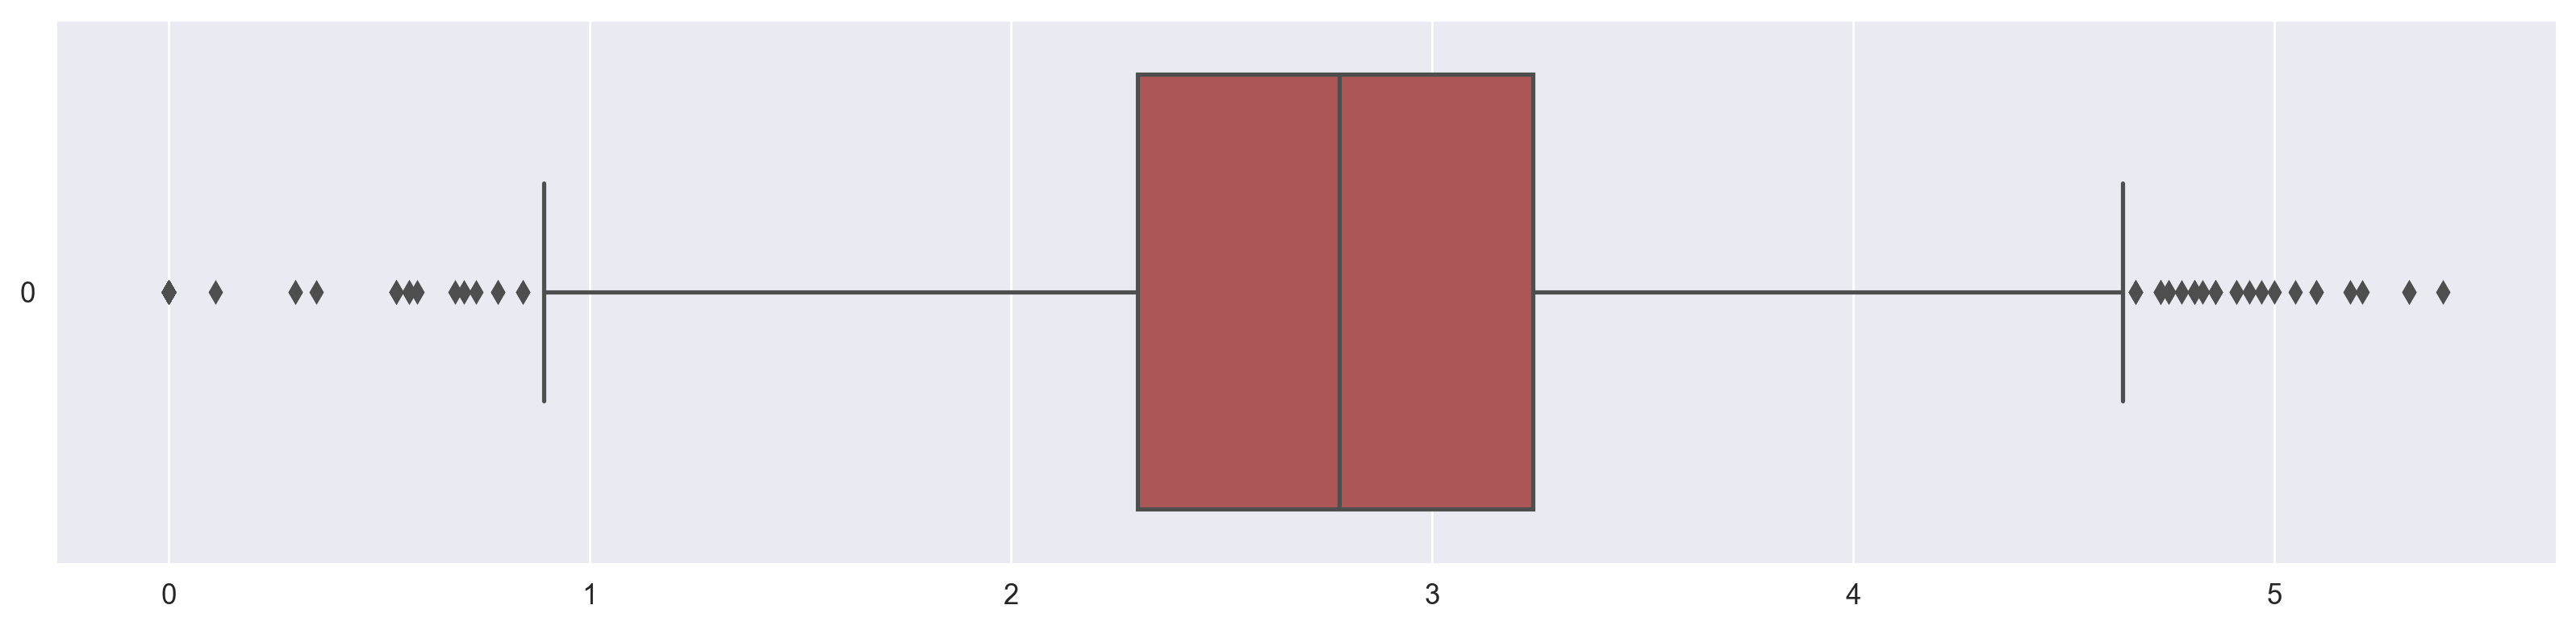

In [789]:
sns.boxplot(train_ot['intl.trainarge'], orient='h', color = '#bc4749')

In [790]:
replace_outlier_extream(train_ot, 'intl.trainarge')

<AxesSubplot:>

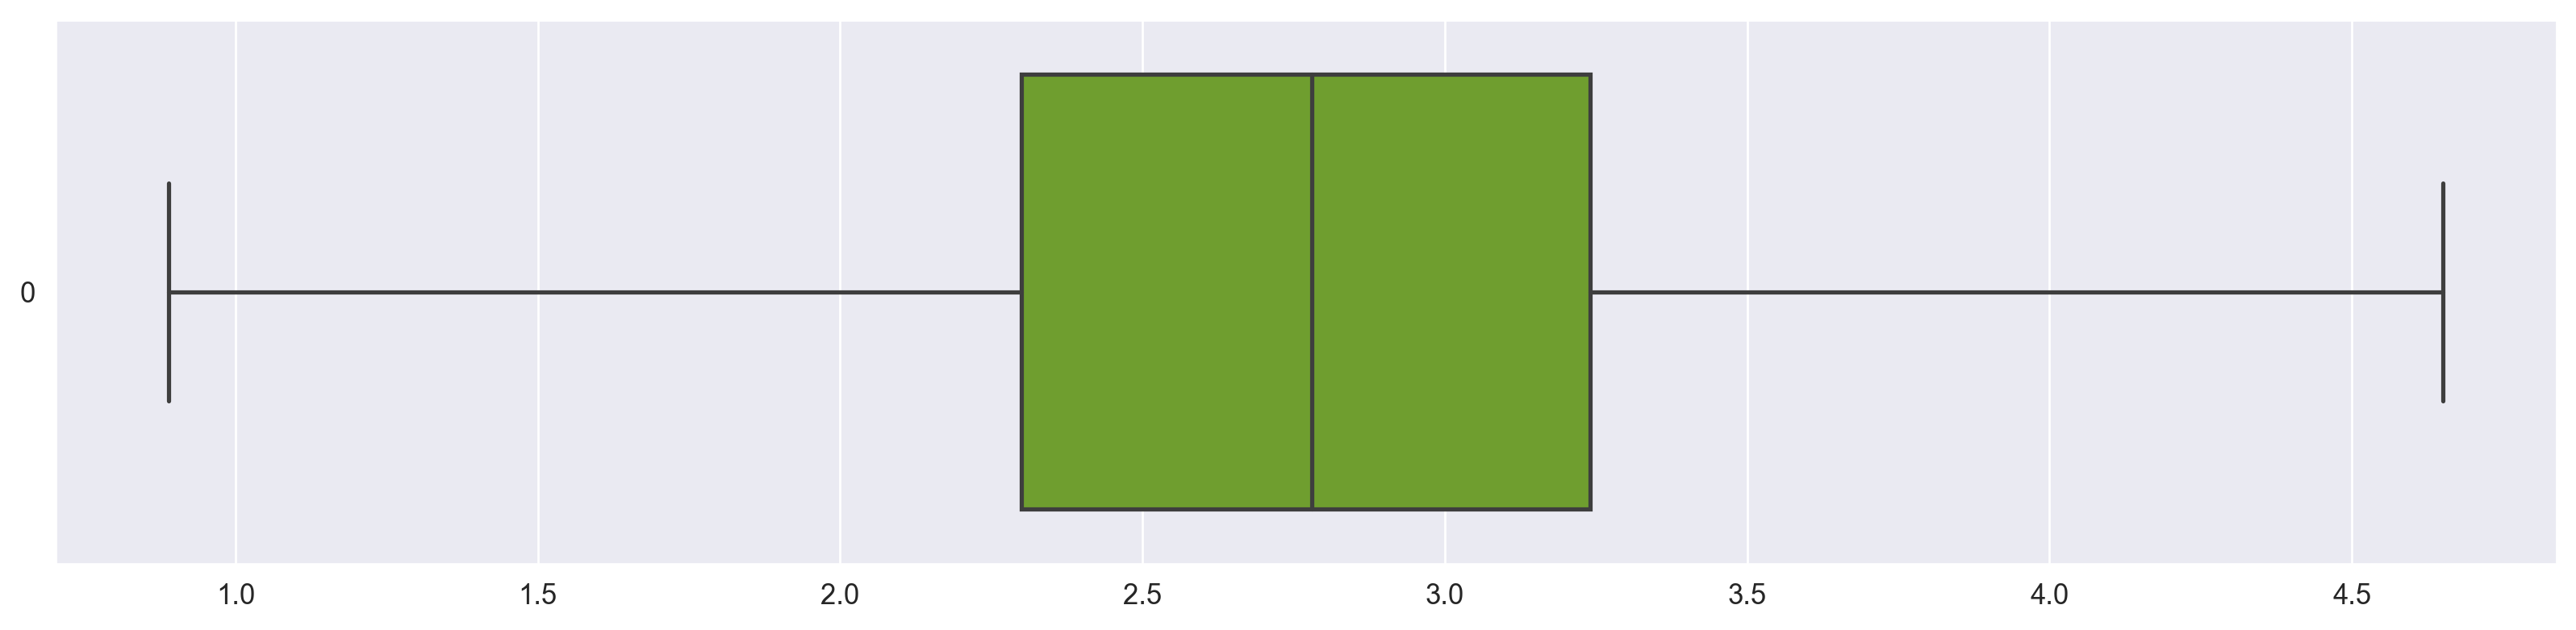

In [791]:
sns.boxplot(train_ot['intl.trainarge'], orient='h', color = '#72b01d')

#### Replacing Outlier In day.mins Column

<AxesSubplot:>

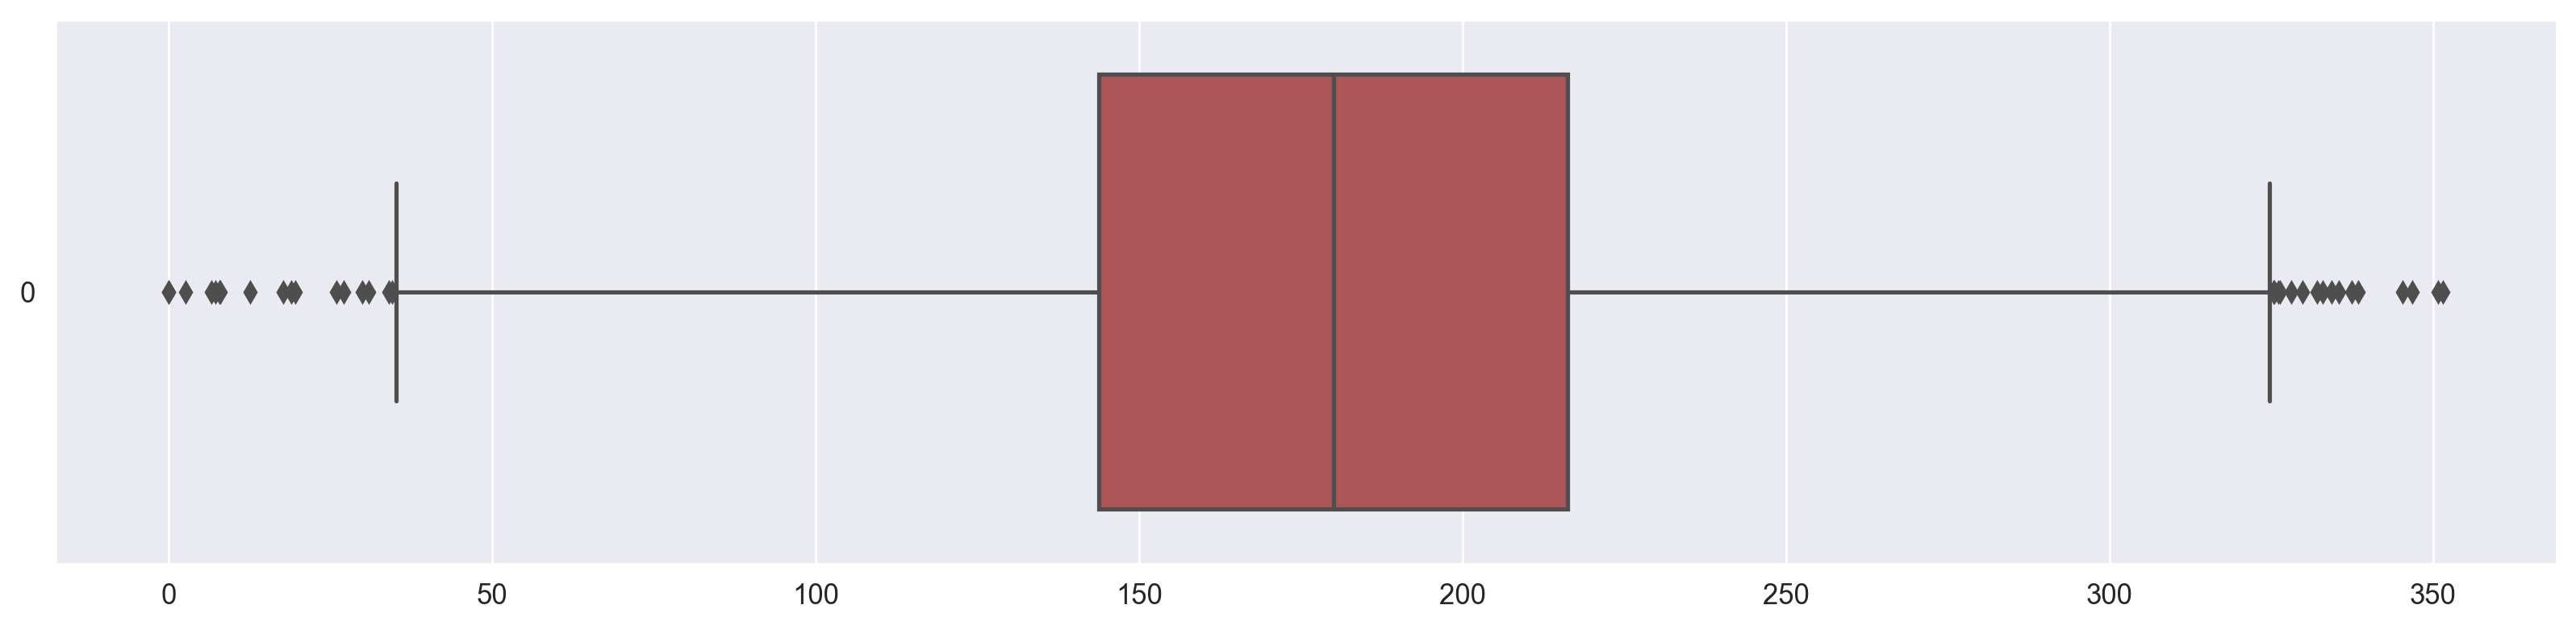

In [792]:
sns.boxplot(train_ot['day.mins'], orient='h', color = '#bc4749')

In [793]:
train_ot = remove_outlier(train_ot, 'day.mins')

<AxesSubplot:>

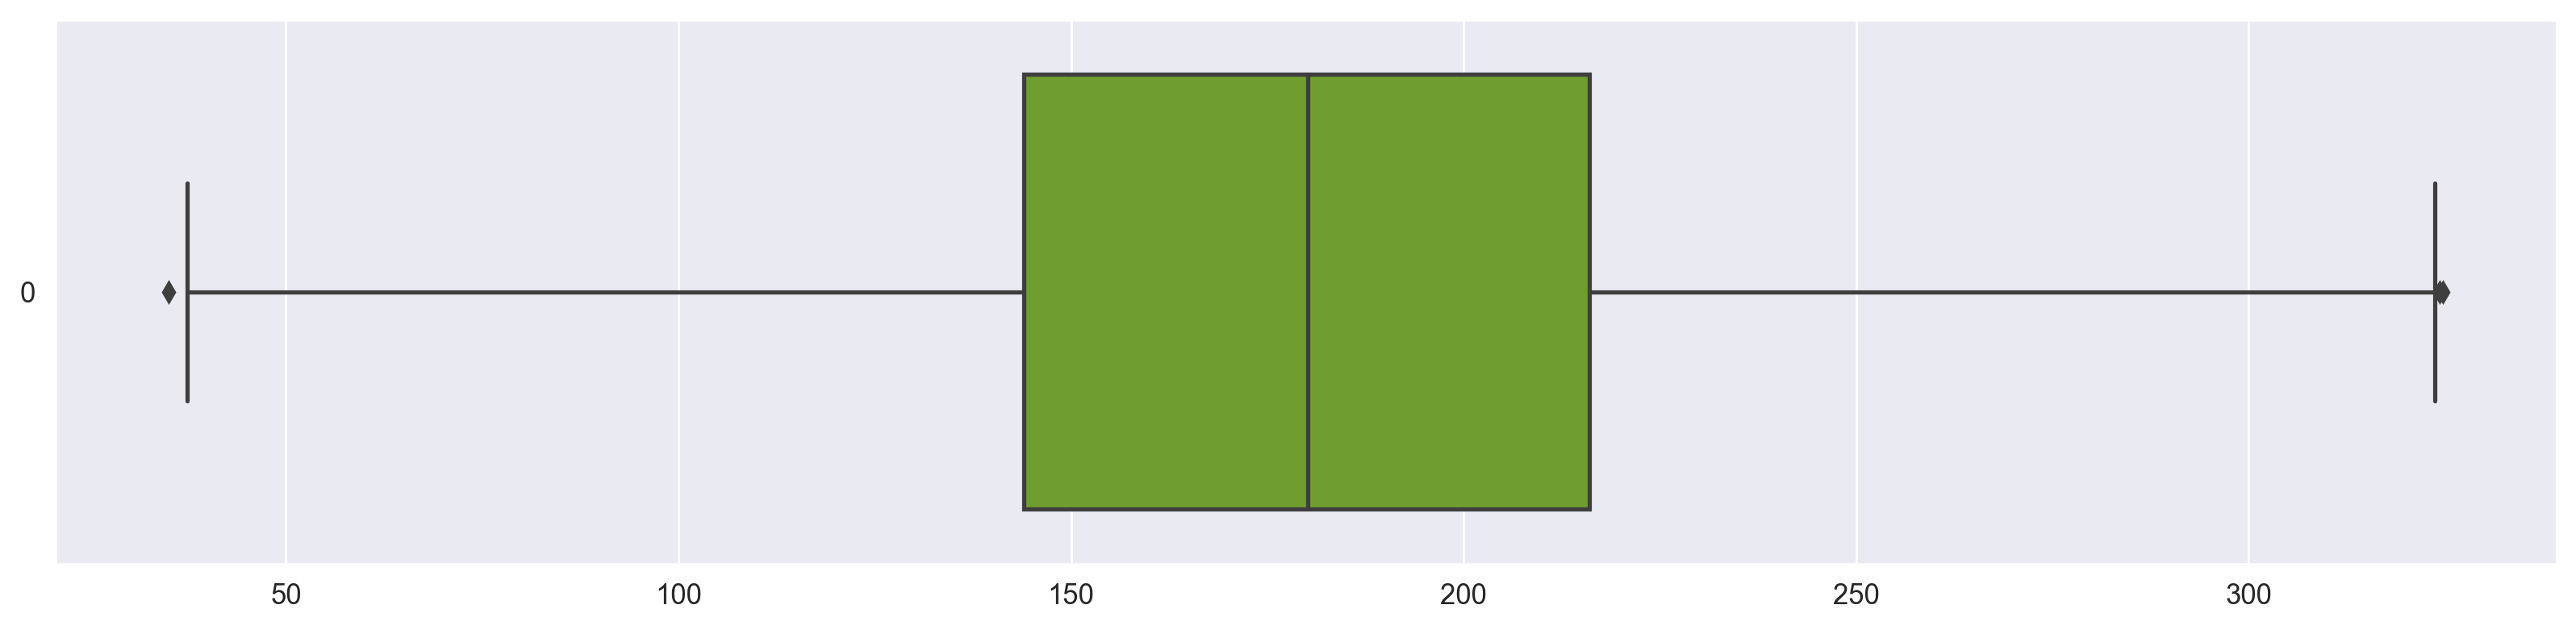

In [794]:
sns.boxplot(train_ot['day.mins'], orient='h', color = '#72b01d')

#### Removing Outlier In day.calls Column

<AxesSubplot:>

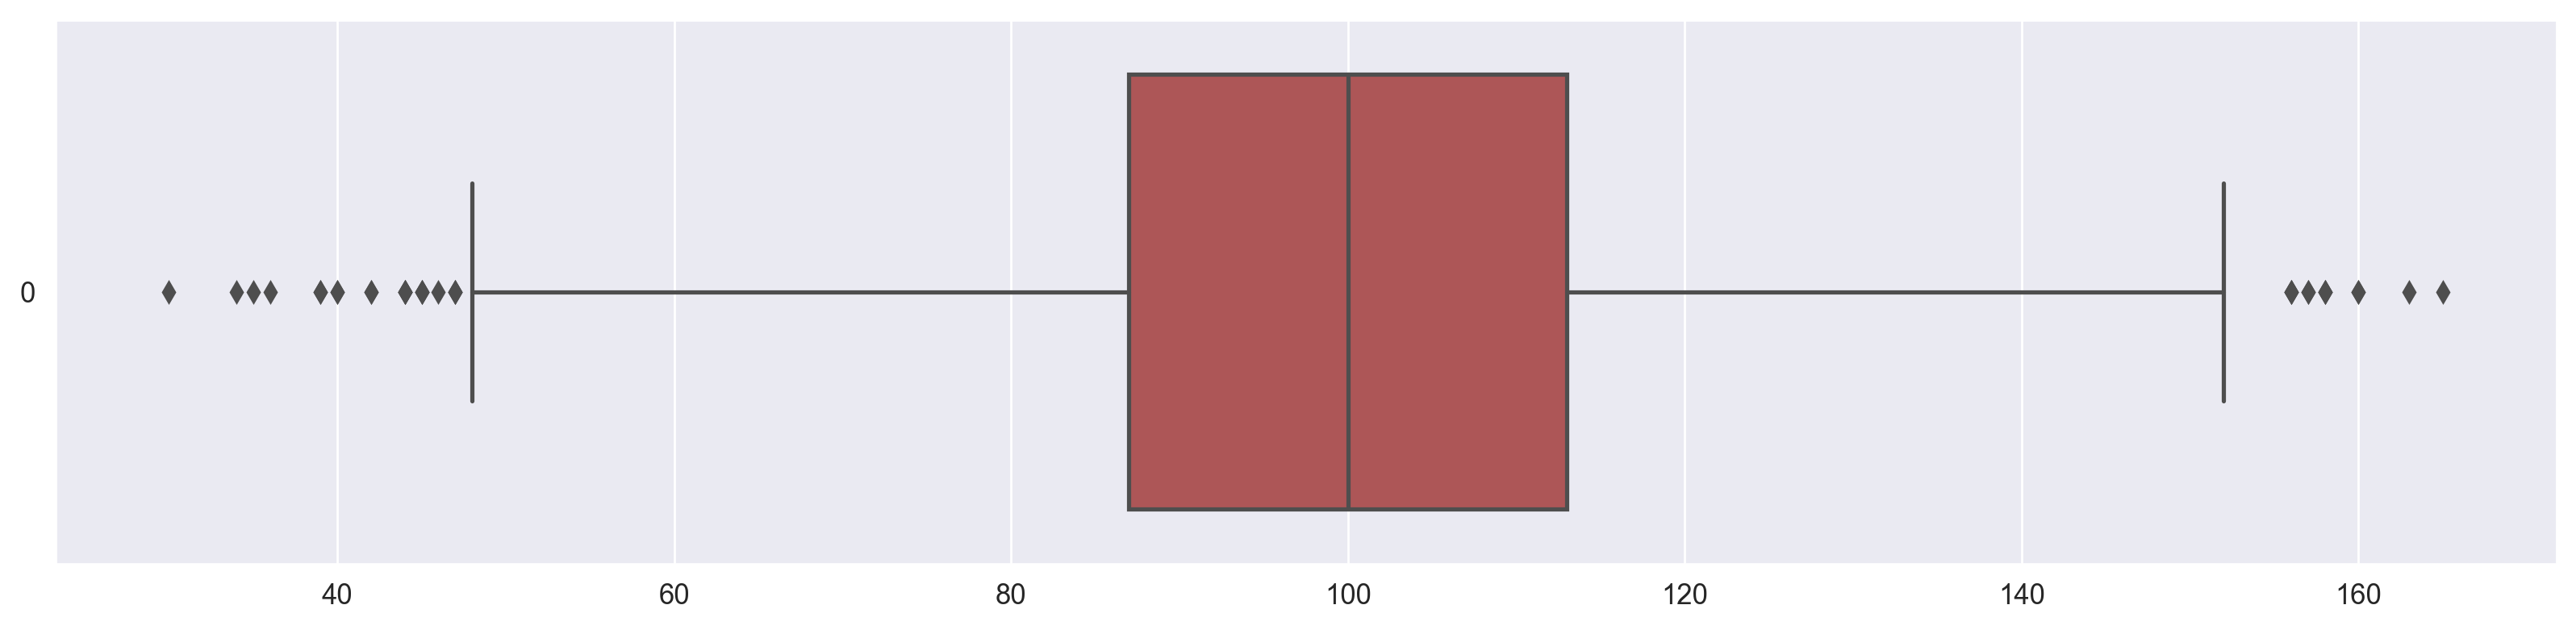

In [795]:
sns.boxplot(train_ot['day.calls'], orient='h', color = '#bc4749')

In [796]:
train_ot = remove_outlier(train_ot, 'day.calls')

<AxesSubplot:>

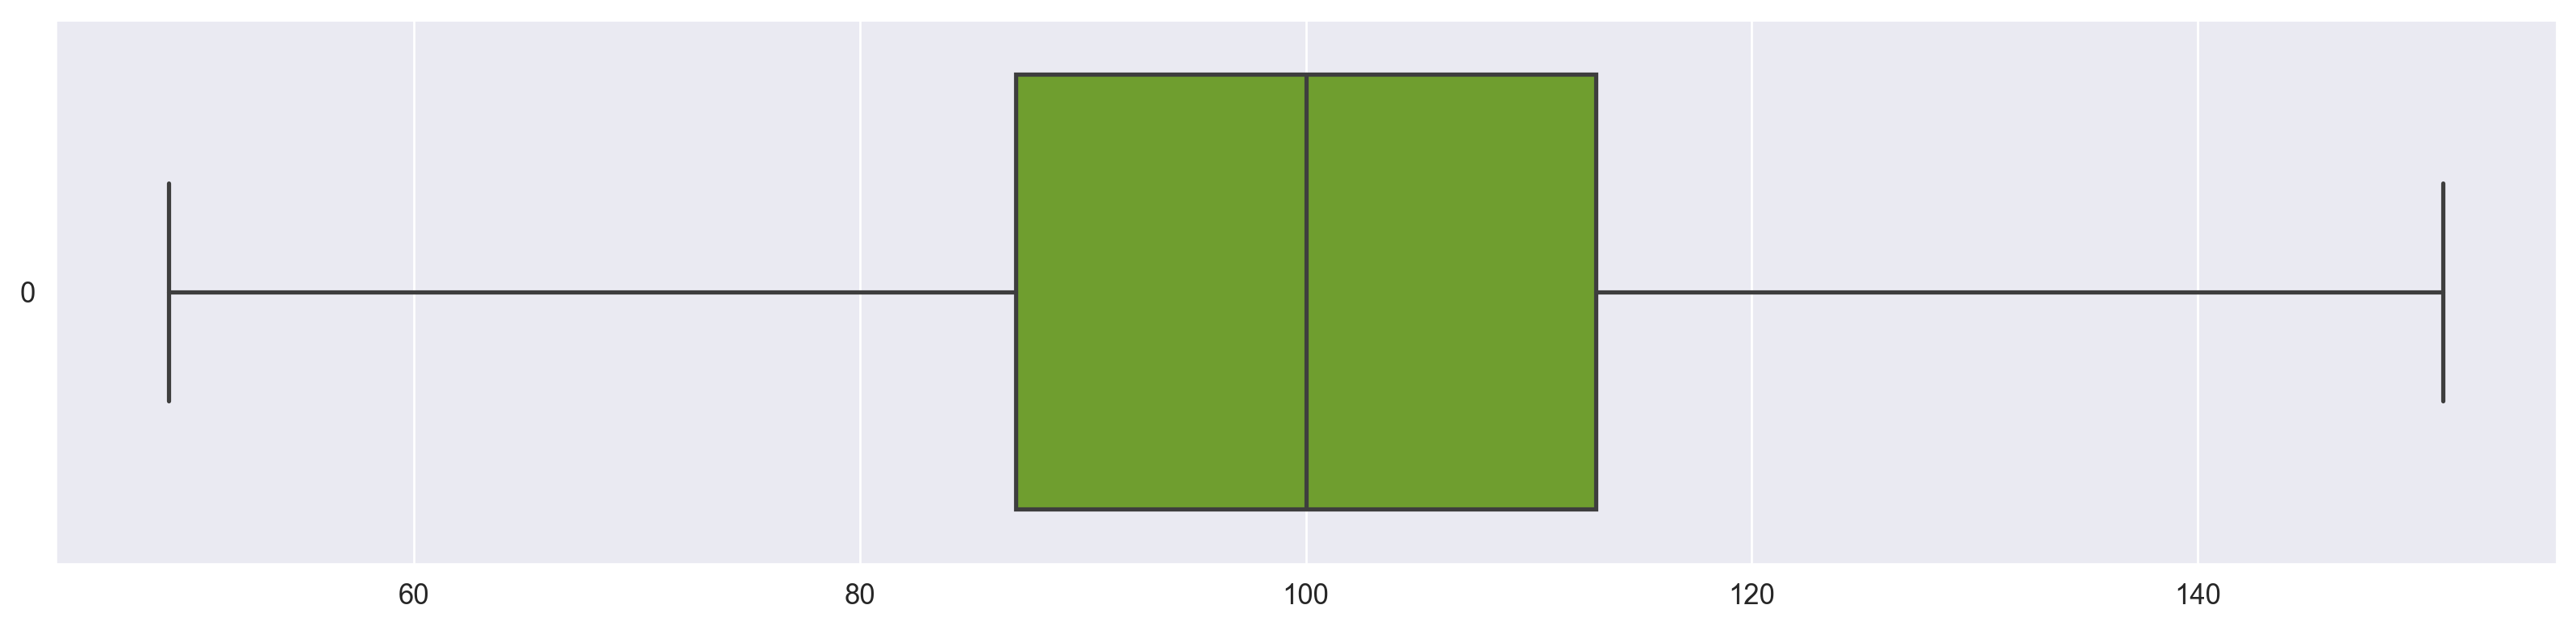

In [797]:
sns.boxplot(train_ot['day.calls'], orient='h', color = '#72b01d')

#### Replacing Outlier In day.trainarge Column

<AxesSubplot:>

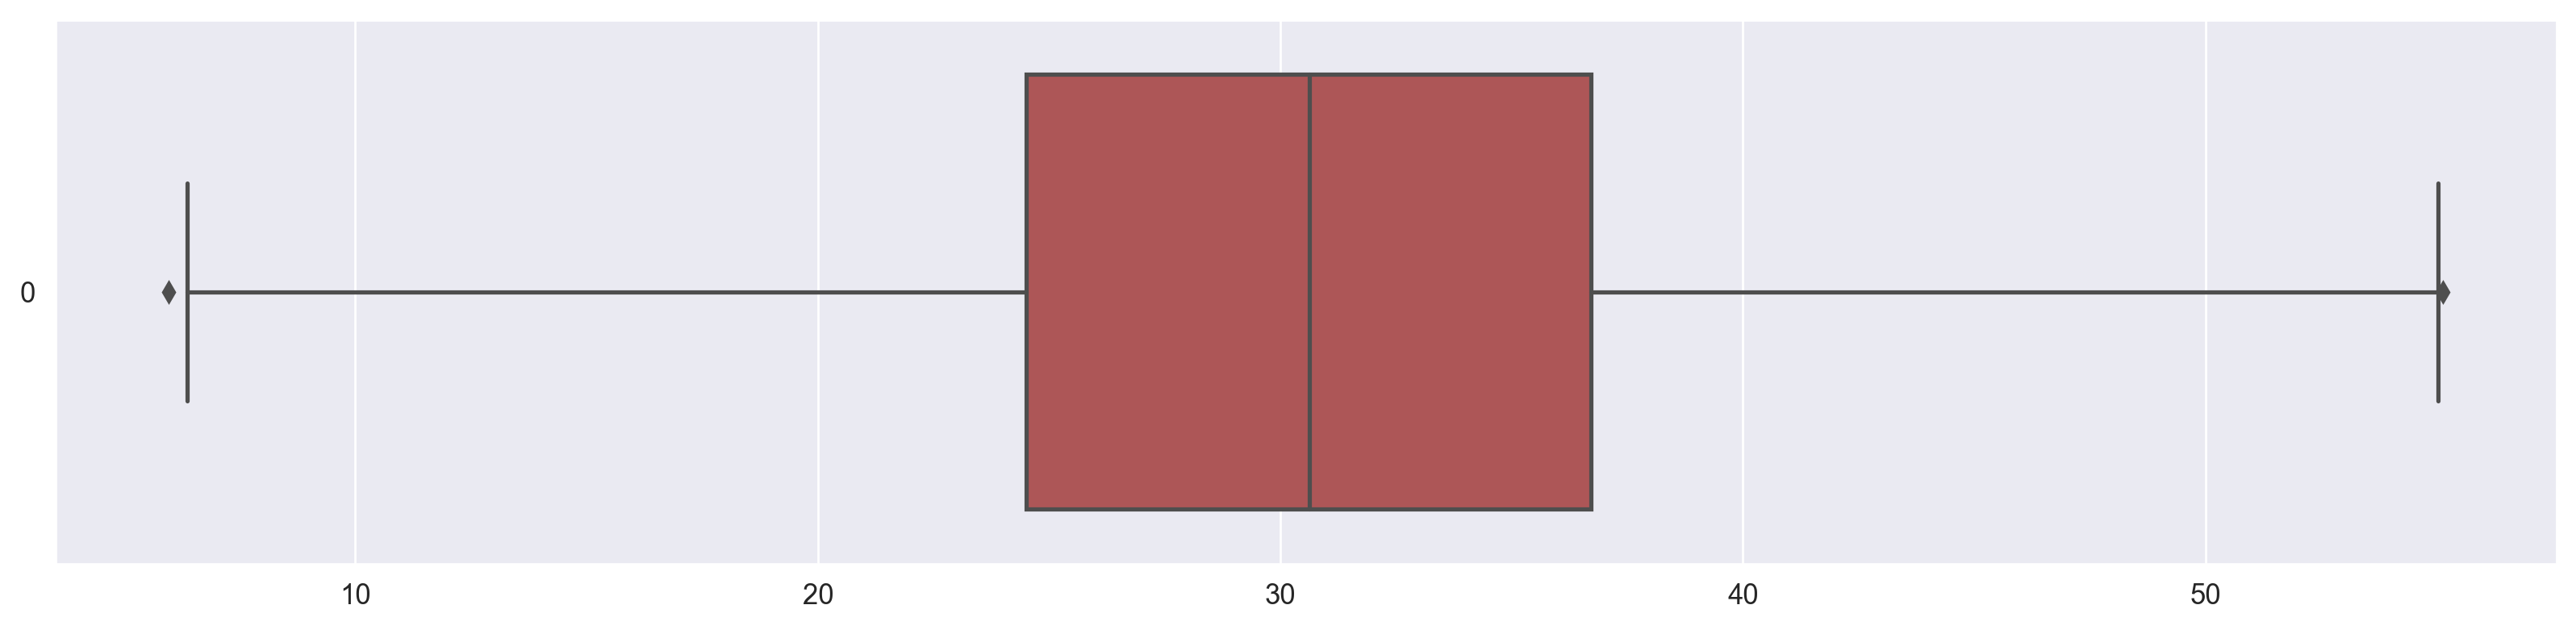

In [798]:
sns.boxplot(train_ot['day.trainarge'], orient='h', color = '#bc4749')

In [799]:
train_ot = remove_outlier(train_ot, 'day.trainarge')

<AxesSubplot:>

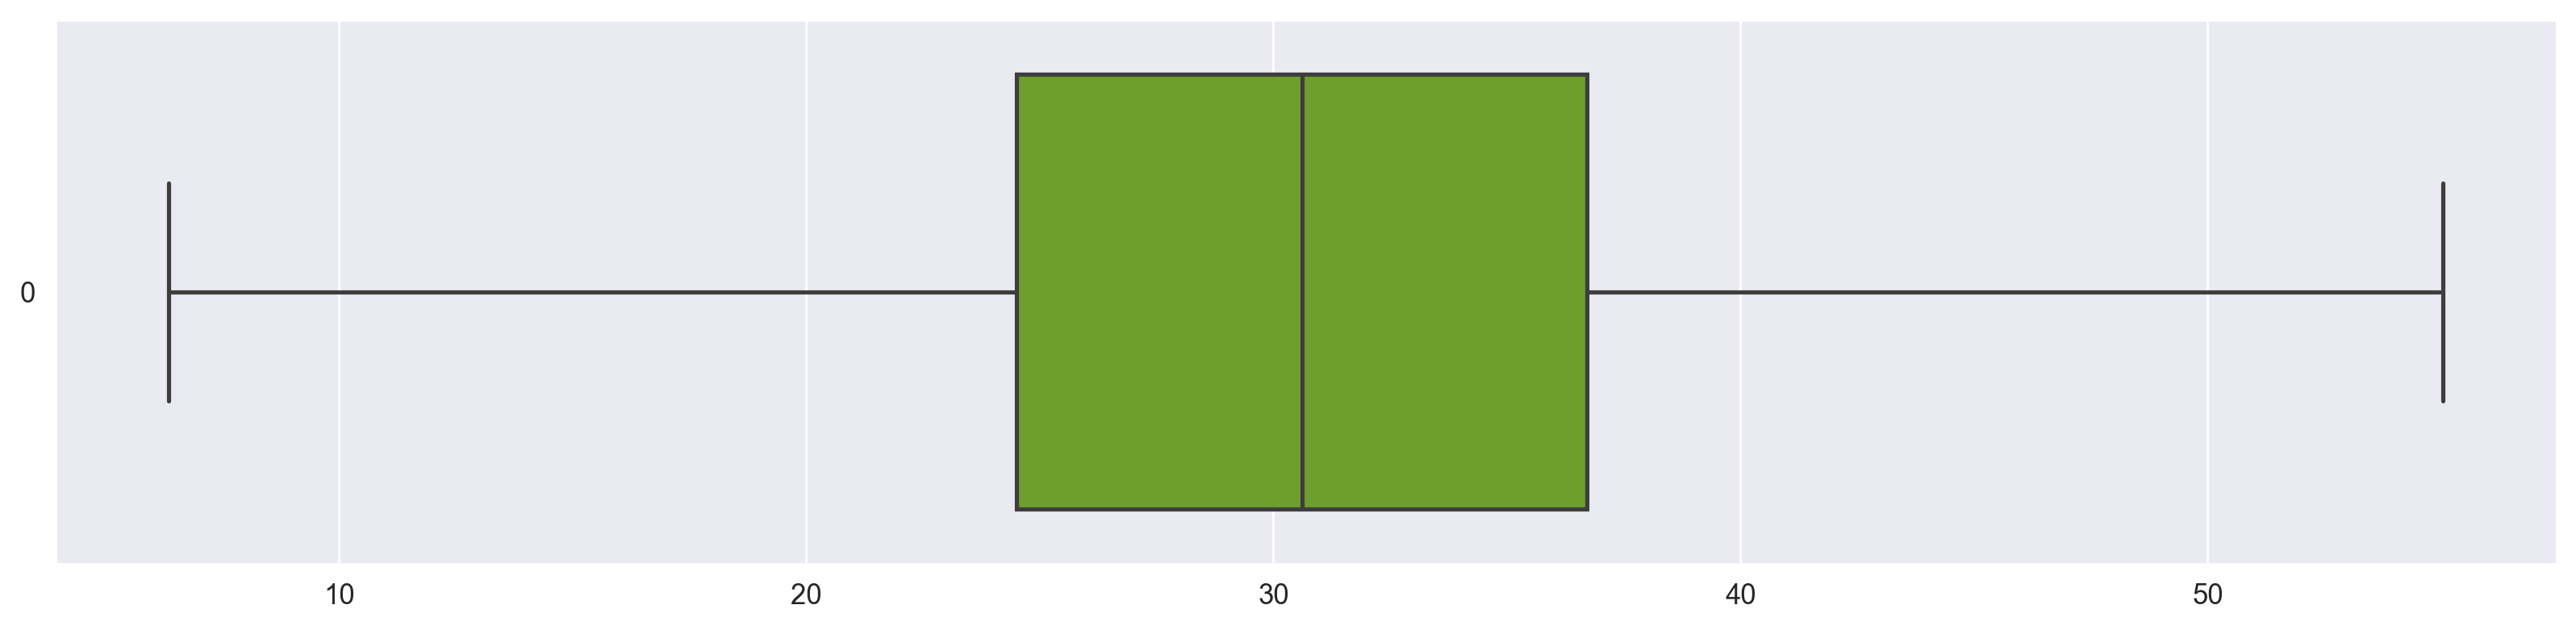

In [800]:
sns.boxplot(train_ot['day.trainarge'], orient='h', color = '#72b01d')

#### Replacing Outlier In eve.mins Column

<AxesSubplot:>

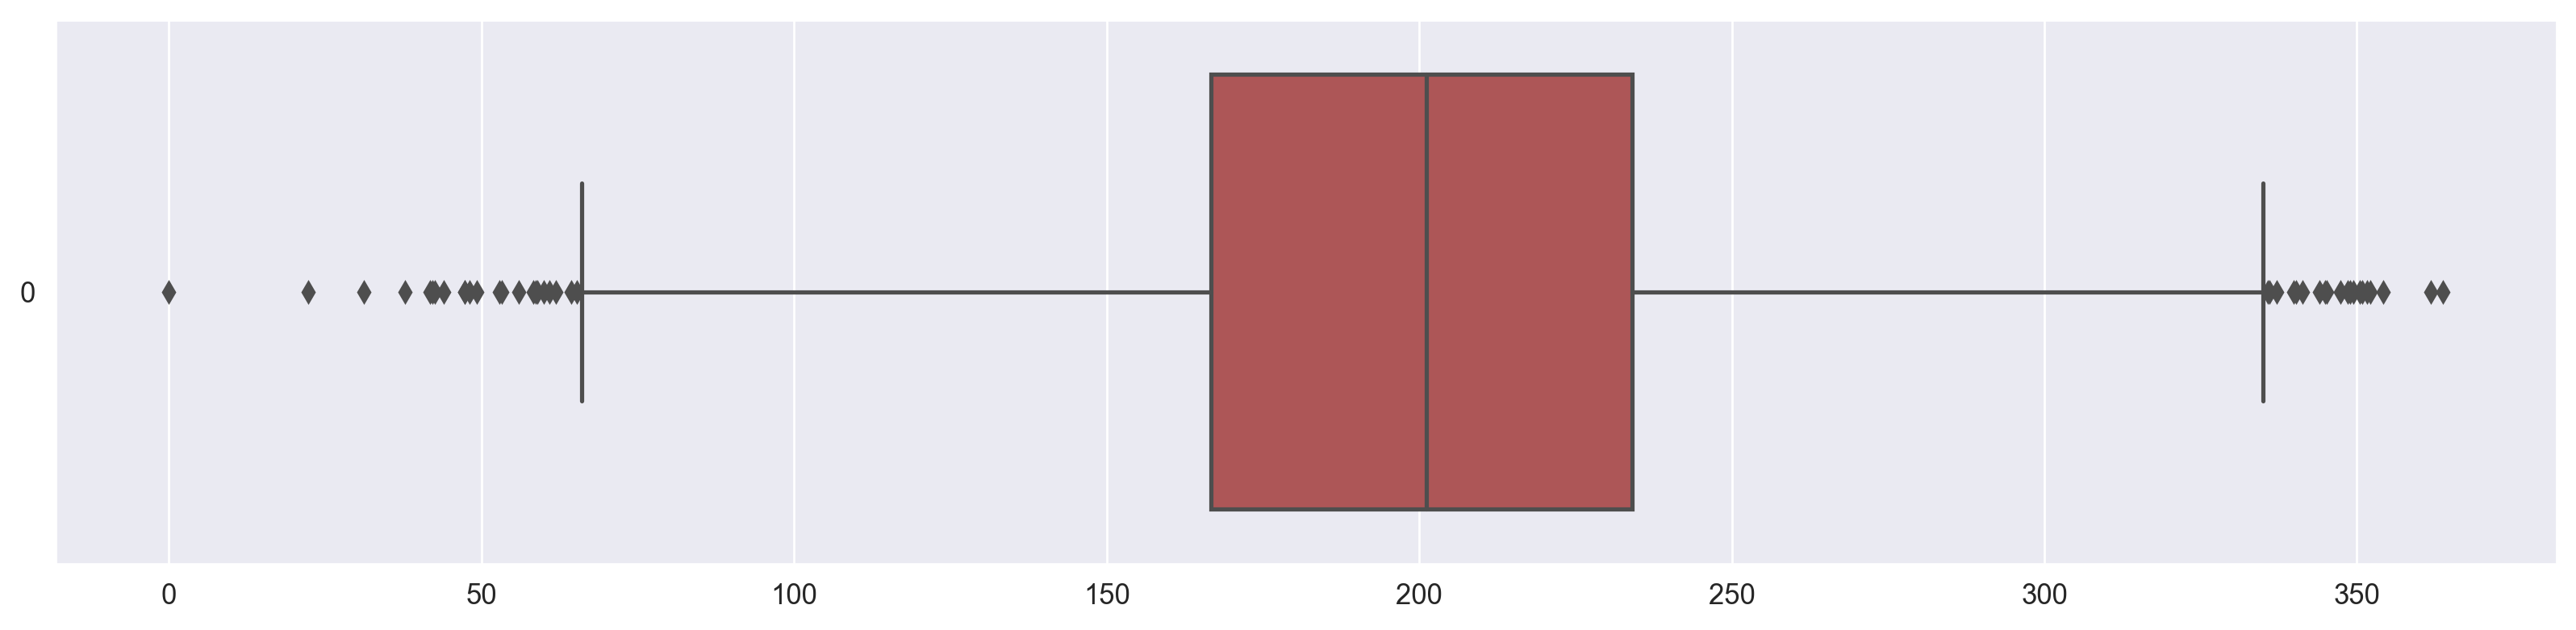

In [801]:
sns.boxplot(train_ot['eve.mins'], orient='h', color = '#bc4749')

In [802]:
replace_outlier_extream(train_ot, 'eve.mins')

<AxesSubplot:>

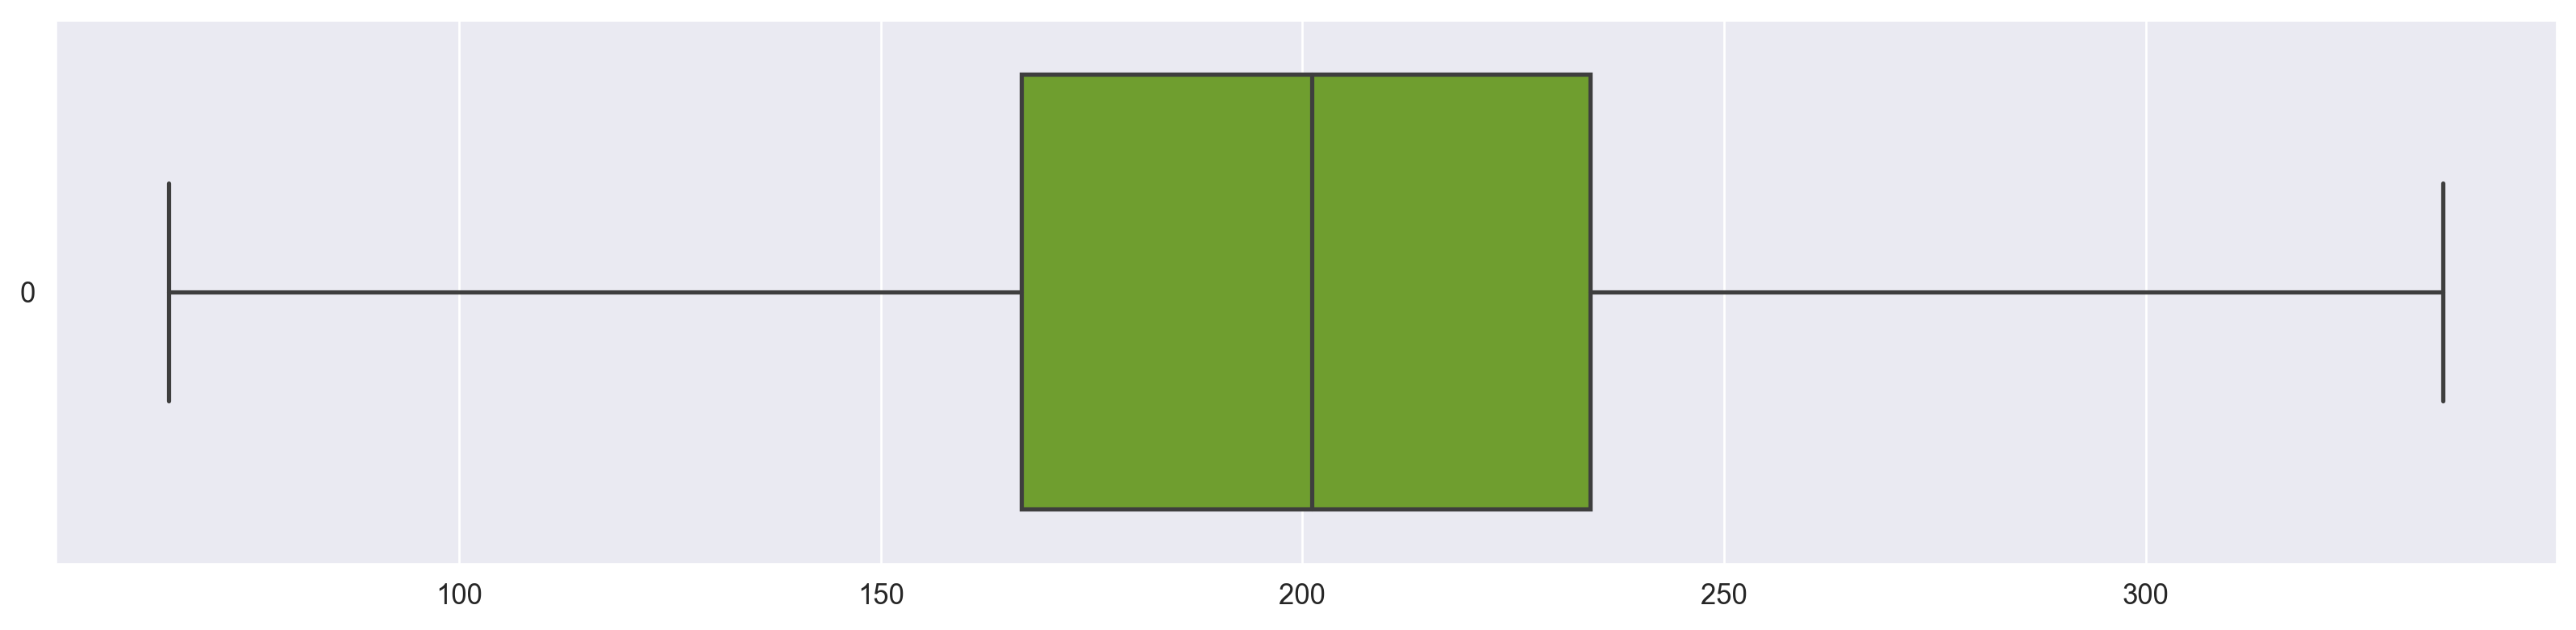

In [803]:
sns.boxplot(train_ot['eve.mins'], orient='h', color = '#72b01d')

#### Removing Outlier In eve.calls Column

<AxesSubplot:>

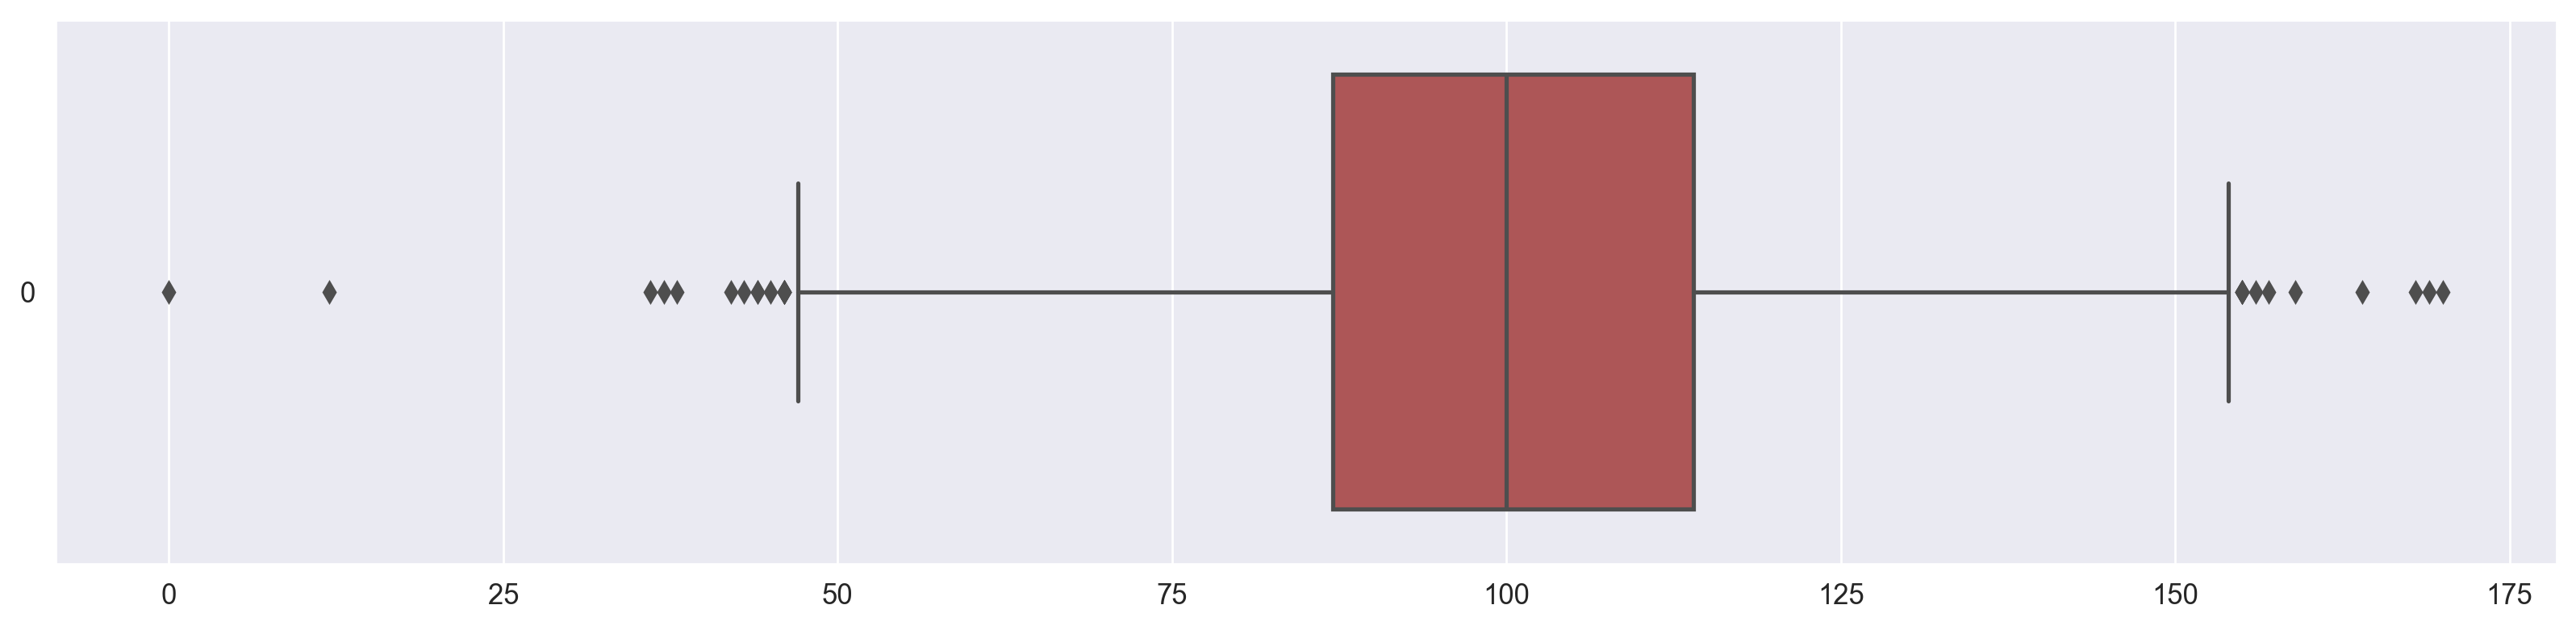

In [804]:
sns.boxplot(train_ot['eve.calls'], orient='h', color = '#bc4749')

In [805]:
replace_outlier_extream(train_ot, 'eve.calls')

<AxesSubplot:>

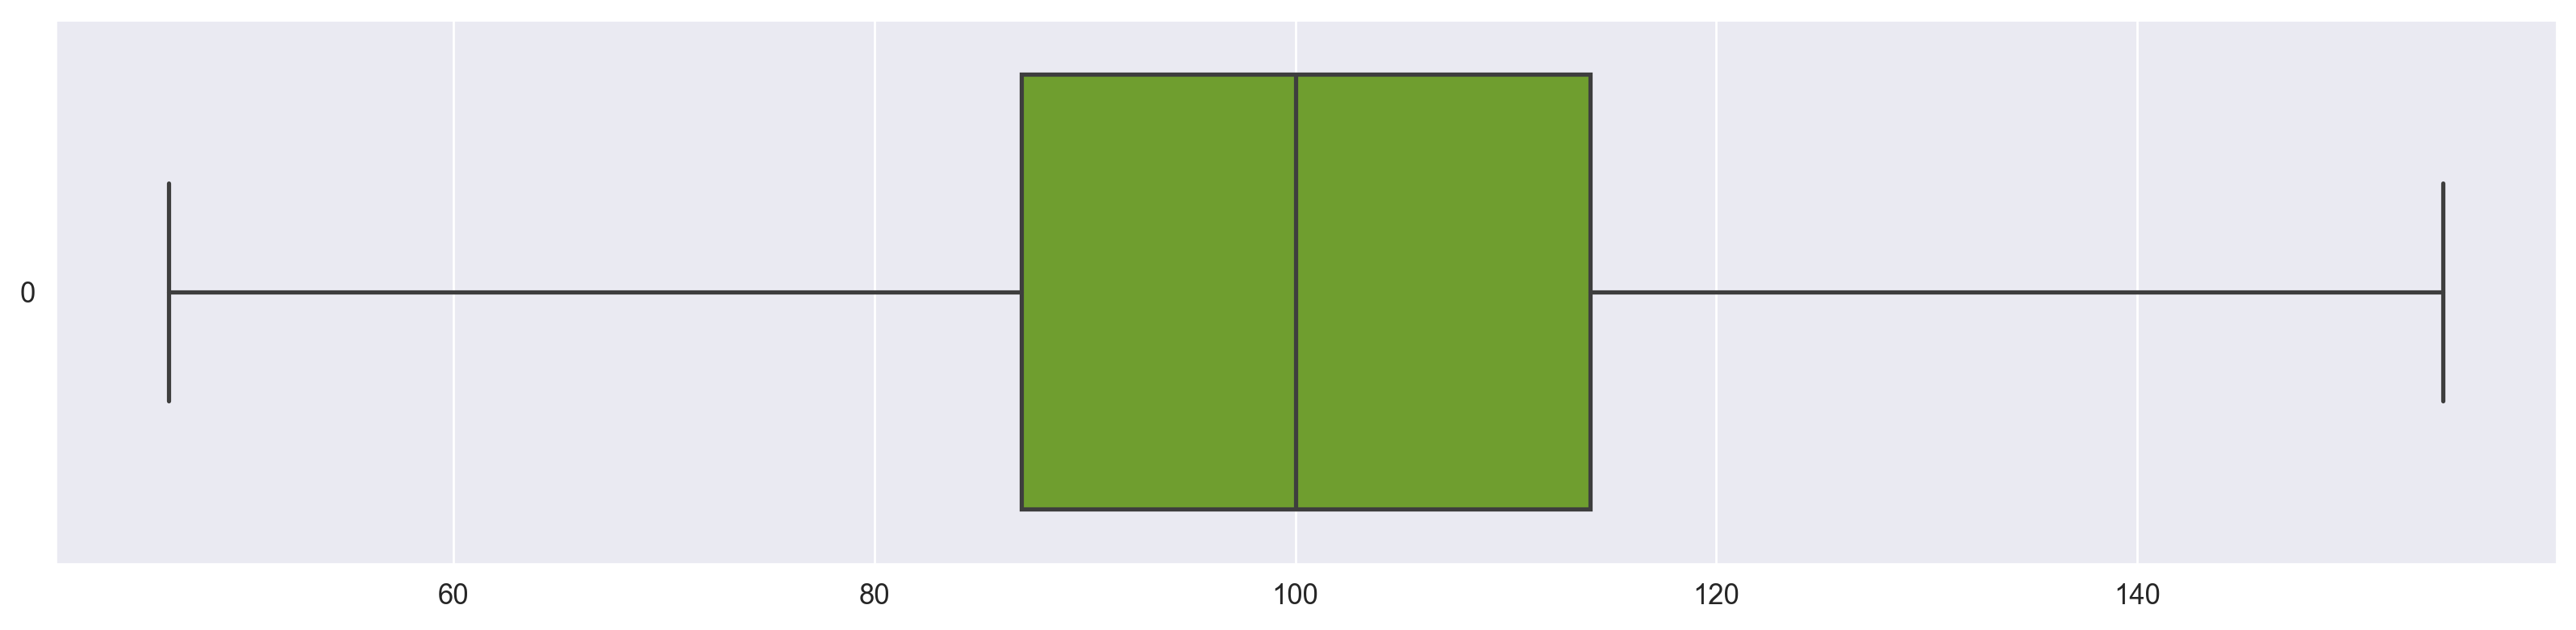

In [806]:
sns.boxplot(train_ot['eve.calls'], orient='h', color = '#72b01d')

#### Replacing Outlier In eve.trainarge Column

<AxesSubplot:>

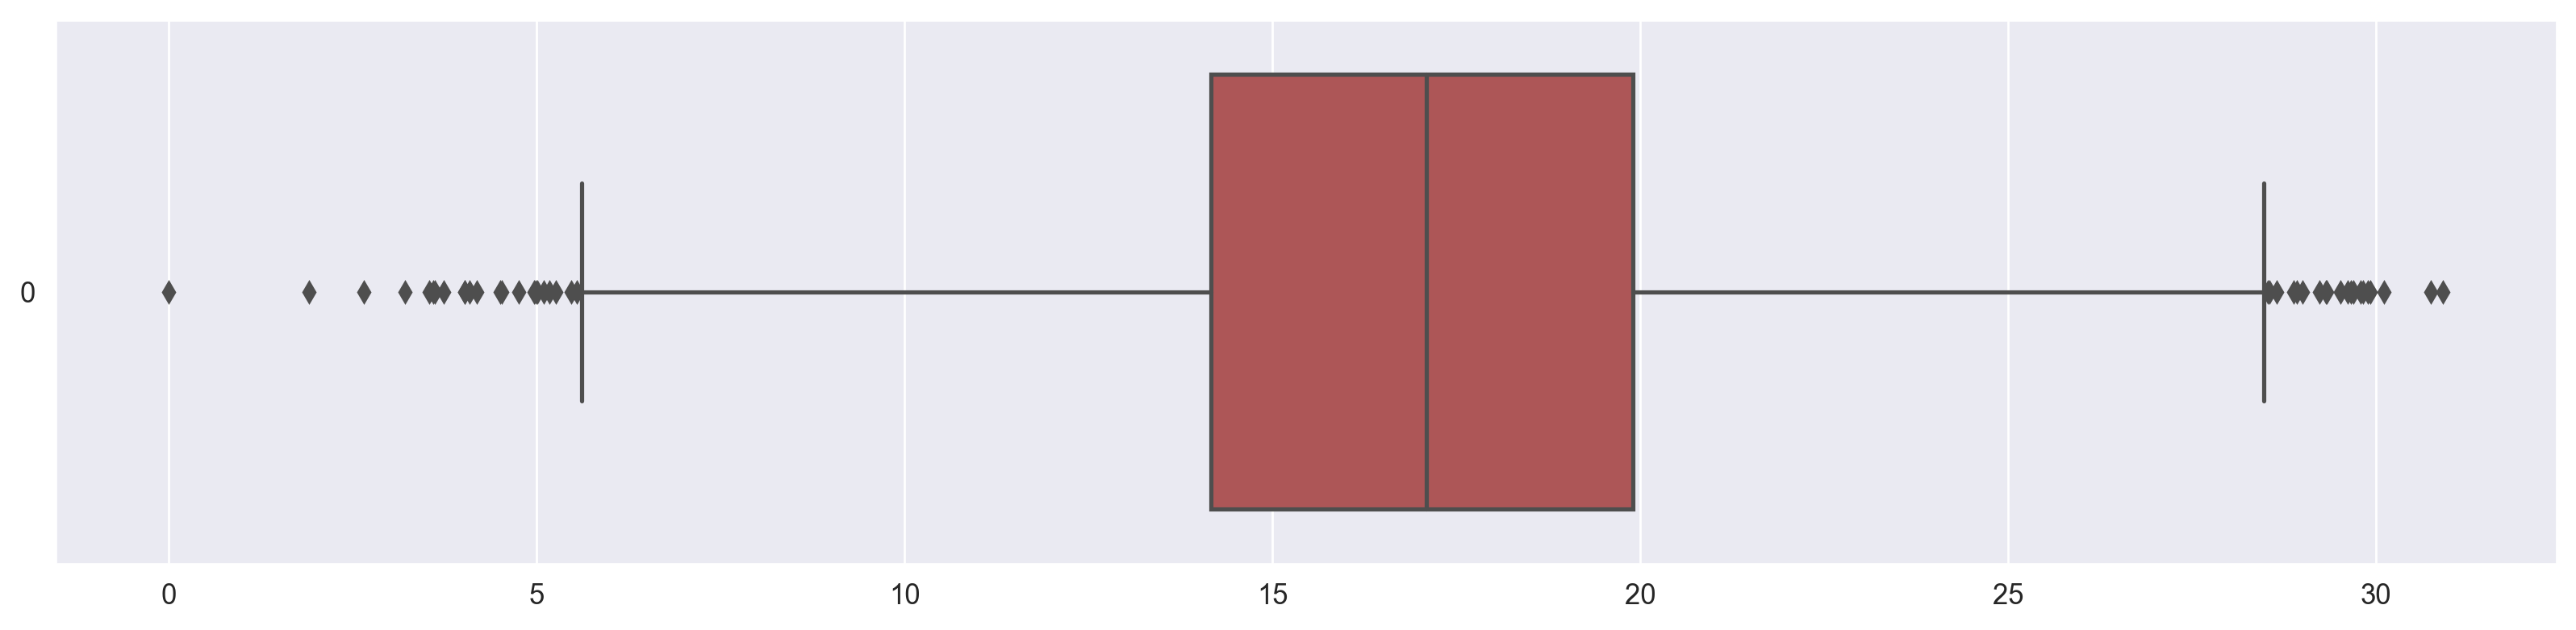

In [807]:
sns.boxplot(train_ot['eve.trainarge'], orient='h', color = '#bc4749')

In [808]:
replace_outlier_extream(train_ot, 'eve.trainarge')

<AxesSubplot:>

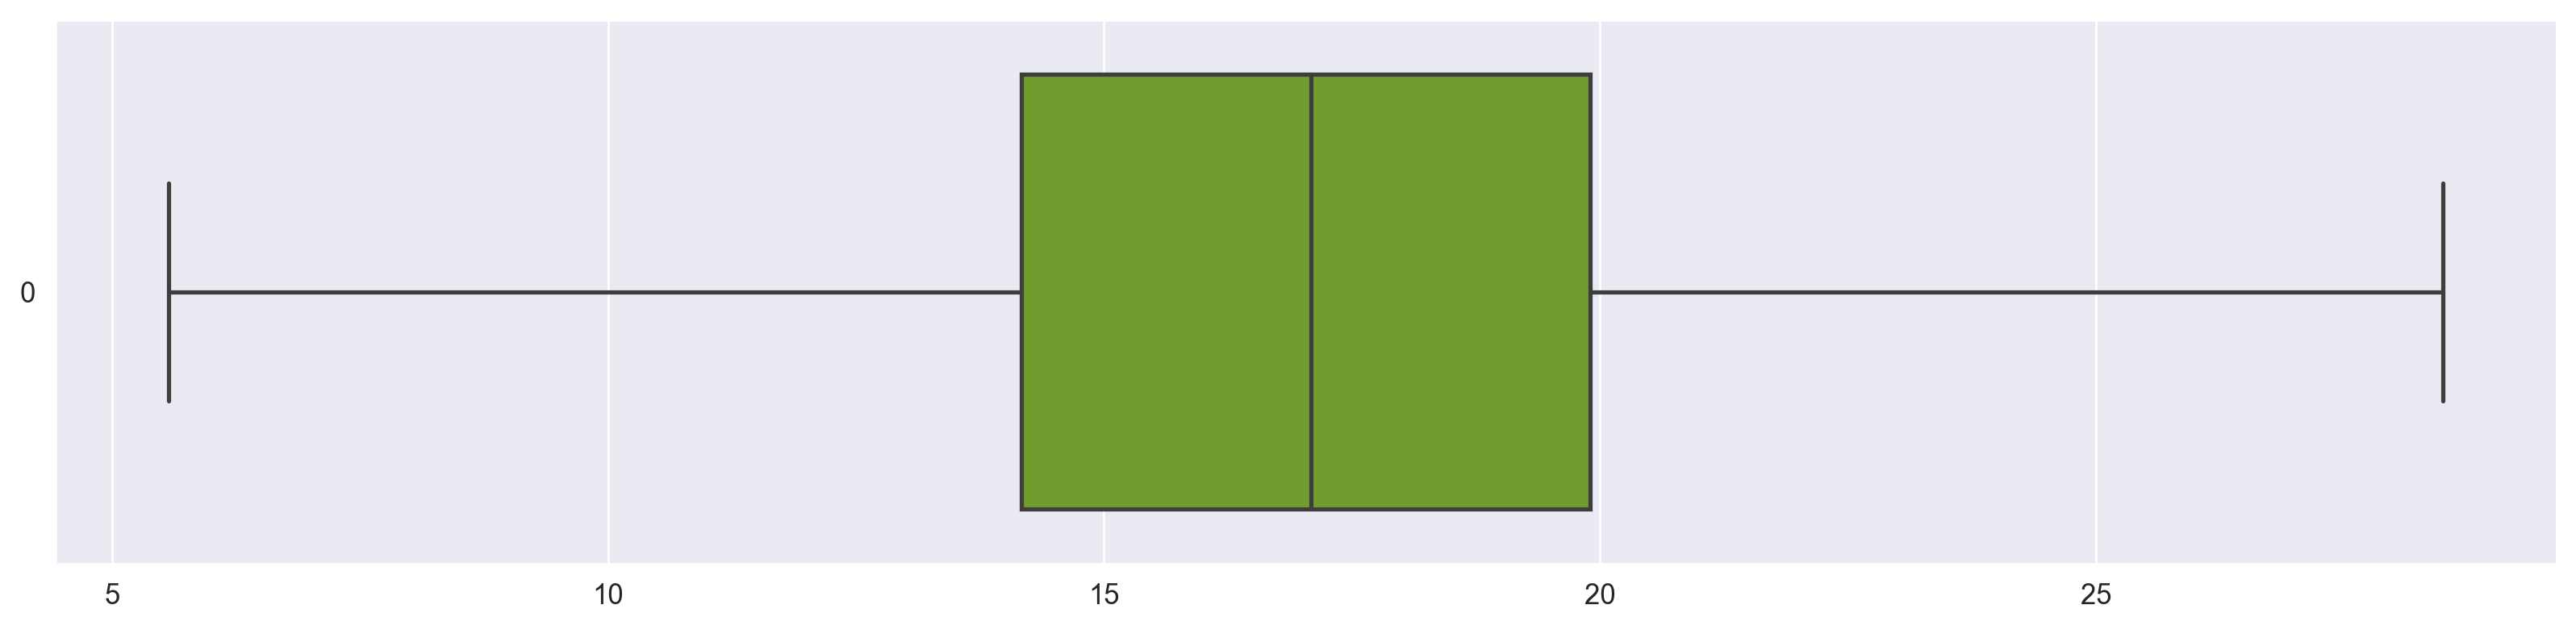

In [809]:
sns.boxplot(train_ot['eve.trainarge'], orient='h', color = '#72b01d')

#### Replacing Outlier In night.mins Column

<AxesSubplot:>

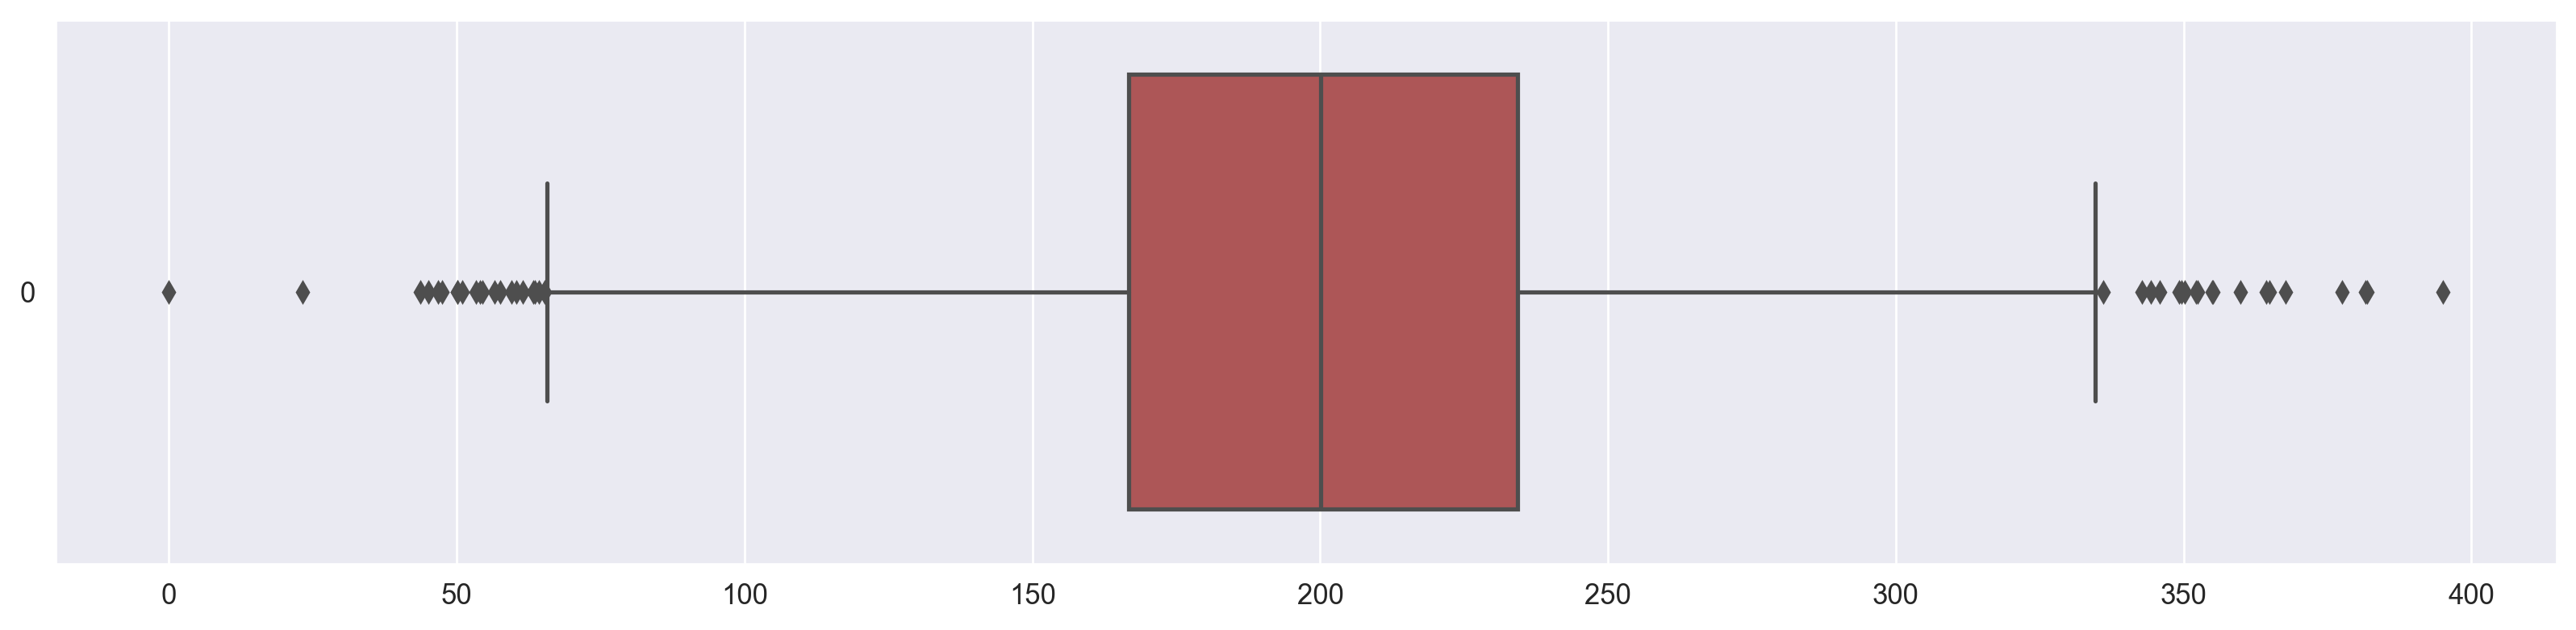

In [810]:
sns.boxplot(train_ot['night.mins'], orient='h', color = '#bc4749')

In [811]:
replace_outlier_extream(train_ot, 'night.mins')

<AxesSubplot:>

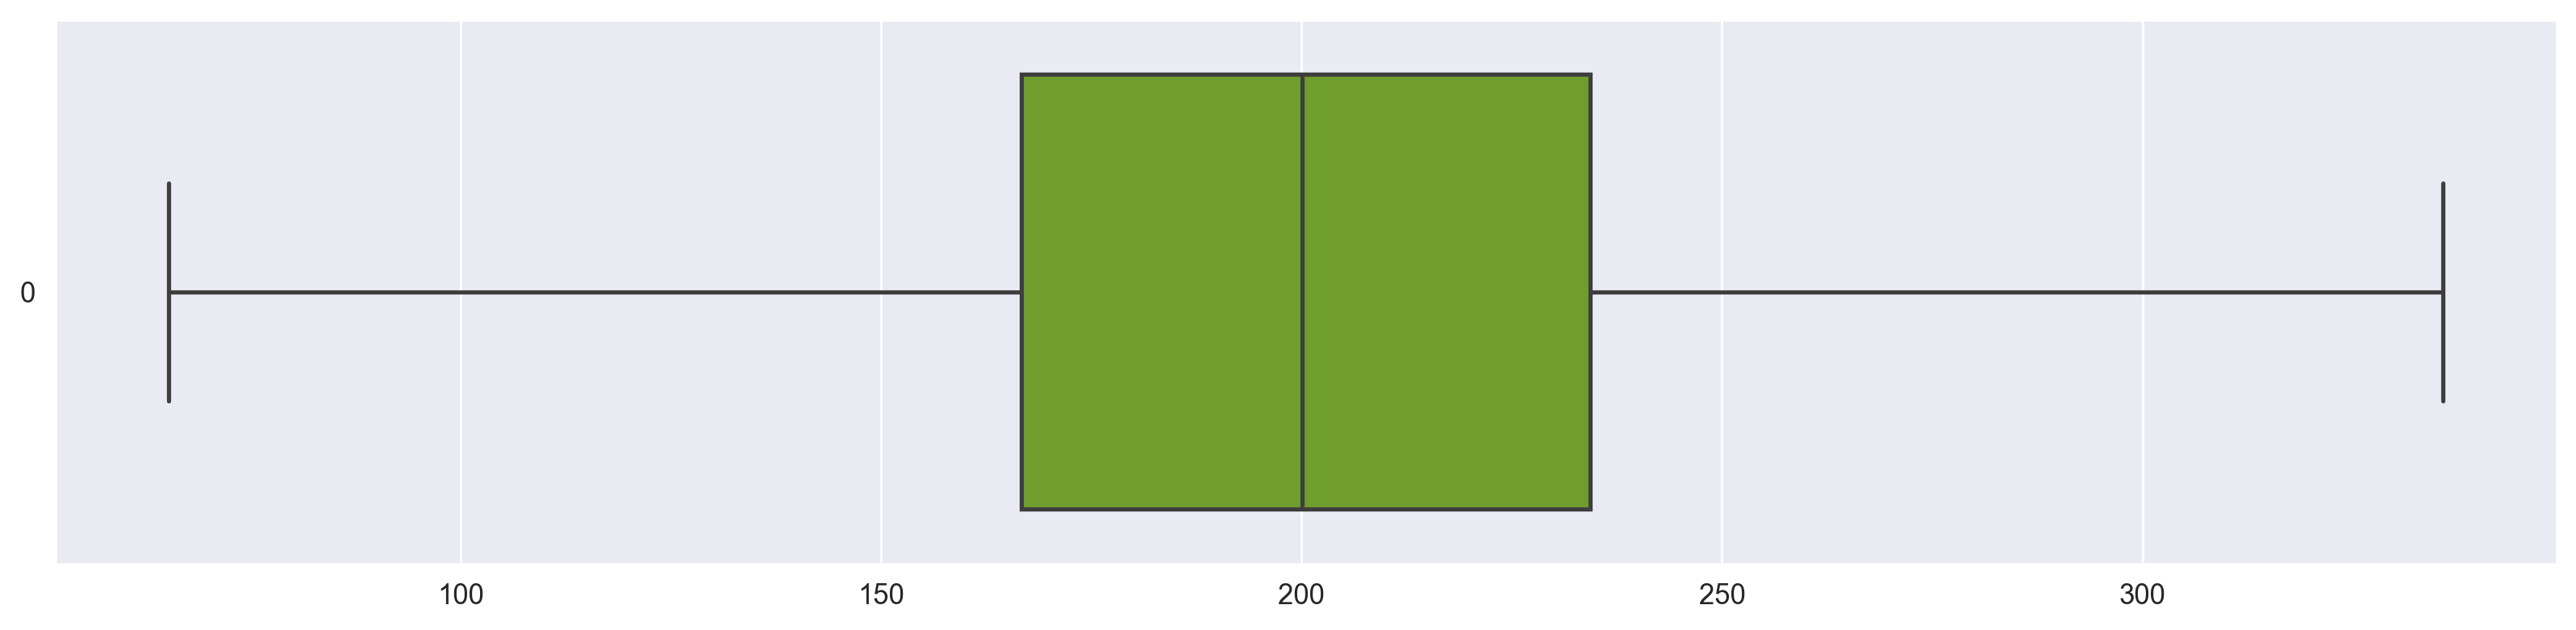

In [812]:
sns.boxplot(train_ot['night.mins'], orient='h', color = '#72b01d')

#### Removing Outlier In night.calls Column

<AxesSubplot:>

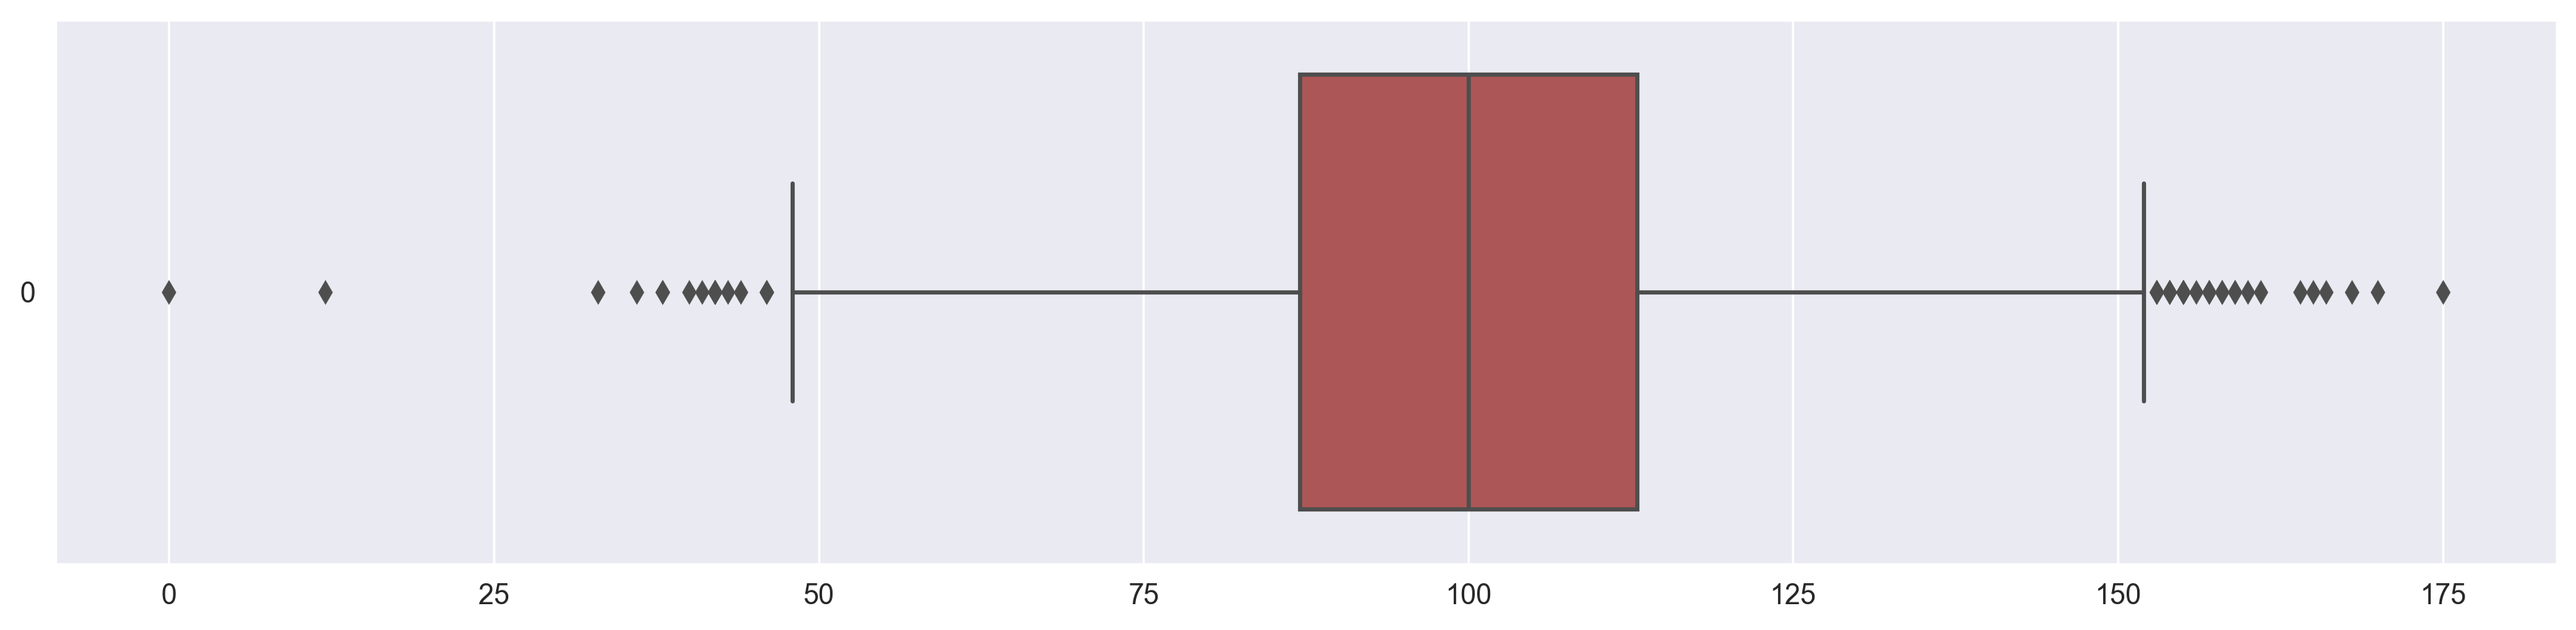

In [813]:
sns.boxplot(train_ot['night.calls'], orient='h', color = '#bc4749')

In [814]:
replace_outlier_extream(train_ot, 'night.calls')

<AxesSubplot:>

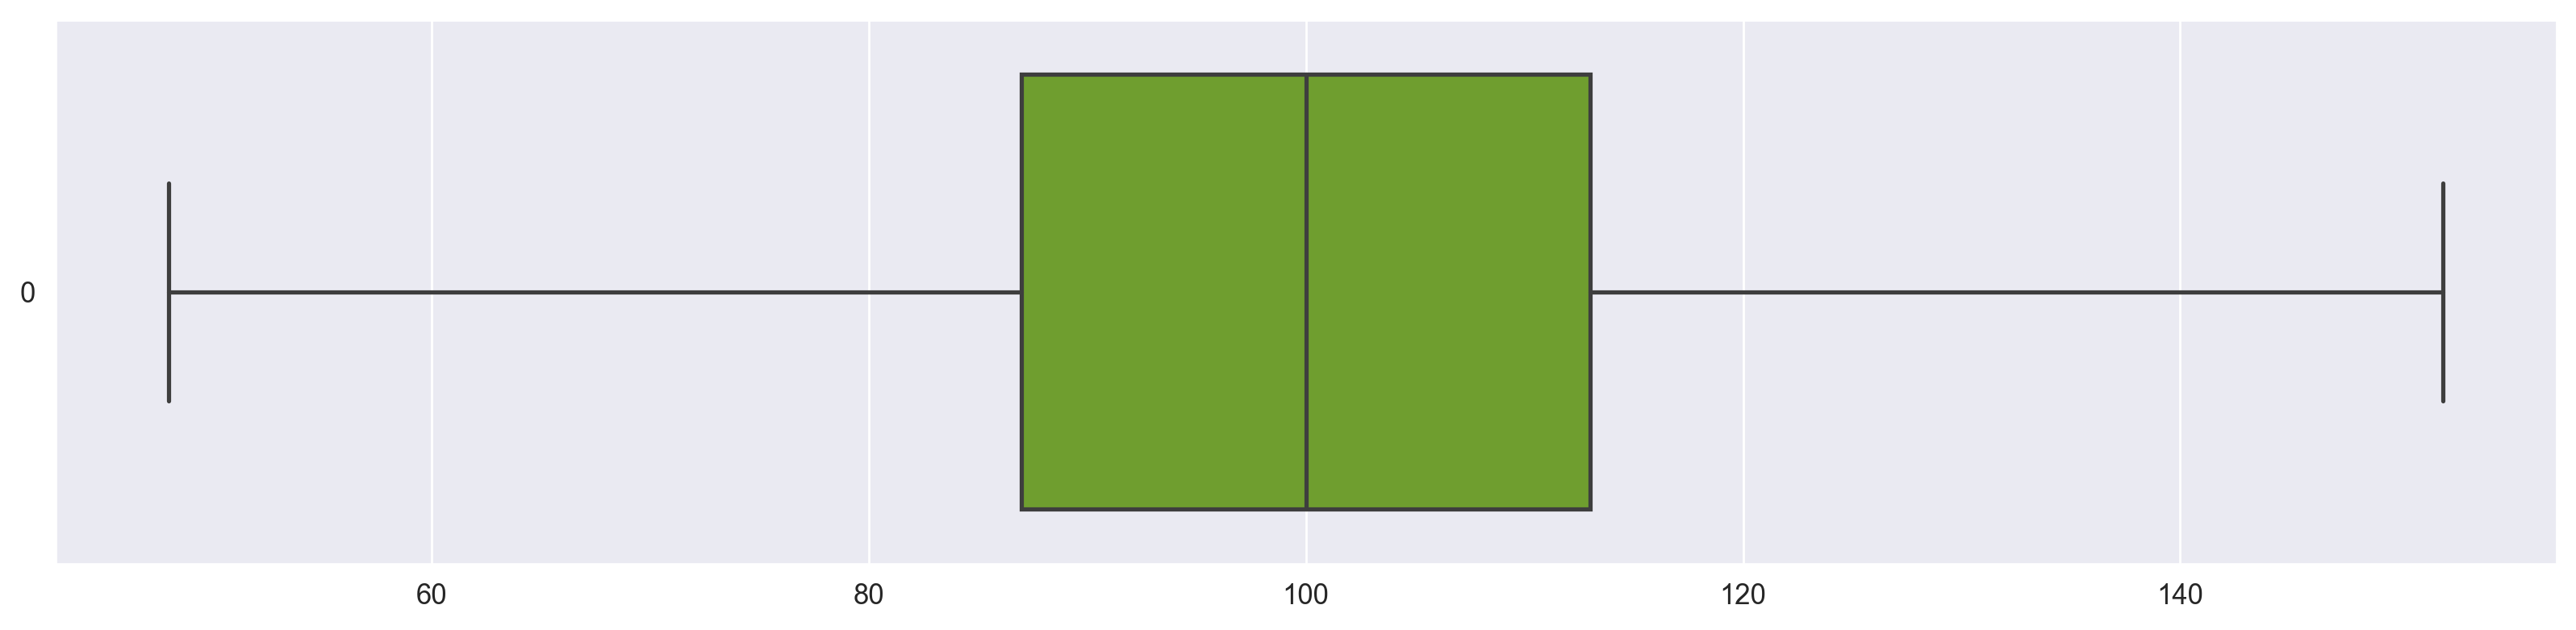

In [815]:
sns.boxplot(train_ot['night.calls'], orient='h', color = '#72b01d')

#### Replacing Outlier In night.trainarge Column

<AxesSubplot:>

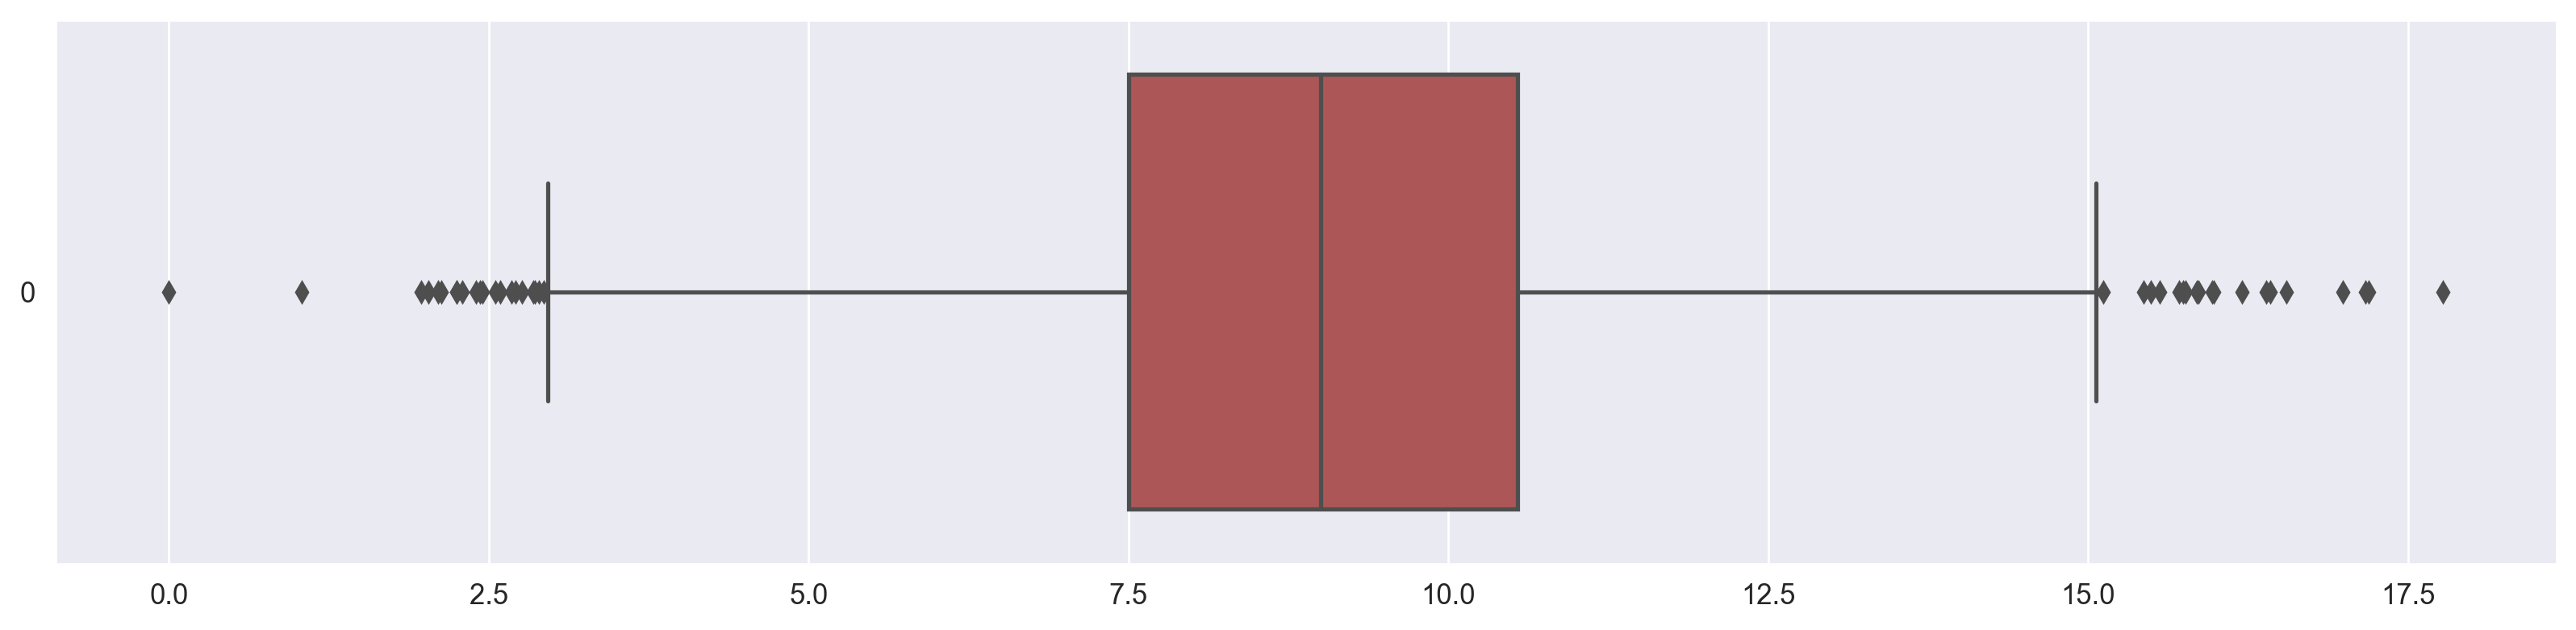

In [816]:
sns.boxplot(train_ot['night.trainarge'], orient='h', color = '#bc4749')

In [817]:
replace_outlier_extream(train_ot, 'night.trainarge')

<AxesSubplot:>

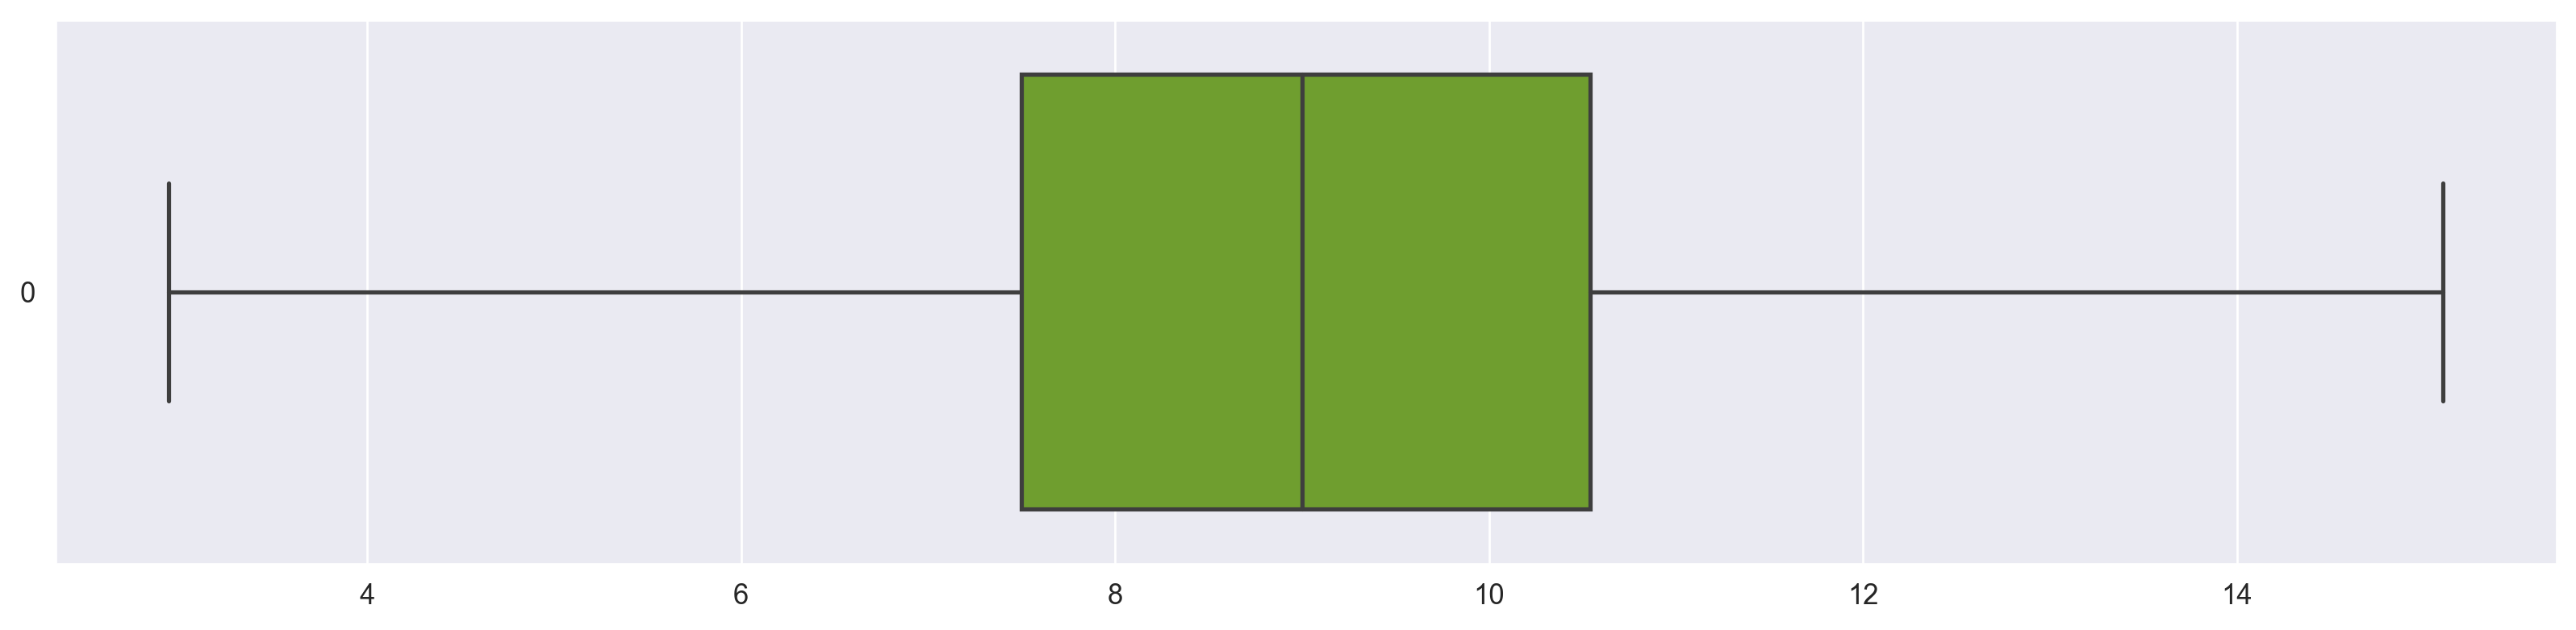

In [818]:
sns.boxplot(train_ot['night.trainarge'], orient='h', color = '#72b01d')

#### Replacing Outlier In Customer.calls Column

<AxesSubplot:>

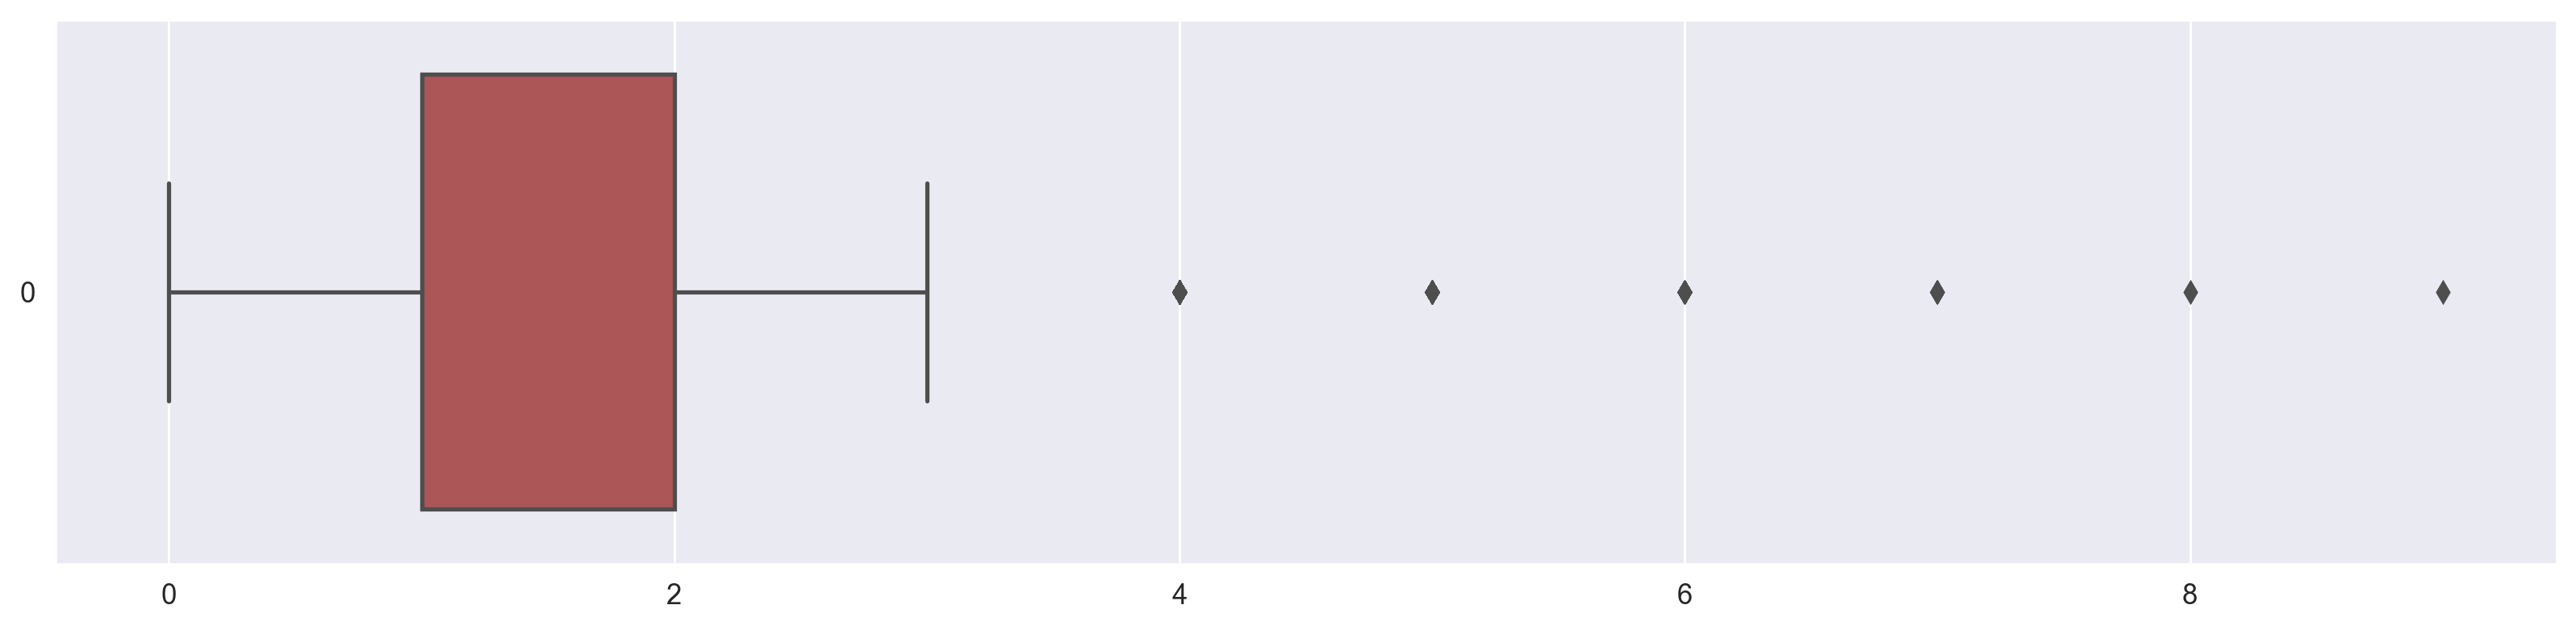

In [819]:
sns.boxplot(train_ot['customer.calls'], orient='h', color = '#bc4749')

In [820]:
replace_outlier_extream(train_ot, 'customer.calls')

<AxesSubplot:>

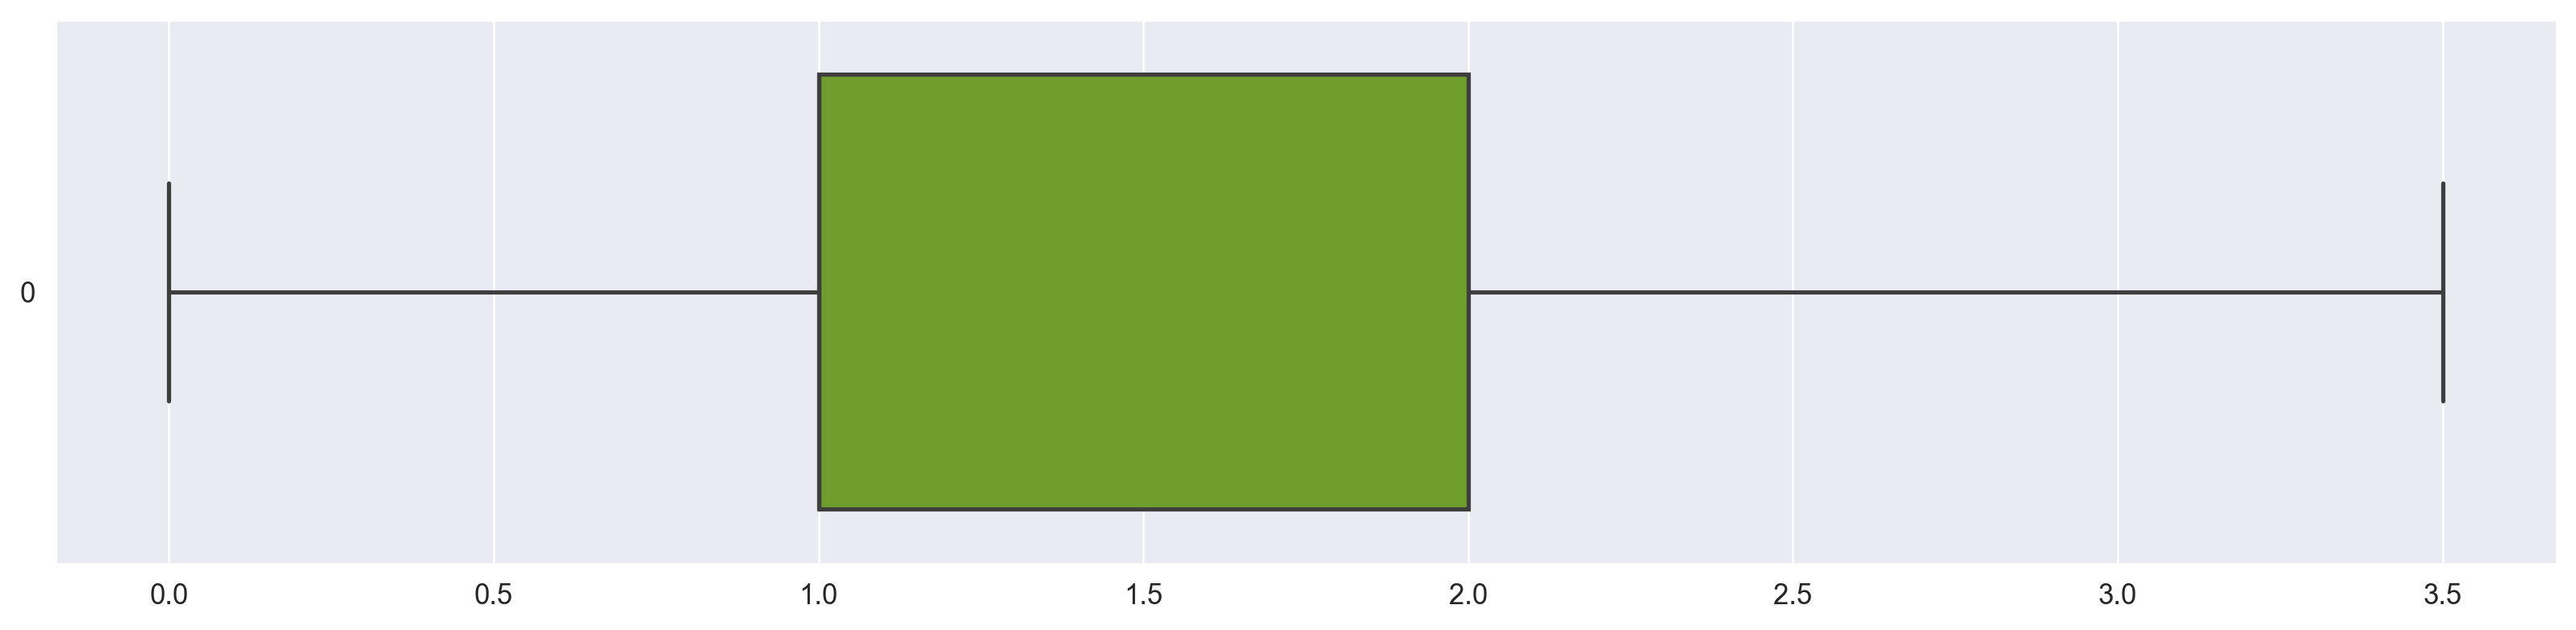

In [821]:
sns.boxplot(train_ot['customer.calls'], orient='h', color = '#72b01d')

#### Outlier Percentage (After)

In [822]:
outlier_percentage(train_ot)

account.length : 0.0 %
voice.messages : 0.0 %
intl.mins : 0.0 %
intl.calls : 0.0 %
intl.charge : 0.0 %
day.mins : 0.0 %
day.calls : 0.0 %
day.charge : 0.0 %
eve.mins : 0.0 %
eve.calls : 0.0 %
eve.charge : 0.0 %
night.mins : 0.0 %
night.calls : 0.0 %
night.charge : 0.0 %
customer.calls : 0.0 %


#### Reseting Index

In [827]:
sel =[]

for i in train_ot.index:
    sel.append(i)

In [841]:
train = train.loc[sel,:]
train.reset_index(inplace=True)
train.drop(columns='index',inplace=True)

train

state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4864    HI  area_code_408              50        yes              40   
4865    WV  area_code_415             152         no               0   
4866    DC  area_code_415              61         no               0   
4867    DC  area_code_510             109         no               0   
4868    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4864        no        9.9           5         2.67     235.7        127   
4865        no       14.7           2         3.97     184.2         90   
4866        no       13.6           4         3.67     140.6         89   
4867        no        8.5           6         2.30     188.8         67   
4868        no        9.3          16         2.51     129.4        102   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4864       40.07     223.0        126       18.96       297.5          116   
4865       31.31     256.8         73       21.83       213.6          113   
4866       23.90     172.8        128       14.69       212.4           97   
4867       32.10     171.7         92       14.59       224.4           89   
4868       22.00     267.1        104       22.70       154.8          100   

      night.charge  customer.calls churn  
0            11.01               1    no  
1            11.45               1    no  
2             7.32               0    no  
3             8.86               2    no  
4             8.41               3    no  
...            ...             ...   ...  
4864         13.39               2    no  
4865          9.61               3   yes  
4866          9.56               1    no  
4867         10.10               0    no  
4868          6.97               0    no  

[4869 rows x 20 columns]

### Converting Categorical Data to Numerical Data

In [842]:
le = LabelEncoder()

#### Converting Target Column

In [844]:
train['trainurn'] = le.fit_transform(train['trainurn'])

train

state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4864    HI  area_code_408              50        yes              40   
4865    WV  area_code_415             152         no               0   
4866    DC  area_code_415              61         no               0   
4867    DC  area_code_510             109         no               0   
4868    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4864        no        9.9           5         2.67     235.7        127   
4865        no       14.7           2         3.97     184.2         90   
4866        no       13.6           4         3.67     140.6         89   
4867        no        8.5           6         2.30     188.8         67   
4868        no        9.3          16         2.51     129.4        102   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4864       40.07     223.0        126       18.96       297.5          116   
4865       31.31     256.8         73       21.83       213.6          113   
4866       23.90     172.8        128       14.69       212.4           97   
4867       32.10     171.7         92       14.59       224.4           89   
4868       22.00     267.1        104       22.70       154.8          100   

      night.charge  customer.calls  churn  
0            11.01               1      0  
1            11.45               1      0  
2             7.32               0      0  
3             8.86               2      0  
4             8.41               3      0  
...            ...             ...    ...  
4864         13.39               2      0  
4865          9.61               3      1  
4866          9.56               1      0  
4867         10.10               0      0  
4868          6.97               0      0  

[4869 rows x 20 columns]

#### Converting Independent Column

##### area.code

In [852]:
code = pd.get_dummies(train['area.code'])
train = pd.concat([train,code],axis=1)
train.drop(columns='area.code', inplace=True)

train

state  account.length voice.plan  voice.messages intl.plan  intl.mins  \
0       KS             128        yes              25        no       10.0   
1       OH             107        yes              26        no       13.7   
2       NJ             137         no               0        no       12.2   
3       OH              84         no               0       yes        6.6   
4       OK              75         no               0       yes       10.1   
...    ...             ...        ...             ...       ...        ...   
4864    HI              50        yes              40        no        9.9   
4865    WV             152         no               0        no       14.7   
4866    DC              61         no               0        no       13.6   
4867    DC             109         no               0        no        8.5   
4868    VT              86        yes              34        no        9.3   

      intl.calls  intl.charge  day.mins  day.calls  ...  eve.calls  \
0              3         2.70     265.1        110  ...         99   
1              3         3.70     161.6        123  ...        103   
2              5         3.29     243.4        114  ...        110   
3              7         1.78     299.4         71  ...         88   
4              3         2.73     166.7        113  ...        122   
...          ...          ...       ...        ...  ...        ...   
4864           5         2.67     235.7        127  ...        126   
4865           2         3.97     184.2         90  ...         73   
4866           4         3.67     140.6         89  ...        128   
4867           6         2.30     188.8         67  ...         92   
4868          16         2.51     129.4        102  ...        104   

      eve.charge  night.mins  night.calls  night.charge  customer.calls  \
0          16.78       244.7           91         11.01               1   
1          16.62       254.4          103         11.45               1   
2          10.30       162.6          104          7.32               0   
3           5.26       196.9           89          8.86               2   
4          12.61       186.9          121          8.41               3   
...          ...         ...          ...           ...             ...   
4864       18.96       297.5          116         13.39               2   
4865       21.83       213.6          113          9.61               3   
4866       14.69       212.4           97          9.56               1   
4867       14.59       224.4           89         10.10               0   
4868       22.70       154.8          100          6.97               0   

      churn  area_code_408  area_code_415  area_code_510  
0         0              0              1              0  
1         0              0              1              0  
2         0              0              1              0  
3         0              1              0              0  
4         0              0              1              0  
...     ...            ...            ...            ...  
4864      0              1              0              0  
4865      1              0              1              0  
4866      0              0              1              0  
4867      0              0              0              1  
4868      0              0              1              0  

[4869 rows x 22 columns]

##### All

In [854]:
train = pd.get_dummies(train)

train

account.length  voice.messages  intl.mins  intl.calls  intl.charge  \
0                128              25       10.0           3         2.70   
1                107              26       13.7           3         3.70   
2                137               0       12.2           5         3.29   
3                 84               0        6.6           7         1.78   
4                 75               0       10.1           3         2.73   
...              ...             ...        ...         ...          ...   
4864              50              40        9.9           5         2.67   
4865             152               0       14.7           2         3.97   
4866              61               0       13.6           4         3.67   
4867             109               0        8.5           6         2.30   
4868              86              34        9.3          16         2.51   

      day.mins  day.calls  day.charge  eve.mins  eve.calls  ...  state_VA  \
0        265.1        110       45.07     197.4         99  ...         0   
1        161.6        123       27.47     195.5        103  ...         0   
2        243.4        114       41.38     121.2        110  ...         0   
3        299.4         71       50.90      61.9         88  ...         0   
4        166.7        113       28.34     148.3        122  ...         0   
...        ...        ...         ...       ...        ...  ...       ...   
4864     235.7        127       40.07     223.0        126  ...         0   
4865     184.2         90       31.31     256.8         73  ...         0   
4866     140.6         89       23.90     172.8        128  ...         0   
4867     188.8         67       32.10     171.7         92  ...         0   
4868     129.4        102       22.00     267.1        104  ...         0   

      state_VT  state_WA  state_WI  state_WV  state_WY  voice.plan_no  \
0            0         0         0         0         0              0   
1            0         0         0         0         0              0   
2            0         0         0         0         0              1   
3            0         0         0         0         0              1   
4            0         0         0         0         0              1   
...        ...       ...       ...       ...       ...            ...   
4864         0         0         0         0         0              0   
4865         0         0         0         1         0              1   
4866         0         0         0         0         0              1   
4867         0         0         0         0         0              1   
4868         1         0         0         0         0              0   

      voice.plan_yes  intl.plan_no  intl.plan_yes  
0                  1             1              0  
1                  1             1              0  
2                  0             1              0  
3                  0             0              1  
4                  0             0              1  
...              ...           ...            ...  
4864               1             1              0  
4865               0             1              0  
4866               0             1              0  
4867               0             1              0  
4868               1             1              0  

[4869 rows x 74 columns]

## Creating DataFrame

In [855]:
#train.to_csv('eda.csv', index=False)